In [887]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
from statsmodels.api import OLS
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


path = "C:/Users/Charl/OneDrive/Desktop/BU/QST/BA222/HousePrices.csv"

data =pd.read_csv(path)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [888]:
selected_columns = data.columns[data.notna().sum() > 1000]
data = data[selected_columns]
if "Id" in data.columns:
    data = data.drop("Id", axis=1)
data.info()
#Checking the non-null value of each column.
#Since it will make our prediction hard if the non-null value of a specific column is too small,
#We exclude some columns if the column has less than 1000 non-null value (out of 1460).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [889]:
#For the column names started with a number, it is hard to put it into a loop.
#In order to aviod future troubles, we change the column names with the "implace" function.
data.rename(columns={'1stFlrSF': 'firstFlrSF'}, inplace=True)
data.rename(columns={'2ndFlrSF': 'secondFlrSF'}, inplace=True)
data.rename(columns={'3SsnPorch': 'threeSsnPorch'}, inplace=True)

In [890]:
#Some of the NAs are showing as value "0", 
#we replace it with the word "MISSING" so that those missing values will not confusing the result of the model.
data = data.replace({'': 'MISSING', pd.NaT: 'MISSING'})

In [891]:
#Here are the datatype and variables of the dataset.
#Variables with datatype of int64/float64 are numerical, variables with datatype of Object are categorical.
#Correct datatype for columns mannually
#Correct datatype for columns mannually
data.drop(data.columns[data.isna().sum() < 1000], axis=1)
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')

In [892]:
#From now we finish all the data-cleanning process, and made all the changes need.
#Now we are going to describe our dataset.
data.shape
# The dataset is 1460 rows and 81 variables.

(1460, 75)

In [893]:
data['SalePrice'].describe()
#Here are the Statistical Summary of the "SalePrice" variable in dataset.
#Range is max-min = 720100
#Since mean>median, it shows the data has positive skewness. We should also look at the histogram for the distribution.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

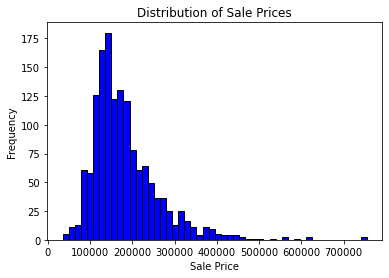

In [894]:
plt.hist(data['SalePrice'], bins=50, color='blue', edgecolor='black')  # Adjust color and edgecolor as needed
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()
#We are using histogram to see the distribution of the SalePrice variable since histogram can reflect the frequency of each intervals.
#The SalePrice variable has a Skew Right distribution.

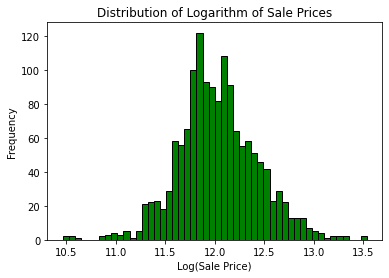

In [895]:
#Since SalePrice is not normal (skew right), we cannot use the "common way" to detect the outliers.(which is setting the higher-bar to be 3*sd+mean and lower-bar to be mean-3*sd)
#For detecting outliers in a skew right sample, we applied natural log function to SalePrice column and normalized the data.
plt.hist(np.log(data['SalePrice']), bins=50, color='green', edgecolor='black')  # Adjust color and edgecolor as needed
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Sale Prices')
plt.show()

In [896]:
#Since we should use different methods in anaylzing numerical variable and categorical variable,
#We seperate all columns into either "numerical_data" or "categorical_data" based on different datatype.
numerical_data = data.select_dtypes(include='number')
numerical_data
#Create a new table that only contains numerical_data
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_data
#Create a new table that only contains categorical_data

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,TotRmsAbvGrd,Functional,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,8,Typ,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,6,Typ,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,6,Typ,Attchd,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,7,Typ,Detchd,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,9,Typ,Attchd,RFn,3,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,7,Typ,Attchd,RFn,2,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,7,Min1,Attchd,Unf,2,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,9,Typ,Attchd,RFn,1,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,5,Typ,Attchd,Unf,1,TA,TA,Y,WD,Normal


In [897]:
#We use rsquare to see how related each variable is with SalePrice.
#We want to demonstrate the relation of some of the most important variables vs. SalePrice in our data description part,
#So we calculate rsquare seperately for numerical data and categorical data.
r2 = list() 
varNames = numerical_data.columns
varNames = varNames.drop(['SalePrice'])

for i in varNames:
    formula = 'SalePrice ~ ' + i
    reg = smf.ols(formula, data=numerical_data).fit()
    r2.append(reg.rsquared)

r2Data = pd.DataFrame(data = {'variable':varNames,'r2':r2})
r2Data['r2'] = r2Data['r2'].round(3)
numerical_data_rsquare=r2Data.sort_values(by = 'r2',ascending = False)
numerical_data_rsquare
#The top 3 variable with highest rsquare are GrLivArea, GarageArea, TotalBsmtSF,
#We will demonstrate their relation with SalePrice by drawing scatter plot.


,variable,r2
12,GrLivArea,0.502
16,GarageArea,0.389
8,TotalBsmtSF,0.376
9,firstFlrSF,0.367
2,YearBuilt,0.273
3,YearRemodAdd,0.257
15,GarageYrBlt,0.237
4,MasVnrArea,0.228
14,Fireplaces,0.218
5,BsmtFinSF1,0.149


In [898]:
#For the numerical variables, we can look on the correlation of each variables vs. the SalePrice.
correlation_with_saleprice = numerical_data.corr()["SalePrice"].sort_values(ascending=False)
correlation_table=pd.DataFrame({'Variable': correlation_with_saleprice.index, 'Correlation': correlation_with_saleprice.values})
correlation_table = correlation_table.drop(correlation_table.index[0])
correlation_table = correlation_table.reset_index(drop=True)
correlation_table.head(10)
#Showing the top 10 for better understanding.

,Variable,Correlation
0,GrLivArea,0.708624
1,GarageArea,0.623431
2,TotalBsmtSF,0.613581
3,firstFlrSF,0.605852
4,YearBuilt,0.522897
5,YearRemodAdd,0.507101
6,GarageYrBlt,0.486362
7,MasVnrArea,0.477493
8,Fireplaces,0.466929
9,BsmtFinSF1,0.386420


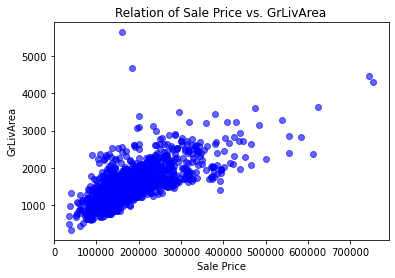

In [899]:
#Then, we plot the 3 numerical variable with highest rsquare and illustrate their relation with SalePrice by scatterplot.
#GrLivArea vs SalePrice
plt.scatter(x='SalePrice', y='GrLivArea', data=data, color='blue', alpha=0.6)
plt.xlabel('Sale Price')
plt.ylabel('GrLivArea')
plt.title('Relation of Sale Price vs. GrLivArea')
plt.show()
#GrLivArea has 0.708624 correlation and a positive strong relation with SalePrice.

In [900]:
smf.ols("SalePrice~GrLivArea", data=data).fit().summary()
#We can see the coefficient of intercept is 18570 and coefficient of GroundLiving Area is 108.1304 
#The average increase of SalePrice by average increase of 1 groundliving area is 108.1304.
#Showing by the model, if there is 0 groundliving area, the SalePrice will be 18570 statistically.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.52e-223
Time:                        21:12:26   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

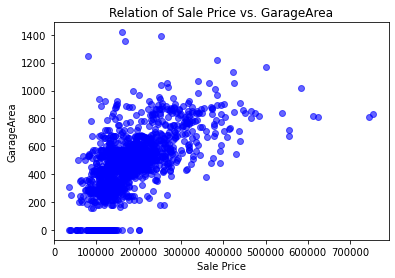

In [901]:
#GarageArea vs SalePrice
plt.scatter(x='SalePrice', y='GarageArea', data=data, color='blue', alpha=0.6)
plt.xlabel('Sale Price')
plt.ylabel('GarageArea')
plt.title('Relation of Sale Price vs. GarageArea')
plt.show()
#GarageArea has 0.623431 correlation and a positive weak relation with SalePrice.
#For the data that has 0 GarageArea indicates the houses with no garageArea.

In [902]:
smf.ols("SalePrice~GarageArea", data=data).fit().summary()
#We can see the coefficient of intercept is 71360 and coefficient of GarageArea is 231.6456
#The average increase of SalePrice by average increase of 1 GarageArea is 231.6456.
#Showing by the model, if there is 0 GarageArea, the SalePrice will be 71360 statistically.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.27e-158
Time:                        21:12:26   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.000    6.36e+04    7.91e+04
GarageArea   231.6456      7.608     30.446      0.000     216.721     246.570
==============================================================================
Omnibus:                      562.790   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5197.079
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

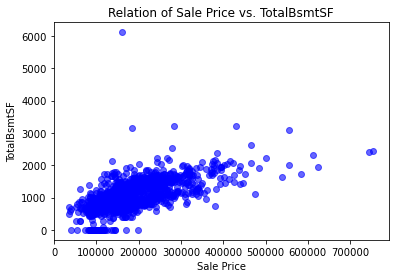

In [903]:
#TotalBsmtSF(Total squarefeet of basement area) vs SalePrice
plt.scatter(x='SalePrice', y='TotalBsmtSF', data=data, color='blue', alpha=0.6)
plt.xlabel('Sale Price')
plt.ylabel('TotalBsmtSF')
plt.title('Relation of Sale Price vs. TotalBsmtSF')
plt.show()
#TotalBsmtSF has 0.613581 correlation and a positive strong relation with SalePrice.
#For the data that has 0 TotalBsmtSF indicates the houses with no basement.

In [904]:
smf.ols("SalePrice~TotalBsmtSF", data=data).fit().summary()
#We can see the coefficient of intercept is 63430 and coefficient of TotalBsmtSF is 111.1096
#The average increase of SalePrice by average increase of 1 TotalBsmtSF is 111.1096.
#Showing by the model, if there is 0 TotalBsmtSF, the SalePrice will be 63430 statistically.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.48e-152
Time:                        21:12:27   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [905]:
#After anaylzing 3 of the important numerical variables, we are going to anaylze 3 important categorical variables.
r2 = list() 
varNames = categorical_data.columns

for i in varNames:
    formula = 'SalePrice ~ ' + i
    reg = smf.ols(formula, data=data).fit()
    r2.append(reg.rsquared)

r2Data = pd.DataFrame(data = {'variable':varNames,'r2':r2})
r2Data['r2'] = r2Data['r2'].round(3)
categorical_data_rsquare=r2Data.sort_values(by = 'r2',ascending = False)
categorical_data_rsquare
# We are going to analyze the relationship of the three variables with higest rsquare to SalePrice using bar chart.
#The three variables are OverallQual,Neighborhood,GarageCars.

,variable,r2
13,OverallQual,0.684
8,Neighborhood,0.546
42,GarageCars,0.491
20,ExterQual,0.477
23,BsmtQual,0.465
37,KitchenQual,0.457
34,FullBath,0.336
41,GarageFinish,0.306
38,TotRmsAbvGrd,0.299
22,Foundation,0.256


In [906]:
data.OverallQual.value_counts(ascending=False)
#We generally consider data category with sample less than 30 to be "unreliable".
#For OverallQual, 1,2,3,10 have samples lower than 30, 
#it is reasonable since most of the house have a "average quality" that mainly located on 4-8, 
#and there are less quantity of houses have extremely poor quality or extremely high quality.
#We are not excluded the categories less than 30 sample, 
#however, we need to mention that this specific category sample might not fully represent the overall population.

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

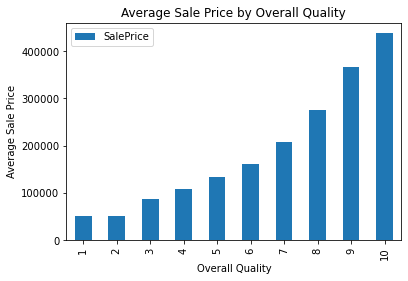

In [907]:
#Analyzing relation of OverallQual vs SalePrice.
varNames=['SalePrice','OverallQual']
data[varNames].groupby('OverallQual').mean().plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Overall Quality')
plt.show()
# We sort categories which have more than 30 units under "OverQual" variable to make result more accurate,
# This trend indicate that for each additional 1 unit of quality rate, the average SalePrice has increase significantly.

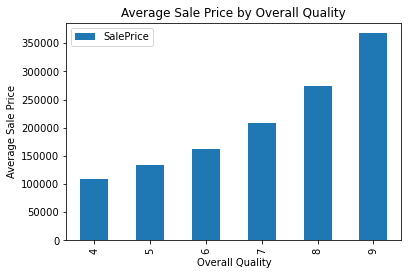

In [908]:
data.OverallQual.value_counts(ascending=False)
varNames=['SalePrice','OverallQual']
data[varNames][(data.OverallQual <10) & (data.OverallQual >3)].groupby('OverallQual').mean().plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Overall Quality')
plt.show()
#We also create a graph excluding the categories less than 30 samples,
#the trend is more obvious on this graph.

In [909]:
smf.ols("SalePrice~OverallQual", data=data).fit().summary()
#We can see the relationship of the Saleprice & OverallQuality.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:27   Log-Likelihood:                -17703.
No. Observations:                1460   AIC:                         3.543e+04
Df Residuals:                    1450   BIC:                         3.548e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.015e+04   3.17e+04      1.584      0.113    -1.2e+04    1.12e+05
OverallQual[T.2]   1620.3333   4.09e+04      0.040      0.968   -7.86e+04    8.18e+04
OverallQual[T.3]   3.732e+04   3.32e+04      1.124      0.261   -2.78e+04    1.02e+05
OverallQual[T.4]   5.827e+04   3.19e+04      1.824      0.068   -4379.660    1.21e+05
OverallQual[T.5]   8.337e+04   3.17e+04      2.626      0.009    2.11e+04    1.46e+05
OverallQual[T.6]   1.115e+05   3.18e+04      3.510      0.000    4.92e+04    1.74e+05
OverallQual[T.7]   1.576e+05   3.18e+04      4.960      0.000    9.53e+04     2.2e+05
OverallQual[T.8]   2.246e+05   3.19e+04      7.050      0.000    1.62e+05    2.87e+05
OverallQual[T.9]   3.174e+05   3.24e+04      9.797      0.000    2.54e+05    3.81e+05
OverallQual[T.10]  3.884e+05   3.34e+04     11.637      0.000    3.23e+05    4.54e+05
==============================================================================
Omnibus:                      377.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3528.673
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                         94.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [910]:
data.Neighborhood.value_counts(ascending=False)
#We generally consider data category with sample less than 30 to be "unreliable".
#There are several groups of the Neighborhood contain less than 30 samples.
#We have to mention that the predicted outcome of the categories less than 30 samples might come with larger resid.

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

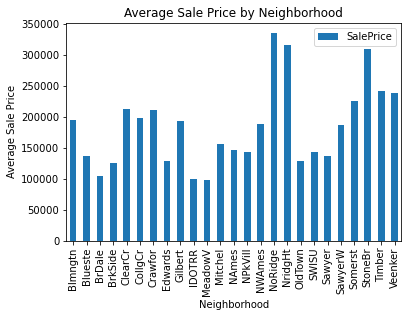

In [911]:
#This is the bar char we made with no exclusion.
#It shows that the different Neighborhood might have difference on SalePrice, 
#But the different is not significant since there are some neighborhood having similar SalePrice.
varNames=['SalePrice','Neighborhood']
data[varNames].groupby('Neighborhood').mean().plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.show()

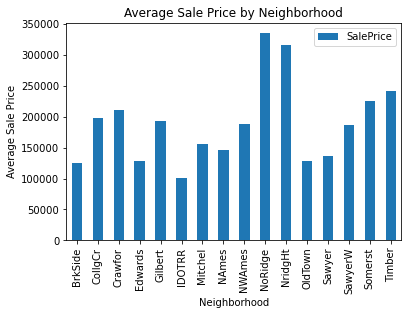

In [912]:
#Analyzing relation of Neighborhood vs SalePrice.
neighborhoods = [
    'NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 
    'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 
    'Mitchel', 'NoRidge', 'Timber', 'IDOTRR'
]
# this step is to sort categories which have more than 30 units under "neighborhood" variable to 
# make result more reliable
filtered_data = data[data['Neighborhood'].isin(neighborhoods)]
varNames=['SalePrice','Neighborhood']
saleprice = filtered_data[varNames].groupby('Neighborhood').mean()
saleprice.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.show()
# It is hard to describe the relation between SalePrice and Neiborhood, 
# but it is significant that "NoRidge" and "NridgHt" has higer SalePrice than all other neighborhoods.
# This graph indicate that different Neighborhood's SalePrice could varies, but the difference might not be significant except for "NoRidge" and "NridgHt".

In [913]:
smf.ols("SalePrice~Neighborhood", data=data).fit().summary()
#We can see the relationship of the Saleprice & Neighborhood.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.56e-225
Time:                        21:12:28   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.949e+05   1.31e+04     14.879      0.000    1.69e+05    2.21e+05
Neighborhood[T.Blueste] -5.737e+04   4.04e+04     -1.421      0.155   -1.37e+05    2.18e+04
Neighborhood[T.BrDale]  -9.038e+04   1.88e+04     -4.805      0.000   -1.27e+05   -5.35e+04
Neighborhood[T.BrkSide] -7.004e+04   1.49e+04     -4.703      0.000   -9.93e+04   -4.08e+04
Neighborhood[T.ClearCr]  1.769e+04   1.66e+04      1.066      0.287   -1.49e+04    5.03e+04
Neighborhood[T.CollgCr]  3094.8910   1.38e+04      0.224      0.823    -2.4e+04    3.02e+04
Neighborhood[T.Crawfor]  1.575e+04   1.51e+04      1.042      0.298   -1.39e+04    4.54e+04
Neighborhood[T.Edwards] -6.665e+04   1.42e+04     -4.705      0.000   -9.44e+04   -3.89e+04
Neighborhood[T.Gilbert] -2016.3760   1.44e+04     -0.140      0.889   -3.03e+04    2.63e+04
Neighborhood[T.IDOTRR]  -9.475e+04   1.58e+04     -5.988      0.000   -1.26e+05   -6.37e+04
Neighborhood[T.MeadowV] -9.629e+04   1.85e+04     -5.199      0.000   -1.33e+05      -6e+04
Neighborhood[T.Mitchel]  -3.86e+04   1.52e+04     -2.540      0.011   -6.84e+04   -8784.735
Neighborhood[T.NAmes]   -4.902e+04   1.36e+04     -3.609      0.000   -7.57e+04   -2.24e+04
Neighborhood[T.NPkVill] -5.218e+04   2.23e+04     -2.344      0.019   -9.58e+04   -8510.657
Neighborhood[T.NWAmes]  -5820.8139   1.45e+04     -0.400      0.689   -3.43e+04    2.27e+04
Neighborhood[T.NoRidge]  1.404e+05   1.56e+04      9.015      0.000     1.1e+05    1.71e+05
Neighborhood[T.NridgHt]  1.214e+05   1.45e+04      8.390      0.000     9.3e+04     1.5e+05
Neighborhood[T.OldTown] -6.665e+04    1.4e+04     -4.744      0.000   -9.42e+04   -3.91e+04
Neighborhood[T.SWISU]   -5.228e+04    1.7e+04     -3.080      0.002   -8.56e+04    -1.9e+04
Neighborhood[T.Sawyer]  -5.808e+04   1.45e+04     -3.999      0.000   -8.66e+04   -2.96e+04
Neighborhood[T.SawyerW] -8315.0857   1.49e+04     -0.559      0.576   -3.75e+04    2.08e+04
Neighborhood[T.Somerst]  3.051e+04   1.43e+04      2.129      0.033    2393.494    5.86e+04
Neighborhood[T.StoneBr]  1.156e+05    1.7e+04      6.812      0.000    8.23e+04    1.49e+05
Neighborhood[T.Timber]   4.738e+04   1.58e+04      3.007      0.003    1.65e+04    7.83e+04
Neighborhood[T.Veenker]   4.39e+04   2.09e+04      2.101      0.036    2913.679    8.49e+04
==============================================================================
Omnibus:                      618.883   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.438
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                      11.875   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assum

In [914]:
data['GarageCars'].value_counts(ascending=False)
#The GarageCars 4 has only 5 samples, 
#this is reasonable since it is very uncommon to see garage with large capacity in the real life.
#However, it will be hard for us to make the prediction since the sample of category garageCars=4 cannot fully represent the population under this category.

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

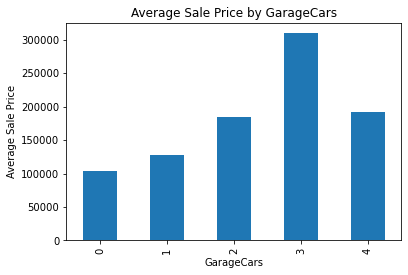

In [915]:
#Analyze the relation of GarageCars(the capacity of cars that can place in the garage) vs SalePrice
saleprice = data.groupby('GarageCars')['SalePrice'].mean().plot(kind='bar')

plt.xlabel('GarageCars')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by GarageCars')
plt.show()
# The trend indicates that before GarageCars=3, each additional capacity of car in the garage could caused significant increase in the SalePrice,
# However when capacity of cars reach 4, the average SalePrice has decrease significantly.
#This might implies that there are other factors causing this significant change on trend, 
#but the most possible reason is that the sample size is too small causing the bias on the mean.

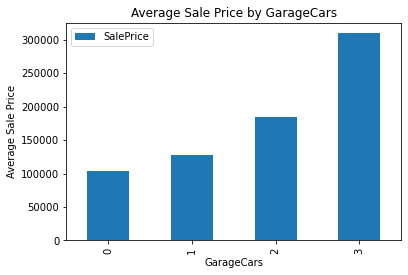

In [916]:
data.GarageCars.value_counts(ascending=False)
varNames=['SalePrice','GarageCars']
data[varNames][(data.GarageCars <4)].groupby('GarageCars').mean().plot(kind='bar')

plt.xlabel('GarageCars')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by GarageCars')
plt.show()
# from capacity 0-3, each additional capacity of car in the garage could caused significant increase in the SalePrice
# This indicate that the real trend of garagecars vs SalePrice might actually reflected by the garagecar 0-3 from the sample.

In [917]:
smf.ols("SalePrice~GarageCars", data=data).fit().summary()
#We can see the relationship of the Saleprice & GarageCars.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     351.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.12e-211
Time:                        21:12:28   Log-Likelihood:                -18051.
No. Observations:                1460   AIC:                         3.611e+04
Df Residuals:                    1455   BIC:                         3.614e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.033e+05   6304.751     16.387      0.000    9.09e+04    1.16e+05
GarageCars[T.1]   2.48e+04   6962.433      3.562      0.000    1.11e+04    3.85e+04
GarageCars[T.2]  8.053e+04   6607.370     12.189      0.000    6.76e+04    9.35e+04
GarageCars[T.3]  2.063e+05   7585.414     27.199      0.000    1.91e+05    2.21e+05
GarageCars[T.4]  8.934e+04   2.61e+04      3.417      0.001     3.8e+04    1.41e+05
==============================================================================
Omnibus:                      483.474   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4180.501
Skew:                           1.291   Prob(JB):                         0.00
Kurtosis:                      10.877   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [918]:
data.BedroomAbvGr.value_counts(ascending=False)
#The number of Bedroom 5,6,8 and 0 has less than 30 samples.
#This is reasonable since it is unusual for a house to contain no bedroom, or contain 5 or more bedroom.
#So, we need to consider the unfully represented of population by these categories in our sample data.

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

<AxesSubplot:xlabel='BedroomAbvGr'>

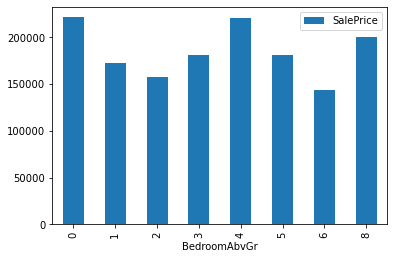

In [919]:
varNames=['SalePrice','BedroomAbvGr']
data[varNames].groupby('BedroomAbvGr').mean().plot(kind='bar')
#This is the bar chart not excluding any categories.
#It is hard to tell any trend by analyzing the bar chart.

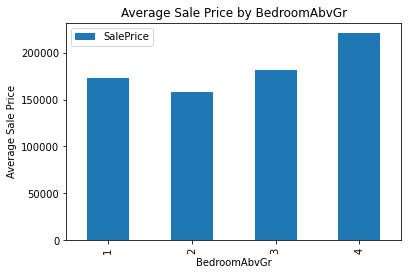

In [920]:
#We are also going to see the relation of Bedroom vs SalePrice.
varNames=['SalePrice','BedroomAbvGr']
data[varNames][(data.BedroomAbvGr < 5) & (data.BedroomAbvGr >0)].groupby('BedroomAbvGr').mean().plot(kind='bar')
plt.xlabel('BedroomAbvGr')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by BedroomAbvGr')
plt.show()
#From the Bar chart, it is hard to tell if there is a trend or not.

In [921]:
# For better doing causual analyse in next part, we are going to identitfy the confounding factors 
#(The variables that are both related to SalePrice and Bedroom would be identify as confounding factors)
#We are going to identify the confounding factors seperately for numerical variables and categorical variables.
#We Start the regression and check if the numerical variables are related to SalePrice(P<0.05)
#Make Regression of all variable to SalePrice, see what variables are significantly related to saleprice(P<0.05).
r2 = list()
varNames = numerical_data.columns
varNames = varNames.drop(["SalePrice"])

for i in varNames:
    formula =  "SalePrice~"+i
    reg = smf.ols(formula, data=numerical_data).fit()
    r2.append(reg.pvalues[i])

pval_Saleprice = pd.DataFrame(data = {'variable':varNames,'pval':r2})
numerical_related_SalePrice= pval_Saleprice[pval_Saleprice['pval'] < 0.05]
numerical_related_SalePrice
#As shown in the table, there are 22 variables related to SalePrice.

,variable,pval
0,LotFrontage,2.602442e-36
1,LotArea,1.123139e-24
2,YearBuilt,2.990229e-103
3,YearRemodAdd,3.164948e-96
4,MasVnrArea,1.458509e-83
5,BsmtFinSF1,3.394110e-53
7,BsmtUnfSF,1.182976e-16
8,TotalBsmtSF,9.484229e-152
9,firstFlrSF,5.394711e-147
10,secondFlrSF,5.764335e-36


In [922]:
#Make Regression of all variable to Bedroom, see what variables are significantly related to Bedroom(P<0.05).
r3 = list()
varNames = numerical_data.columns
varNames = varNames.drop(["BedroomAbvGr"])

for i in varNames:
    formula =  "BedroomAbvGr~"+i
    reg = smf.ols(formula, data=numerical_data).fit()
    r3.append(reg.pvalues[i])

pval_Bed = pd.DataFrame(data = {'variable':varNames,'pval':r3})
numerical_related_Bedroom = pval_Bed[pval_Bed['pval'] < 0.05]
numerical_related_Bedroom
#As shown in the table, there are 25 variables related to Bedroom.

,variable,pval
0,LotFrontage,1.780460e-20
1,LotArea,4.519871e-06
2,YearBuilt,6.920573e-03
4,MasVnrArea,8.671365e-05
5,BsmtFinSF1,3.949968e-05
7,BsmtUnfSF,1.485801e-10
9,firstFlrSF,1.041034e-06
10,secondFlrSF,2.027234e-94
11,LowQualFinSF,5.275462e-05
12,GrLivArea,1.647499e-102


In [923]:
#We use the pd.merge function to put two tables together based on the same variable name.
#If the variable appears on both table, it would appear in the table numerical_confounding.
numerical_confounding = pd.merge(numerical_related_SalePrice[['variable']], numerical_related_Bedroom[['variable']], on='variable')
numerical_confounding
#As shown in the table, we have 13 numerical confounding variables.

,variable
0,LotFrontage
1,LotArea
2,YearBuilt
3,MasVnrArea
4,BsmtFinSF1
5,BsmtUnfSF
6,firstFlrSF
7,secondFlrSF
8,GrLivArea
9,Fireplaces


In [924]:
#For categorical variables, we check if all the category has significantly related to Bedroom.
#If any of the category coefficient(except intercept) has significantly related(pval<0.05), it would be showed as "TRUE" in our function.
r4 = list()
varNames = categorical_data.columns

for i in varNames:
    formula = "BedroomAbvGr~"+i
    reg = smf.ols(formula, data=data).fit()
    all_pvalues = reg.pvalues.drop('Intercept')
# Check if any p-values are smaller than 0.05
    all_pvalues_below_threshold = any(all_pvalues < 0.05)
    r4.append(all_pvalues_below_threshold)

pval_Bed_categorical = pd.DataFrame(data = {'variable':varNames,'significant_bed':r4})
pval_Bed_categorical

,variable,significant_bed
0,MSSubClass,True
1,MSZoning,True
2,Street,False
3,LotShape,False
4,LandContour,True
5,Utilities,False
6,LotConfig,True
7,LandSlope,True
8,Neighborhood,True
9,Condition1,True


In [925]:
#For categorical variables, we check if all the category has significantly related to SalePrice.
#If any the category has significantly related(pval<0.05), it would be showed as "TRUE" in our function.
r5 = list()
varNames = categorical_data.columns

for i in varNames:
    formula = "SalePrice~"+i
    reg = smf.ols(formula, data=data).fit()
    all_pvalues = reg.pvalues
# Check if any p-values are smaller than 0.05
    all_pvalues_below_threshold = any(all_pvalues < 0.05)
    r5.append(all_pvalues_below_threshold)

pval_SalePrice_categorical = pd.DataFrame(data = {'variable':varNames,'significant_sale':r5})
pval_SalePrice_categorical

,variable,significant_sale
0,MSSubClass,True
1,MSZoning,True
2,Street,True
3,LotShape,True
4,LandContour,True
5,Utilities,True
6,LotConfig,True
7,LandSlope,True
8,Neighborhood,True
9,Condition1,True


In [926]:
#We join the two dataset, and see if there are categorical confounding factors.
#If a variable has p-value less than 0.05 for both regression, it is a confounding variable.
categorical_confounding = pd.merge(pval_SalePrice_categorical, pval_Bed_categorical, on='variable')
categorical_confounding = categorical_confounding[(categorical_confounding['significant_sale'] == True) & (categorical_confounding['significant_bed'] == True)]
categorical_confounding=categorical_confounding.reset_index(drop=True)
categorical_confounding

,variable,significant_sale,significant_bed
0,MSSubClass,True,True
1,MSZoning,True,True
2,LandContour,True,True
3,LotConfig,True,True
4,LandSlope,True,True
5,Neighborhood,True,True
6,Condition1,True,True
7,BldgType,True,True
8,HouseStyle,True,True
9,OverallQual,True,True


In [927]:
#We add all confounding variable into a list.
variable_list = numerical_confounding['variable'].tolist()
variable_list=variable_list+categorical_confounding['variable'].tolist()
variable_list

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'firstFlrSF',
 'secondFlrSF',
 'GrLivArea',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'OpenPorchSF',
 'PoolArea',
 'MSSubClass',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageType',
 'GarageCars',
 'SaleType',
 'SaleCondition']

In [928]:
#In the list, there are several variables that are related to both by commonsense,
#for example, the GrLivArea: As bedroom number increase, the ground living area is likely the increase,
#As a result, we are going to exclude them from the variable list.
check = ['GrLivArea', 'firstFlrSF', 'TotRmsAbvGrd', 'MasVnrArea', 'secondFlrSF']
variable_list = [item for item in variable_list if item not in check]
variable_list

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'OpenPorchSF',
 'PoolArea',
 'MSSubClass',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'GarageType',
 'GarageCars',
 'SaleType',
 'SaleCondition']

In [929]:
#At this point, we have finished identifying all confounding factors.
#Now we are going to do causual analysis.
variable_list_all = '+'.join(variable_list)
#We are going to make a regression model with controlling all the factors and controlling no factors.
#For doing future work easiler, we put the string together with "+"

In [930]:
#Controlling All Factors
variables = variable_list
reg = smf.ols('SalePrice ~BedroomAbvGr+'+ variable_list_all, data = data).fit()
reg.summary()
#The model has extremely high rsquare, however this was likely caused by overfitting.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     52.46
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:30   Log-Likelihood:                -13156.
No. Observations:                1127   AIC:                         2.660e+04
Df Residuals:                     984   BIC:                         2.732e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.124e+04   1.63e+05     -0.500      0.617      -4e+05    2.38e+05
MSSubClass[T.30]         -1.306e+04   7036.898     -1.855      0.064   -2.69e+04     752.267
MSSubClass[T.40]         -1.462e+04   1.85e+04     -0.792      0.428   -5.09e+04    2.16e+04
MSSubClass[T.45]          6983.7248   3.56e+04      0.196      0.844   -6.28e+04    7.68e+04
MSSubClass[T.50]         -9828.0949   1.28e+04     -0.765      0.444    -3.5e+04    1.54e+04
MSSubClass[T.60]         -1.519e+04   1.12e+04     -1.351      0.177   -3.73e+04    6871.152
MSSubClass[T.70]         -1.344e+04   1.19e+04     -1.134      0.257   -3.67e+04    9817.960
MSSubClass[T.75]         -7698.9626    2.1e+04     -0.366      0.714   -4.89e+04    3.35e+04
MSSubClass[T.80]         -1.611e+04    1.8e+04     -0.896      0.370   -5.14e+04    1.92e+04
MSSubClass[T.85]         -2.458e+04   1.75e+04     -1.405      0.160   -5.89e+04    9752.831
MSSubClass[T.90]         -8272.8905   4212.452     -1.964      0.050   -1.65e+04      -6.468
MSSubClass[T.120]        -3643.1050   6835.060     -0.533      0.594   -1.71e+04    9769.865
MSSubClass[T.160]        -2.134e+04   1.01e+04     -2.112      0.035   -4.12e+04   -1509.969
MSSubClass[T.180]        -1.758e+04   1.59e+04     -1.104      0.270   -4.88e+04    1.37e+04
MSSubClass[T.190]        -1.936e+04   3.43e+04     -0.565      0.572   -8.66e+04    4.79e+04
MSZoning[T.FV]            4.365e+04   1.76e+04      2.485      0.013    9175.812    7.81e+04
MSZoning[T.RH]            4.323e+04   1.87e+04      2.309      0.021    6491.414       8e+04
MSZoning[T.RL]            4.028e+04   1.54e+04      2.619      0.009    1.01e+04    7.05e+04
MSZoning[T.RM]            4.003e+04   1.45e+04      2.767      0.006    1.16e+04    6.84e+04
LandContour[T.HLS]        1.753e+04   7602.413      2.305      0.021    2607.412    3.24e+04
LandContour[T.Low]        8962.1864   1.11e+04      0.807      0.420   -1.28e+04    3.08e+04
LandContour[T.Lvl]        2.395e+04   5587.029      4.287      0.000     1.3e+04    3.49e+04
LotConfig[T.CulDSac]      1.388e+04   5934.812      2.338      0.020    2230.386    2.55e+04
LotConfig[T.FR2]         -1.578e+04   6542.348     -2.411      0.016   -2.86e+04   -2938.054
LotConfig[T.FR3]         -2.503e+04   1.67e+04     -1.503      0.133   -5.77e+04    7645.246
LotConfig[T.Inside]      -1718.5571   2741.448     -0.627      0.531   -7098.313    3661.199
LandSlope[T.Mod]          1.197e+04   6147.756      1.946      0.052     -99.115     2.4e+04
LandSlope[T.Sev]          5609.0889   1.91e+04      0.293      0.769   -3.19e+04    4.31e+04
Neighborhood[T.Blueste]  -8747.0607   2.61e+04     -0.335      0.738      -6e+04    4.25e+04
Neighborhood[T.BrDale]   -1332.6428   1.62e+04     -0.082      0.935   -3.32e+04    3.05e+04
Neighborhood[T

In [931]:
#Controlling No Factors
variables = variable_list
reg=smf.ols("SalePrice ~BedroomAbvGr", data = data).fit()
reg.summary()
#The rsquare is significantly low, indicating bedroom might have a weak relation with SalePrice.
#Since there are many confounding factors influencing bedroom's prediction power, 
#we are going to use bias correction methods to include new confounding factors and increase the model accuracy.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     42.46
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.93e-11
Time:                        21:12:30   Log-Likelihood:                -18523.
No. Observations:                1460   AIC:                         3.705e+04
Df Residuals:                    1458   BIC:                         3.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.34e+05   7492.255     17.881      0.000    1.19e+05    1.49e+05
BedroomAbvGr  1.638e+04   2514.023      6.516      0.000    1.14e+04    2.13e+04
==============================================================================
Omnibus:                      618.934   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3444.842
Skew:                           1.916   Prob(JB):                         0.00
Kurtosis:                       9.477   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [932]:
#Step 1 to include confounding factor in causual analyse.
#We are calculating the amount of bias correction.
#After calculates the bias correction each confounding factor brought, we find the max bias correction, which will be add to our model.
#We set 10000 as a significant value for bias correction, 
#which means, if the sales price would change more than 10000 by adding a confounding variable, the change is significant and we should include the variable.

variables = variable_list
originalBeta = smf.ols('SalePrice ~ BedroomAbvGr', data = data).fit().params[1]
corrections = list()
for j in variables:
    formula = 'SalePrice ~ BedroomAbvGr+ ' + j
    beta = pvalue = smf.ols(formula, data = data).fit().params[1]
    biasCorrection = abs(originalBeta - beta)
    corrections.append(biasCorrection)
    print(j + ":", biasCorrection)
maxBIAS = max(corrections) # EXTRACTING MAXIMUM BIAS CORRECTION
pos = corrections.index(maxBIAS) # FINDING POSITION OF THE MAX BIAS CORRECTION
variable = variables[pos] # EXTRACTING VARIABLE
print()
print("Variable to Include:", variable)

LotFrontage: 8421.635232985236
LotArea: 2881.8955225226982
YearBuilt: 3697.8596103010877
BsmtFinSF1: 4277.907569854413
BsmtUnfSF: 3112.1202491590757
Fireplaces: 4756.7612551480215
GarageYrBlt: 3461.9829367922594
GarageArea: 3908.45977354396
OpenPorchSF: 2765.6578669151913
PoolArea: 557.1149795457204
MSSubClass: 99536.36970978463
MSZoning: 118881.0859292832
LandContour: 77405.90988237494
LotConfig: 27551.80897335983
LandSlope: 837.6539845455209
Neighborhood: 84843.83813275442
Condition1: 8614.036901662957
BldgType: 82585.34677184462
HouseStyle: 38659.66493970775
OverallQual: 14760.683649650282
OverallCond: 40823.160954728155
RoofStyle: 44942.32155400413
BsmtQual: 223705.70562636387
BsmtCond: 78299.80298796101
BsmtExposure: 34997.15495816819
BsmtFinType1: 28037.024903584675
BsmtFullBath: 24820.495354203347
FullBath: 41119.98993016212
HalfBath: 29892.796233107016
GarageType: 45372.55187006126
GarageCars: 9381.511726245268
SaleType: 41492.21663831337
SaleCondition: 71527.22301441917

Varia

In [933]:
#Step 2 The variable with most bias correction would be BsmtQual,
# thus, we are going to include BsmtQual in our new model.
variables = [var for var in variable_list if var != "BsmtQual"]
originalBeta = smf.ols('SalePrice ~ BedroomAbvGr+BsmtQual', data = data).fit().params[1]
corrections = list()
for j in variables:
    formula = 'SalePrice ~ BedroomAbvGr + BsmtQual +' + j
    beta = pvalue = smf.ols(formula, data = data).fit().params[1]
    biasCorrection = abs(originalBeta - beta)
    corrections.append(biasCorrection)
    print(j + ":", biasCorrection)
maxBIAS = max(corrections) # EXTRACTING MAXIMUM BIAS CORRECTION
pos = corrections.index(maxBIAS) # FINDING POSITION OF THE MAX BIAS CORRECTION
variable = variables[pos] # EXTRACTING VARIABLE
print()
print("Variable to Include:", variable)

LotFrontage: 11075.136496016756
LotArea: 6058.28724644953
YearBuilt: 43324.29712134198
BsmtFinSF1: 28340.21325114701
BsmtUnfSF: 976.3138628661982
Fireplaces: 26116.83437085239
GarageYrBlt: 27782.813186625193
GarageArea: 47159.30007400352
OpenPorchSF: 10601.036236809043
PoolArea: 840.7614462142519
MSSubClass: 26137.68078837596
MSZoning: 13746.555668561894
LandContour: 3673.057599168271
LotConfig: 586.6921040468151
LandSlope: 1655.9710301460873
Neighborhood: 72077.15516637708
Condition1: 3296.355539369106
BldgType: 377.1762792497757
HouseStyle: 1827.9101182082668
OverallQual: 135898.6575191384
OverallCond: 3994.382916726521
RoofStyle: 12290.10692969599
BsmtCond: 8079.384777629777
BsmtExposure: 15948.022028650536
BsmtFinType1: 24790.570119299955
BsmtFullBath: 10405.112336997583
FullBath: 30557.57517535484
HalfBath: 6114.229612283991
GarageType: 30311.471495848615
GarageCars: 67513.07116350211
SaleType: 12050.060986440687
SaleCondition: 13019.202562665916

Variable to Include: OverallQual


In [934]:
#Step 3 The variable with most bias correction would be OverallQual,
# thus, we are going to include OverallQual in our new model.
variables = [var for var in variable_list if var not in ["BsmtQual", "OverallQual"]]
originalBeta = smf.ols('SalePrice ~ BedroomAbvGr+BsmtQual+OverallQual', data = data).fit().params[1]
corrections = list()
for j in variables:
    formula = 'SalePrice ~ BedroomAbvGr + BsmtQual +OverallQual+' + j
    beta = pvalue = smf.ols(formula, data = data).fit().params[1]
    biasCorrection = abs(originalBeta - beta)
    corrections.append(biasCorrection)
    print(j + ":", biasCorrection)
maxBIAS = max(corrections) # EXTRACTING MAXIMUM BIAS CORRECTION
pos = corrections.index(maxBIAS) # FINDING POSITION OF THE MAX BIAS CORRECTION
variable = variables[pos] # EXTRACTING VARIABLE
print()
print("Variable to Include:", variable)

LotFrontage: 2350.679221993836
LotArea: 1946.034688638727
YearBuilt: 16569.024228198527
BsmtFinSF1: 17166.641443122287
BsmtUnfSF: 1800.251848547574
Fireplaces: 1437.3138505100942
GarageYrBlt: 3007.330779818236
GarageArea: 8224.823751841817
OpenPorchSF: 2081.600907174463
PoolArea: 7.6870268240745645
MSSubClass: 12123.927646061471
MSZoning: 8581.518553503767
LandContour: 3411.2355420711974
LotConfig: 998.8125939517631
LandSlope: 473.6217148027499
Neighborhood: 14694.536647853129
Condition1: 5030.633371155127
BldgType: 4134.821738343497
HouseStyle: 2137.813017006294
OverallCond: 6138.237906577153
RoofStyle: 2035.5608658140263
BsmtCond: 4881.226874568514
BsmtExposure: 7084.837463721749
BsmtFinType1: 13400.666248238784
BsmtFullBath: 9951.538119969096
FullBath: 4683.957094676269
HalfBath: 816.1413808140787
GarageType: 10340.915673241288
GarageCars: 12893.701025714814
SaleType: 5194.931414893217
SaleCondition: 5659.233717392926

Variable to Include: BsmtFinSF1


In [935]:
#Step 4 The variable with most bias correction would be BsmtFinSF1,
# thus, we are going to include BsmtFinSF1 in our new model.
variables = [var for var in variable_list if var not in ["BsmtQual", "OverallQual","BsmtFinSF1"]]
originalBeta = smf.ols('SalePrice ~ BedroomAbvGr+BsmtQual+OverallQual+BsmtFinSF1', data = data).fit().params[1]
corrections = list()
for j in variables:
    formula = 'SalePrice ~ BedroomAbvGr + BsmtQual +OverallQual+BsmtFinSF1+' + j
    beta = pvalue = smf.ols(formula, data = data).fit().params[1]
    biasCorrection = abs(originalBeta - beta)
    corrections.append(biasCorrection)
    print(j + ":", biasCorrection)
maxBIAS = max(corrections) # EXTRACTING MAXIMUM BIAS CORRECTION
pos = corrections.index(maxBIAS) # FINDING POSITION OF THE MAX BIAS CORRECTION
variable = variables[pos] # EXTRACTING VARIABLE
print()
print("Variable to Include:", variable)

LotFrontage: 1416.945116585106
LotArea: 1159.7170765075643
YearBuilt: 10905.898773020366
BsmtUnfSF: 3242.26731578161
Fireplaces: 1911.7020471505457
GarageYrBlt: 3050.561502590681
GarageArea: 4228.016409380878
OpenPorchSF: 1812.4656673193895
PoolArea: 47.872567435544624
MSSubClass: 5385.055867050141
MSZoning: 4835.682771888787
LandContour: 2255.9207021737893
LotConfig: 322.0193650692745
LandSlope: 757.8451130193644
Neighborhood: 9117.699215529283
Condition1: 4119.557523046911
BldgType: 3824.918036029492
HouseStyle: 464.4015876816775
OverallCond: 5840.783770874281
RoofStyle: 183.51806126048177
BsmtCond: 4179.557455462338
BsmtExposure: 2074.636790313569
BsmtFinType1: 1021.4981978504584
BsmtFullBath: 714.1434409810827
FullBath: 4879.081972123
HalfBath: 1274.843595412567
GarageType: 7081.475246538183
GarageCars: 11420.143517095654
SaleType: 7716.767353489224
SaleCondition: 8351.789994323684

Variable to Include: GarageCars


In [936]:
#Step 5 The variable with most bias correction would be GarageCars,
# thus, we are going to include GarageCars in our new model.
variables = [var for var in variable_list if var not in ["BsmtQual", "OverallQual","BsmtFinSF1","GarageCars"]]
originalBeta = smf.ols('SalePrice ~ BedroomAbvGr+BsmtQual+OverallQual+BsmtFinSF1+GarageCars', data = data).fit().params[1]
corrections = list()
for j in variables:
    formula = 'SalePrice ~ BedroomAbvGr + BsmtQual +OverallQual+BsmtFinSF1+GarageCars+' + j
    beta = pvalue = smf.ols(formula, data = data).fit().params[1]
    biasCorrection = abs(originalBeta - beta)
    corrections.append(biasCorrection)
    print(j + ":", biasCorrection)
maxBIAS = max(corrections) # EXTRACTING MAXIMUM BIAS CORRECTION
pos = corrections.index(maxBIAS) # FINDING POSITION OF THE MAX BIAS CORRECTION
variable = variables[pos] # EXTRACTING VARIABLE
print()
print("Variable to Include:", variable)
#we set 10000 for significancy, 
#since the bias correction for next confounding factor is only 8747.6808, we stop adding new confounding factors to model.

LotFrontage: 1564.4366504349164
LotArea: 1520.0748765870667
YearBuilt: 2558.8927409860553
BsmtUnfSF: 1408.2980978575724
Fireplaces: 1866.323792424475
GarageYrBlt: 2705.7413390176007
GarageArea: 244.2818306330446
OpenPorchSF: 1795.3218494914836
PoolArea: 94.4211277831273
MSSubClass: 2419.7684845858385
MSZoning: 3987.8513097372997
LandContour: 1486.2276349475069
LotConfig: 237.5072289414311
LandSlope: 565.0456495573017
Neighborhood: 4121.631980159713
Condition1: 4129.737640795189
BldgType: 3639.3250983624166
HouseStyle: 1168.6420012412855
OverallCond: 7897.571001423166
RoofStyle: 219.25465760326188
BsmtCond: 3238.833490259487
BsmtExposure: 904.2006427227243
BsmtFinType1: 1161.1237359911393
BsmtFullBath: 528.939916358453
FullBath: 2922.8101523990626
HalfBath: 1428.151175065439
GarageType: 8747.680877084691
SaleType: 5024.764614758627
SaleCondition: 5299.345276934648

Variable to Include: GarageType


In [937]:
#Lets see the model with
formula = 'SalePrice ~ BedroomAbvGr + BsmtQual +OverallQual+BsmtFinSF1+GarageCars'
smf.ols(formula, data = data).fit().summary()
#As shown, the rsquare is not as high as the one controlling most factors, but it also has decrease the chance of overfitting.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     260.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:33   Log-Likelihood:                -17457.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1440   BIC:                         3.506e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.464e+04   2.78e+04      2.680      0.007       2e+04    1.29e+05
BsmtQual[T.Fa]      -4.284e+04   8473.536     -5.056      0.000   -5.95e+04   -2.62e+04
BsmtQual[T.Gd]      -2.438e+04   4942.255     -4.932      0.000   -3.41e+04   -1.47e+04
BsmtQual[T.MISSING] -4.387e+04   8628.901     -5.085      0.000   -6.08e+04   -2.69e+04
BsmtQual[T.TA]      -3.749e+04   5497.568     -6.820      0.000   -4.83e+04   -2.67e+04
OverallQual[T.2]    -1.376e+04   3.52e+04     -0.391      0.696   -8.28e+04    5.53e+04
OverallQual[T.3]    -5731.4860   2.86e+04     -0.200      0.841   -6.18e+04    5.04e+04
OverallQual[T.4]     7552.8196   2.77e+04      0.272      0.785   -4.68e+04    6.19e+04
OverallQual[T.5]     1.929e+04   2.78e+04      0.694      0.488   -3.52e+04    7.38e+04
OverallQual[T.6]     3.781e+04   2.79e+04      1.355      0.176   -1.69e+04    9.25e+04
OverallQual[T.7]     7.013e+04    2.8e+04      2.504      0.012    1.52e+04    1.25e+05
OverallQual[T.8]     1.111e+05   2.81e+04      3.949      0.000    5.59e+04    1.66e+05
OverallQual[T.9]       1.7e+05   2.89e+04      5.889      0.000    1.13e+05    2.27e+05
OverallQual[T.10]    2.202e+05   2.97e+04      7.401      0.000    1.62e+05    2.79e+05
GarageCars[T.1]      1.694e+04   4853.477      3.490      0.000    7417.163    2.65e+04
GarageCars[T.2]       3.28e+04   4829.637      6.791      0.000    2.33e+04    4.23e+04
GarageCars[T.3]      7.081e+04   6124.600     11.561      0.000    5.88e+04    8.28e+04
GarageCars[T.4]      5.109e+04   1.76e+04      2.900      0.004    1.65e+04    8.56e+04
BedroomAbvGr         1.383e+04   1294.651     10.686      0.000    1.13e+04    1.64e+04
BsmtFinSF1             28.7388      2.407     11.938      0.000      24.017      33.461
==============================================================================
Omnibus:                      369.052   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14156.078
Skew:                           0.412   Prob(JB):                         0.00
Kurtosis:                      18.232   Cond. No.                     5.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [938]:
#Part 4 When making prediction model on SalePrice, we are collecting all the rsquare from the variables, no matter numerical or categorical.
r2 = list() 
varNames = data.columns
varNames = varNames.drop(['SalePrice'])

for i in varNames:
    formula = 'SalePrice ~ ' + i
    reg = smf.ols(formula, data=data).fit()
    r2.append(reg.rsquared)

r2Data = pd.DataFrame(data = {'variable':varNames,'r2':r2})
r2Data['r2'] = r2Data['r2'].round(3)
r2all=r2Data.sort_values(by = 'r2',ascending = False)
r2all

,variable,r2
15,OverallQual,0.684
10,Neighborhood,0.546
44,GrLivArea,0.502
58,GarageCars,0.491
25,ExterQual,0.477
...,...,...
71,YrSold,0.001
7,Utilities,0.000
46,BsmtHalfBath,0.000
69,MiscVal,0.000


In [939]:
#Forward Selection 1.1
#Starting with OverallQual as the single predictor, since it has the highest rsquare.
reg = smf.ols('SalePrice ~ OverallQual', data=data).fit()
reg.summary()
#Adjusted R Square is 0.682, and then we add another predictor to the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:33   Log-Likelihood:                -17703.
No. Observations:                1460   AIC:                         3.543e+04
Df Residuals:                    1450   BIC:                         3.548e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.015e+04   3.17e+04      1.584      0.113    -1.2e+04    1.12e+05
OverallQual[T.2]   1620.3333   4.09e+04      0.040      0.968   -7.86e+04    8.18e+04
OverallQual[T.3]   3.732e+04   3.32e+04      1.124      0.261   -2.78e+04    1.02e+05
OverallQual[T.4]   5.827e+04   3.19e+04      1.824      0.068   -4379.660    1.21e+05
OverallQual[T.5]   8.337e+04   3.17e+04      2.626      0.009    2.11e+04    1.46e+05
OverallQual[T.6]   1.115e+05   3.18e+04      3.510      0.000    4.92e+04    1.74e+05
OverallQual[T.7]   1.576e+05   3.18e+04      4.960      0.000    9.53e+04     2.2e+05
OverallQual[T.8]   2.246e+05   3.19e+04      7.050      0.000    1.62e+05    2.87e+05
OverallQual[T.9]   3.174e+05   3.24e+04      9.797      0.000    2.54e+05    3.81e+05
OverallQual[T.10]  3.884e+05   3.34e+04     11.637      0.000    3.23e+05    4.54e+05
==============================================================================
Omnibus:                      377.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3528.673
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                         94.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [940]:
#Forward Selection 1.2
#We will add Neighnorhood to the model since it has the next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood', data=data).fit()
reg.summary()
#Adjusted R Square is 0.750, we should continue adding the third predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     133.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:33   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1426   BIC:                         3.528e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.194e+04      3e+04      2.062      0.039    3020.190    1.21e+05
OverallQual[T.2]         3784.7201   3.65e+04      0.104      0.917   -6.78e+04    7.54e+04
OverallQual[T.3]         3.996e+04   2.96e+04      1.351      0.177   -1.81e+04     9.8e+04
OverallQual[T.4]         5.458e+04   2.85e+04      1.916      0.056   -1292.990     1.1e+05
OverallQual[T.5]         7.027e+04   2.84e+04      2.479      0.013    1.47e+04    1.26e+05
OverallQual[T.6]         9.132e+04   2.84e+04      3.219      0.001    3.57e+04    1.47e+05
OverallQual[T.7]         1.244e+05   2.85e+04      4.372      0.000    6.86e+04     1.8e+05
OverallQual[T.8]         1.725e+05   2.86e+04      6.025      0.000    1.16e+05    2.29e+05
OverallQual[T.9]         2.624e+05   2.92e+04      8.972      0.000    2.05e+05     3.2e+05
OverallQual[T.10]        3.325e+05      3e+04     11.076      0.000    2.74e+05    3.91e+05
Neighborhood[T.Blueste] -1.577e+04   2.99e+04     -0.528      0.598   -7.44e+04    4.29e+04
Neighborhood[T.BrDale]  -4.219e+04   1.42e+04     -2.978      0.003      -7e+04   -1.44e+04
Neighborhood[T.BrkSide] -1.102e+04   1.14e+04     -0.970      0.332   -3.33e+04    1.13e+04
Neighborhood[T.ClearCr]   5.71e+04   1.24e+04      4.609      0.000    3.28e+04    8.14e+04
Neighborhood[T.CollgCr]  1.733e+04   1.02e+04      1.693      0.091   -2746.983    3.74e+04
Neighborhood[T.Crawfor]  4.303e+04   1.13e+04      3.813      0.000    2.09e+04    6.52e+04
Neighborhood[T.Edwards] -1.257e+04   1.09e+04     -1.158      0.247   -3.39e+04    8716.055
Neighborhood[T.Gilbert]  1.846e+04   1.07e+04      1.720      0.086   -2588.660    3.95e+04
Neighborhood[T.IDOTRR]  -3.023e+04   1.21e+04     -2.501      0.013   -5.39e+04   -6517.765
Neighborhood[T.MeadowV] -2.565e+04   1.42e+04     -1.812      0.070   -5.34e+04    2123.185
Neighborhood[T.Mitchel]  8994.1275   1.15e+04      0.783      0.434   -1.35e+04    3.15e+04
Neighborhood[T.NAmes]    4256.8837   1.04e+04      0.409      0.682   -1.61e+04    2.47e+04
Neighborhood[T.NPkVill] -1.057e+04   1.67e+04     -0.633      0.527   -4.33e+04    2.22e+04
Neighborhood[T.NWAmes]   2.296e+04   1.09e+04      2.114      0.035    1650.255    4.43e+04
Neighborhood[T.NoRidge]   9.71e+04   1.17e+04      8.317      0.000    7.42e+04     1.2e+05
Neighborhood[T.NridgHt]  4.928e+04   1.11e+04      4.453      0.000    2.76e+04     7.1e+04
Neighborhood[T.OldTown] -1.914e+04   1.07e+04     -1.795      0.073   -4.01e+04    1776.615
Neighborhood[T.SWISU]    -628.6322   1.28e+04     -0.049      0.961   -2.57e+04    2.45e+04
Neighborhood[T.Sawyer]   3360.1348   1.12e+04      0.301      0.764   -1.86e+04    2.53e+04
Neighborhood[T.SawyerW]  1.872e+04   1.11e+04      1.691      0.091   -2995.568    4.04e+04
Neighborhood[T.Somerst]  1.818e+04   1.06e+04  

In [941]:
#Forward Selection 1.3
#We will add GrLivArea to the model since it has the next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea', data=data).fit()
reg.summary()
#Adjusted R Square is 0.812, we should continue adding the fourth predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     185.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:33   Log-Likelihood:                -17309.
No. Observations:                1460   AIC:                         3.469e+04
Df Residuals:                    1425   BIC:                         3.487e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.594e+04   2.61e+04      1.762      0.078   -5216.280    9.71e+04
OverallQual[T.2]          1.24e+04   3.17e+04      0.391      0.696   -4.98e+04    7.46e+04
OverallQual[T.3]         1.613e+04   2.57e+04      0.628      0.530   -3.43e+04    6.65e+04
OverallQual[T.4]         3.113e+04   2.47e+04      1.258      0.209   -1.74e+04    7.97e+04
OverallQual[T.5]         3.935e+04   2.46e+04      1.597      0.111   -8993.507    8.77e+04
OverallQual[T.6]         5.028e+04   2.47e+04      2.036      0.042    1837.823    9.87e+04
OverallQual[T.7]         6.926e+04   2.48e+04      2.789      0.005    2.06e+04    1.18e+05
OverallQual[T.8]          1.05e+05    2.5e+04      4.194      0.000    5.59e+04    1.54e+05
OverallQual[T.9]         1.824e+05   2.56e+04      7.114      0.000    1.32e+05    2.33e+05
OverallQual[T.10]        2.135e+05   2.66e+04      8.019      0.000    1.61e+05    2.66e+05
Neighborhood[T.Blueste] -3.026e+04   2.59e+04     -1.166      0.244   -8.11e+04    2.06e+04
Neighborhood[T.BrDale]  -4.704e+04   1.23e+04     -3.825      0.000   -7.12e+04   -2.29e+04
Neighborhood[T.BrkSide] -2.395e+04   9870.014     -2.427      0.015   -4.33e+04   -4590.598
Neighborhood[T.ClearCr]  2.278e+04   1.09e+04      2.096      0.036    1459.153    4.41e+04
Neighborhood[T.CollgCr]  7834.9029   8890.811      0.881      0.378   -9605.579    2.53e+04
Neighborhood[T.Crawfor]  1.275e+04   9893.128      1.288      0.198   -6660.622    3.22e+04
Neighborhood[T.Edwards] -3.122e+04   9455.434     -3.302      0.001   -4.98e+04   -1.27e+04
Neighborhood[T.Gilbert]  -814.5684   9351.994     -0.087      0.931   -1.92e+04    1.75e+04
Neighborhood[T.IDOTRR]  -4.255e+04   1.05e+04     -4.051      0.000   -6.32e+04   -2.19e+04
Neighborhood[T.MeadowV] -3.692e+04   1.23e+04     -3.002      0.003    -6.1e+04   -1.28e+04
Neighborhood[T.Mitchel] -3796.1181   9985.205     -0.380      0.704   -2.34e+04    1.58e+04
Neighborhood[T.NAmes]   -1.178e+04   9053.125     -1.301      0.193   -2.95e+04    5978.861
Neighborhood[T.NPkVill] -1.789e+04   1.45e+04     -1.234      0.217   -4.63e+04    1.05e+04
Neighborhood[T.NWAmes]  -3743.1374   9506.414     -0.394      0.694   -2.24e+04    1.49e+04
Neighborhood[T.NoRidge]  5.344e+04   1.03e+04      5.173      0.000    3.32e+04    7.37e+04
Neighborhood[T.NridgHt]  4.034e+04   9612.729      4.196      0.000    2.15e+04    5.92e+04
Neighborhood[T.OldTown]  -4.18e+04   9313.229     -4.488      0.000   -6.01e+04   -2.35e+04
Neighborhood[T.SWISU]   -4.146e+04   1.13e+04     -3.679      0.000   -6.36e+04   -1.94e+04
Neighborhood[T.Sawyer]  -1.154e+04   9719.660     -1.188      0.235   -3.06e+04    7523.106
Neighborhood[T.SawyerW]  -868.4776   9649.001     -0.090      0.928   -1.98e+04    1.81e+04
Neighborhood[T.Somerst]  1.158e+04   9207.415  

In [942]:
#Forward Selection 1.4
#We will add GarageCars to the model since it has the next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea+GarageCars', data=data).fit()
reg.summary()
#Adjusted R Square is 0.824, we should continue adding the fifth predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -17258.
No. Observations:                1460   AIC:                         3.459e+04
Df Residuals:                    1421   BIC:                         3.480e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.467e+04   2.53e+04      1.373      0.170   -1.49e+04    8.42e+04
OverallQual[T.2]         3792.4059   3.08e+04      0.123      0.902   -5.66e+04    6.42e+04
OverallQual[T.3]         5657.9721    2.5e+04      0.226      0.821   -4.34e+04    5.47e+04
OverallQual[T.4]         2.308e+04   2.41e+04      0.957      0.339   -2.42e+04    7.04e+04
OverallQual[T.5]         3.137e+04   2.41e+04      1.302      0.193   -1.59e+04    7.86e+04
OverallQual[T.6]         4.158e+04   2.42e+04      1.721      0.085   -5812.573     8.9e+04
OverallQual[T.7]         5.892e+04   2.43e+04      2.425      0.015    1.13e+04    1.07e+05
OverallQual[T.8]         8.694e+04   2.45e+04      3.549      0.000    3.89e+04    1.35e+05
OverallQual[T.9]         1.562e+05   2.51e+04      6.217      0.000    1.07e+05    2.05e+05
OverallQual[T.10]        1.883e+05   2.61e+04      7.225      0.000    1.37e+05    2.39e+05
Neighborhood[T.Blueste] -2.241e+04   2.51e+04     -0.892      0.372   -7.17e+04    2.69e+04
Neighborhood[T.BrDale]  -3.319e+04    1.2e+04     -2.755      0.006   -5.68e+04   -9560.747
Neighborhood[T.BrkSide] -1.008e+04   9672.716     -1.042      0.298    -2.9e+04    8899.069
Neighborhood[T.ClearCr]  3.498e+04   1.06e+04      3.303      0.001    1.42e+04    5.58e+04
Neighborhood[T.CollgCr]  1.545e+04   8639.945      1.788      0.074   -1500.396    3.24e+04
Neighborhood[T.Crawfor]  2.534e+04   9693.119      2.615      0.009    6329.463    4.44e+04
Neighborhood[T.Edwards] -1.664e+04   9279.571     -1.793      0.073   -3.48e+04    1564.395
Neighborhood[T.Gilbert]  7773.8344   9100.210      0.854      0.393   -1.01e+04    2.56e+04
Neighborhood[T.IDOTRR]  -2.793e+04   1.03e+04     -2.708      0.007   -4.82e+04   -7696.216
Neighborhood[T.MeadowV] -2.137e+04    1.2e+04     -1.777      0.076    -4.5e+04    2215.107
Neighborhood[T.Mitchel]  3993.5283   9723.058      0.411      0.681   -1.51e+04    2.31e+04
Neighborhood[T.NAmes]    -654.0351   8857.456     -0.074      0.941    -1.8e+04    1.67e+04
Neighborhood[T.NPkVill] -1.072e+04   1.41e+04     -0.762      0.446   -3.83e+04    1.69e+04
Neighborhood[T.NWAmes]   6170.1113   9266.260      0.666      0.506    -1.2e+04    2.43e+04
Neighborhood[T.NoRidge]  5.483e+04      1e+04      5.481      0.000    3.52e+04    7.44e+04
Neighborhood[T.NridgHt]  4.081e+04   9299.988      4.388      0.000    2.26e+04    5.91e+04
Neighborhood[T.OldTown] -2.937e+04   9118.700     -3.221      0.001   -4.73e+04   -1.15e+04
Neighborhood[T.SWISU]   -2.302e+04   1.11e+04     -2.071      0.039   -4.48e+04   -1211.651
Neighborhood[T.Sawyer]   -567.4347   9484.206     -0.060      0.952   -1.92e+04     1.8e+04
Neighborhood[T.SawyerW]  7864.8639   9380.297      0.838      0.402   -1.05e+04    2.63e+04
Neighborhood[T.Somerst]  1.701e+04   8928.060  

In [943]:
#Forward Selection 1.5
#We will add ExterQual to the model since it has the next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea+GarageCars+ExterQual', data=data).fit()
reg.summary()
#Adjusted R Square is 0.826, we should continue adding the sixth predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     170.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -17246.
No. Observations:                1460   AIC:                         3.458e+04
Df Residuals:                    1418   BIC:                         3.480e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                7.783e+04   2.79e+04      2.791      0.005    2.31e+04    1.33e+05
OverallQual[T.2]        -6920.1636   3.14e+04     -0.221      0.825   -6.84e+04    5.46e+04
OverallQual[T.3]        -8507.7782   2.65e+04     -0.322      0.748   -6.04e+04    4.34e+04
OverallQual[T.4]         9115.4458   2.58e+04      0.353      0.724   -4.15e+04    5.97e+04
OverallQual[T.5]         1.699e+04   2.59e+04      0.657      0.511   -3.37e+04    6.77e+04
OverallQual[T.6]         2.629e+04   2.59e+04      1.014      0.311   -2.46e+04    7.72e+04
OverallQual[T.7]         4.119e+04   2.61e+04      1.580      0.114   -9955.731    9.23e+04
OverallQual[T.8]         6.733e+04   2.63e+04      2.560      0.011    1.57e+04    1.19e+05
OverallQual[T.9]         1.268e+05    2.7e+04      4.688      0.000    7.37e+04     1.8e+05
OverallQual[T.10]        1.508e+05   2.82e+04      5.344      0.000    9.54e+04    2.06e+05
Neighborhood[T.Blueste] -1.737e+04    2.5e+04     -0.694      0.488   -6.65e+04    3.17e+04
Neighborhood[T.BrDale]  -2.882e+04   1.21e+04     -2.382      0.017   -5.26e+04   -5086.970
Neighborhood[T.BrkSide] -5987.6098   9744.352     -0.614      0.539   -2.51e+04    1.31e+04
Neighborhood[T.ClearCr]  3.852e+04   1.06e+04      3.625      0.000    1.77e+04    5.94e+04
Neighborhood[T.CollgCr]  1.669e+04   8590.636      1.943      0.052    -159.197    3.35e+04
Neighborhood[T.Crawfor]  2.812e+04   9746.840      2.885      0.004    8999.455    4.72e+04
Neighborhood[T.Edwards] -1.358e+04   9343.381     -1.454      0.146   -3.19e+04    4743.455
Neighborhood[T.Gilbert]  9534.0860   9087.644      1.049      0.294   -8292.585    2.74e+04
Neighborhood[T.IDOTRR]  -2.234e+04   1.04e+04     -2.141      0.032   -4.28e+04   -1868.567
Neighborhood[T.MeadowV] -1.803e+04   1.21e+04     -1.496      0.135   -4.17e+04    5609.752
Neighborhood[T.Mitchel]  7956.0613   9803.862      0.812      0.417   -1.13e+04    2.72e+04
Neighborhood[T.NAmes]    3018.5810   8954.039      0.337      0.736   -1.45e+04    2.06e+04
Neighborhood[T.NPkVill] -5711.6639   1.41e+04     -0.405      0.686   -3.34e+04     2.2e+04
Neighborhood[T.NWAmes]   1.065e+04   9409.115      1.131      0.258   -7812.111    2.91e+04
Neighborhood[T.NoRidge]  5.701e+04   9944.585      5.732      0.000    3.75e+04    7.65e+04
Neighborhood[T.NridgHt]   3.85e+04   9283.353      4.147      0.000    2.03e+04    5.67e+04
Neighborhood[T.OldTown] -2.477e+04   9226.789     -2.685      0.007   -4.29e+04   -6669.929
Neighborhood[T.SWISU]   -1.863e+04   1.12e+04     -1.668      0.096   -4.05e+04    3283.021
Neighborhood[T.Sawyer]   3194.2541   9560.932      0.334      0.738   -1.56e+04    2.19e+04
Neighborhood[T.SawyerW]  9844.0260   9345.921      1.053      0.292   -8489.291    2.82e+04
Neighborhood[T.Somerst]  1.708e+04   8870.668  

In [944]:
#Forward Selection 1.6
#We will add BsmtQual to the model since it has next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea+GarageCars+ExterQual+BsmtQual', data=data).fit()
reg.summary()
#Adjusted R Square is 0.833, we should continue adding the seventh predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     162.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -17216.
No. Observations:                1460   AIC:                         3.452e+04
Df Residuals:                    1414   BIC:                         3.477e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.133e+05   2.78e+04      4.073      0.000    5.87e+04    1.68e+05
OverallQual[T.2]        -2.191e+04    3.1e+04     -0.706      0.480   -8.28e+04    3.89e+04
OverallQual[T.3]        -1.615e+04   2.61e+04     -0.619      0.536   -6.74e+04    3.51e+04
OverallQual[T.4]        -3286.2887   2.55e+04     -0.129      0.898   -5.34e+04    4.68e+04
OverallQual[T.5]         2393.5086   2.57e+04      0.093      0.926    -4.8e+04    5.27e+04
OverallQual[T.6]         9561.1914   2.58e+04      0.371      0.711    -4.1e+04    6.01e+04
OverallQual[T.7]         2.375e+04   2.59e+04      0.916      0.360   -2.71e+04    7.46e+04
OverallQual[T.8]         4.722e+04   2.61e+04      1.806      0.071   -4059.989    9.85e+04
OverallQual[T.9]         9.602e+04   2.69e+04      3.564      0.000    4.32e+04    1.49e+05
OverallQual[T.10]        1.206e+05   2.81e+04      4.292      0.000    6.55e+04    1.76e+05
Neighborhood[T.Blueste] -1.843e+04   2.46e+04     -0.751      0.453   -6.66e+04    2.97e+04
Neighborhood[T.BrDale]  -2.441e+04    1.2e+04     -2.030      0.043    -4.8e+04    -820.520
Neighborhood[T.BrkSide] -1862.2062   9708.871     -0.192      0.848   -2.09e+04    1.72e+04
Neighborhood[T.ClearCr]  4.013e+04   1.05e+04      3.839      0.000    1.96e+04    6.06e+04
Neighborhood[T.CollgCr]  1.711e+04   8427.601      2.030      0.043     579.118    3.36e+04
Neighborhood[T.Crawfor]  3.078e+04   9626.582      3.197      0.001    1.19e+04    4.97e+04
Neighborhood[T.Edwards] -1.003e+04   9237.295     -1.086      0.278   -2.82e+04    8089.899
Neighborhood[T.Gilbert]  1.004e+04   8914.947      1.127      0.260   -7444.200    2.75e+04
Neighborhood[T.IDOTRR]  -1.921e+04   1.04e+04     -1.849      0.065   -3.96e+04    1168.853
Neighborhood[T.MeadowV] -2.054e+04   1.18e+04     -1.735      0.083   -4.38e+04    2678.175
Neighborhood[T.Mitchel]  6187.0713   9669.366      0.640      0.522   -1.28e+04    2.52e+04
Neighborhood[T.NAmes]    7313.6259   8943.511      0.818      0.414   -1.02e+04    2.49e+04
Neighborhood[T.NPkVill] -5395.9064   1.38e+04     -0.390      0.697   -3.26e+04    2.18e+04
Neighborhood[T.NWAmes]   1.274e+04   9280.321      1.372      0.170   -5468.858    3.09e+04
Neighborhood[T.NoRidge]  6.008e+04   9770.775      6.149      0.000    4.09e+04    7.92e+04
Neighborhood[T.NridgHt]  3.453e+04   9129.597      3.782      0.000    1.66e+04    5.24e+04
Neighborhood[T.OldTown] -1.961e+04   9260.072     -2.118      0.034   -3.78e+04   -1444.316
Neighborhood[T.SWISU]   -1.551e+04   1.11e+04     -1.402      0.161   -3.72e+04    6183.789
Neighborhood[T.Sawyer]   6028.7571   9495.139      0.635      0.526   -1.26e+04    2.47e+04
Neighborhood[T.SawyerW]   1.24e+04   9172.515      1.352      0.177   -5593.828    3.04e+04
Neighborhood[T.Somerst]  1.693e+04   8699.876  

In [945]:
#Forward Selection 1.7
#We will add KitchenQual to the model since it has the next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea+GarageCars+ExterQual+BsmtQual+KitchenQual', data=data).fit()
reg.summary()
#Adjusted R Square is 0.837, we should continue adding the eighth predictor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -17195.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1411   BIC:                         3.475e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.326e+05   2.78e+04      4.764      0.000     7.8e+04    1.87e+05
OverallQual[T.2]        -2.106e+04   3.06e+04     -0.688      0.492   -8.11e+04     3.9e+04
OverallQual[T.3]        -1.665e+04   2.59e+04     -0.643      0.520   -6.75e+04    3.42e+04
OverallQual[T.4]        -4585.9999   2.53e+04     -0.181      0.856   -5.43e+04    4.51e+04
OverallQual[T.5]         -181.6982   2.55e+04     -0.007      0.994   -5.02e+04    4.98e+04
OverallQual[T.6]         6767.4318   2.56e+04      0.264      0.792   -4.34e+04     5.7e+04
OverallQual[T.7]         1.923e+04   2.57e+04      0.747      0.455   -3.13e+04    6.97e+04
OverallQual[T.8]         4.067e+04    2.6e+04      1.567      0.117   -1.03e+04    9.16e+04
OverallQual[T.9]          8.19e+04   2.68e+04      3.051      0.002    2.93e+04    1.35e+05
OverallQual[T.10]        1.076e+05   2.79e+04      3.852      0.000    5.28e+04    1.62e+05
Neighborhood[T.Blueste] -1.442e+04   2.43e+04     -0.594      0.552    -6.2e+04    3.32e+04
Neighborhood[T.BrDale]  -2.217e+04   1.19e+04     -1.865      0.062   -4.55e+04    1149.659
Neighborhood[T.BrkSide]   276.0620   9607.529      0.029      0.977   -1.86e+04    1.91e+04
Neighborhood[T.ClearCr]  3.915e+04   1.03e+04      3.793      0.000    1.89e+04    5.94e+04
Neighborhood[T.CollgCr]  1.705e+04   8319.163      2.050      0.041     734.277    3.34e+04
Neighborhood[T.Crawfor]  3.183e+04   9505.920      3.348      0.001    1.32e+04    5.05e+04
Neighborhood[T.Edwards] -8891.6257   9123.888     -0.975      0.330   -2.68e+04    9006.219
Neighborhood[T.Gilbert]  1.212e+04   8809.681      1.375      0.169   -5166.423    2.94e+04
Neighborhood[T.IDOTRR]  -1.776e+04   1.03e+04     -1.731      0.084   -3.79e+04    2363.950
Neighborhood[T.MeadowV] -2.091e+04   1.17e+04     -1.787      0.074   -4.39e+04    2038.177
Neighborhood[T.Mitchel]  8424.2855   9557.998      0.881      0.378   -1.03e+04    2.72e+04
Neighborhood[T.NAmes]    8554.2409   8834.757      0.968      0.333   -8776.431    2.59e+04
Neighborhood[T.NPkVill] -2739.4781   1.37e+04     -0.200      0.841   -2.96e+04    2.41e+04
Neighborhood[T.NWAmes]   1.427e+04   9170.738      1.556      0.120   -3718.190    3.23e+04
Neighborhood[T.NoRidge]  6.318e+04   9660.700      6.540      0.000    4.42e+04    8.21e+04
Neighborhood[T.NridgHt]  3.332e+04   9017.679      3.695      0.000    1.56e+04     5.1e+04
Neighborhood[T.OldTown]   -1.9e+04   9143.390     -2.078      0.038   -3.69e+04   -1062.324
Neighborhood[T.SWISU]   -1.351e+04   1.09e+04     -1.234      0.217    -3.5e+04    7957.431
Neighborhood[T.Sawyer]   7609.9807   9379.457      0.811      0.417   -1.08e+04     2.6e+04
Neighborhood[T.SawyerW]  1.276e+04   9056.292      1.409      0.159   -5007.200    3.05e+04
Neighborhood[T.Somerst]  1.698e+04   8587.796  

In [946]:
#Forward Selection 1.8
#We will add GarageArea to the model since it has the next highest r-square.
reg = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea+GarageCars+ExterQual+BsmtQual+KitchenQual+GarageArea', data=data).fit()
reg.summary()
#Adj-rsquare did not increase by adding another variable to the model,
#So we will use the last model as our final model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -17194.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1410   BIC:                         3.475e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.339e+05   2.78e+04      4.811      0.000    7.93e+04    1.89e+05
OverallQual[T.2]        -2.101e+04   3.06e+04     -0.686      0.493   -8.11e+04     3.9e+04
OverallQual[T.3]        -1.666e+04   2.59e+04     -0.643      0.520   -6.75e+04    3.41e+04
OverallQual[T.4]        -4638.5239   2.53e+04     -0.183      0.855   -5.43e+04    4.51e+04
OverallQual[T.5]         -204.4849   2.55e+04     -0.008      0.994   -5.02e+04    4.98e+04
OverallQual[T.6]         7032.0806   2.56e+04      0.275      0.784   -4.32e+04    5.72e+04
OverallQual[T.7]         1.939e+04   2.57e+04      0.753      0.451   -3.11e+04    6.99e+04
OverallQual[T.8]         4.038e+04    2.6e+04      1.556      0.120   -1.05e+04    9.13e+04
OverallQual[T.9]         8.228e+04   2.68e+04      3.066      0.002    2.96e+04    1.35e+05
OverallQual[T.10]        1.071e+05   2.79e+04      3.834      0.000    5.23e+04    1.62e+05
Neighborhood[T.Blueste] -1.514e+04   2.43e+04     -0.624      0.533   -6.27e+04    3.24e+04
Neighborhood[T.BrDale]  -2.296e+04   1.19e+04     -1.929      0.054   -4.63e+04     382.690
Neighborhood[T.BrkSide]  -633.3668   9629.781     -0.066      0.948   -1.95e+04    1.83e+04
Neighborhood[T.ClearCr]  3.801e+04   1.04e+04      3.671      0.000    1.77e+04    5.83e+04
Neighborhood[T.CollgCr]  1.547e+04   8403.476      1.841      0.066   -1015.834     3.2e+04
Neighborhood[T.Crawfor]  3.123e+04   9514.434      3.282      0.001    1.26e+04    4.99e+04
Neighborhood[T.Edwards] -1.006e+04   9164.709     -1.098      0.272    -2.8e+04    7915.000
Neighborhood[T.Gilbert]  1.187e+04   8809.412      1.347      0.178   -5415.071    2.91e+04
Neighborhood[T.IDOTRR]  -1.925e+04   1.03e+04     -1.865      0.062   -3.95e+04     992.250
Neighborhood[T.MeadowV] -2.229e+04   1.17e+04     -1.898      0.058   -4.53e+04     744.856
Neighborhood[T.Mitchel]  6992.9941   9617.030      0.727      0.467   -1.19e+04    2.59e+04
Neighborhood[T.NAmes]    7231.0965   8889.336      0.813      0.416   -1.02e+04    2.47e+04
Neighborhood[T.NPkVill] -3252.6886   1.37e+04     -0.238      0.812   -3.01e+04    2.36e+04
Neighborhood[T.NWAmes]   1.303e+04   9216.882      1.413      0.158   -5053.605    3.11e+04
Neighborhood[T.NoRidge]  6.227e+04   9682.979      6.430      0.000    4.33e+04    8.13e+04
Neighborhood[T.NridgHt]  3.177e+04   9091.726      3.495      0.000    1.39e+04    4.96e+04
Neighborhood[T.OldTown]  -1.99e+04   9166.815     -2.171      0.030   -3.79e+04   -1922.255
Neighborhood[T.SWISU]   -1.444e+04    1.1e+04     -1.317      0.188   -3.59e+04    7067.553
Neighborhood[T.Sawyer]   6527.2378   9412.935      0.693      0.488   -1.19e+04     2.5e+04
Neighborhood[T.SawyerW]  1.161e+04   9095.605      1.277      0.202   -6230.469    2.95e+04
Neighborhood[T.Somerst]  1.531e+04   8677.927  

In [947]:
#Forward Selection Final Model
forwardmodel = smf.ols('SalePrice ~ OverallQual+Neighborhood+GrLivArea+GarageCars+ExterQual+BsmtQual+KitchenQual', data=data).fit()
forwardmodel.summary()
#This model has a rsquared of 0.864 and a fp-value of almost 0. Indicating it is very effective in predicting.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -17195.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1411   BIC:                         3.475e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.326e+05   2.78e+04      4.764      0.000     7.8e+04    1.87e+05
OverallQual[T.2]        -2.106e+04   3.06e+04     -0.688      0.492   -8.11e+04     3.9e+04
OverallQual[T.3]        -1.665e+04   2.59e+04     -0.643      0.520   -6.75e+04    3.42e+04
OverallQual[T.4]        -4585.9999   2.53e+04     -0.181      0.856   -5.43e+04    4.51e+04
OverallQual[T.5]         -181.6982   2.55e+04     -0.007      0.994   -5.02e+04    4.98e+04
OverallQual[T.6]         6767.4318   2.56e+04      0.264      0.792   -4.34e+04     5.7e+04
OverallQual[T.7]         1.923e+04   2.57e+04      0.747      0.455   -3.13e+04    6.97e+04
OverallQual[T.8]         4.067e+04    2.6e+04      1.567      0.117   -1.03e+04    9.16e+04
OverallQual[T.9]          8.19e+04   2.68e+04      3.051      0.002    2.93e+04    1.35e+05
OverallQual[T.10]        1.076e+05   2.79e+04      3.852      0.000    5.28e+04    1.62e+05
Neighborhood[T.Blueste] -1.442e+04   2.43e+04     -0.594      0.552    -6.2e+04    3.32e+04
Neighborhood[T.BrDale]  -2.217e+04   1.19e+04     -1.865      0.062   -4.55e+04    1149.659
Neighborhood[T.BrkSide]   276.0620   9607.529      0.029      0.977   -1.86e+04    1.91e+04
Neighborhood[T.ClearCr]  3.915e+04   1.03e+04      3.793      0.000    1.89e+04    5.94e+04
Neighborhood[T.CollgCr]  1.705e+04   8319.163      2.050      0.041     734.277    3.34e+04
Neighborhood[T.Crawfor]  3.183e+04   9505.920      3.348      0.001    1.32e+04    5.05e+04
Neighborhood[T.Edwards] -8891.6257   9123.888     -0.975      0.330   -2.68e+04    9006.219
Neighborhood[T.Gilbert]  1.212e+04   8809.681      1.375      0.169   -5166.423    2.94e+04
Neighborhood[T.IDOTRR]  -1.776e+04   1.03e+04     -1.731      0.084   -3.79e+04    2363.950
Neighborhood[T.MeadowV] -2.091e+04   1.17e+04     -1.787      0.074   -4.39e+04    2038.177
Neighborhood[T.Mitchel]  8424.2855   9557.998      0.881      0.378   -1.03e+04    2.72e+04
Neighborhood[T.NAmes]    8554.2409   8834.757      0.968      0.333   -8776.431    2.59e+04
Neighborhood[T.NPkVill] -2739.4781   1.37e+04     -0.200      0.841   -2.96e+04    2.41e+04
Neighborhood[T.NWAmes]   1.427e+04   9170.738      1.556      0.120   -3718.190    3.23e+04
Neighborhood[T.NoRidge]  6.318e+04   9660.700      6.540      0.000    4.42e+04    8.21e+04
Neighborhood[T.NridgHt]  3.332e+04   9017.679      3.695      0.000    1.56e+04     5.1e+04
Neighborhood[T.OldTown]   -1.9e+04   9143.390     -2.078      0.038   -3.69e+04   -1062.324
Neighborhood[T.SWISU]   -1.351e+04   1.09e+04     -1.234      0.217    -3.5e+04    7957.431
Neighborhood[T.Sawyer]   7609.9807   9379.457      0.811      0.417   -1.08e+04     2.6e+04
Neighborhood[T.SawyerW]  1.276e+04   9056.292      1.409      0.159   -5007.200    3.05e+04
Neighborhood[T.Somerst]  1.698e+04   8587.796  

In [948]:
#Backward Selection 1.1
#When making Backward Selection, we are going to add all of our variables except the SalePrice into the model at start.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(5)
print(top5_variables)
reg.summary()
#R-squared is 0.940.
#For next step, we will check for the variable that is assoicate with the highest pval.
#If the variable is numerical, we are going to exclude it form our model.
#If the variable is categorical, we are going to check if all of the p value associate with the categorical value is more than 0.05.
#If all of the pval assoicate to the categorical vairable is larger than 0.05. we exlude the variable from our model.
#Otherwise, we will look at the second highest p-value variable and repeat the process.
#After taking one variable out, we will regress again with new model, and repeat the process of taking variable out.
#We will stop until all the variable is either a categorical variable that has a category less than 0.05 pvalue or a numerical that has a pval less than 0.05.

ExterCond[T.TA]           0.989624
BsmtFinType1[T.Rec]       0.987068
Condition2[T.Norm]        0.986649
MSSubClass[T.85]          0.982094
Exterior1st[T.MetalSd]    0.970779
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     50.89
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:34   Log-Likelihood:                -12712.
No. Observations:                1121   AIC:                         2.595e+04
Df Residuals:                     857   BIC:                         2.728e+04
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.225e+06   6.14e+05     -1.997      0.046   -2.43e+06   -2.08e+04
MSSubClass[T.30]          3196.5740   6104.937      0.524      0.601   -8785.806    1.52e+04
MSSubClass[T.40]          2716.1723   1.59e+04      0.170      0.865   -2.86e+04     3.4e+04
MSSubClass[T.45]          1.755e+04   4.38e+04      0.401      0.688   -6.83e+04    1.03e+05
MSSubClass[T.50]          1746.2211   1.12e+04      0.156      0.876   -2.03e+04    2.38e+04
MSSubClass[T.60]          1.755e+04   1.04e+04      1.684      0.093   -2906.084     3.8e+04
MSSubClass[T.70]          2.263e+04   1.11e+04      2.040      0.042     859.383    4.44e+04
MSSubClass[T.75]          2194.6132   1.98e+04      0.111      0.912   -3.66e+04     4.1e+04
MSSubClass[T.80]         -1.209e+04   1.52e+04     -0.797      0.426   -4.19e+04    1.77e+04
MSSubClass[T.85]           337.8114    1.5e+04      0.022      0.982   -2.92e+04    2.99e+04
MSSubClass[T.90]         -9008.5300   5580.711     -1.614      0.107      -2e+04    1944.932
MSSubClass[T.120]        -1.072e+04   5763.330     -1.859      0.063    -2.2e+04     596.111
MSSubClass[T.160]         2819.9738   9690.167      0.291      0.771   -1.62e+04    2.18e+04
MSSubClass[T.180]        -3975.5499   1.38e+04     -0.289      0.773    -3.1e+04     2.3e+04
MSSubClass[T.190]         1.679e+04   3.41e+04      0.493      0.622   -5.01e+04    8.37e+04
MSZoning[T.FV]            4.646e+04   1.48e+04      3.135      0.002    1.74e+04    7.55e+04
MSZoning[T.RH]            4.599e+04   1.59e+04      2.893      0.004    1.48e+04    7.72e+04
MSZoning[T.RL]             3.67e+04   1.32e+04      2.782      0.006    1.08e+04    6.26e+04
MSZoning[T.RM]            3.374e+04   1.25e+04      2.707      0.007    9271.167    5.82e+04
Street[T.Pave]            3.943e+04    2.2e+04      1.789      0.074   -3825.760    8.27e+04
LotShape[T.IR2]           2763.0715   5720.112      0.483      0.629   -8463.998     1.4e+04
LotShape[T.IR3]           1.688e+04   1.27e+04      1.332      0.183   -7995.103    4.18e+04
LotShape[T.Reg]           2363.8400   2076.721      1.138      0.255   -1712.216    6439.896
LandContour[T.HLS]        7399.8792   6593.995      1.122      0.262   -5542.392    2.03e+04
LandContour[T.Low]       -1.589e+04   9426.874     -1.686      0.092   -3.44e+04    2612.170
LandContour[T.Lvl]        7483.7746   4837.349      1.547      0.122   -2010.663     1.7e+04
Utilities[T.NoSeWa]       1.968e-07   1.23e-07      1.601      0.110   -4.44e-08    4.38e-07
LotConfig[T.CulDSac]      1.383e+04   5071.458      2.726      0.007    3873.245    2.38e+04
LotConfig[T.FR2]         -7998.5293   5271.644     -1.517      0.130   -1.83e+04    2348.315
LotConfig[T.FR3]         -1.618e+04   1.34e+04     -1.207      0.228   -4.25e+04    1.01e+04
LotConfig[T.In

In [949]:
#Backward Selection 1.2
# The highest pval assoicate variable to last model is Electrical.
#It is a categorical variable, after checking, all of the categorical of this variable has p>0.05.
#As a result, we are going to exclude it from our model.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(5)
print(top5_variables)
reg.summary()

ExterCond[T.TA]        0.992627
BsmtFinType1[T.Rec]    0.989018
MSSubClass[T.85]       0.988255
Condition2[T.Norm]     0.978908
ExterCond[T.Fa]        0.973778
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     51.84
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:35   Log-Likelihood:                -12713.
No. Observations:                1121   AIC:                         2.595e+04
Df Residuals:                     861   BIC:                         2.725e+04
Df Model:                         259                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.222e+06    6.1e+05     -2.002      0.046   -2.42e+06   -2.43e+04
MSSubClass[T.30]          3171.1427   6088.265      0.521      0.603   -8778.436    1.51e+04
MSSubClass[T.40]          2375.2459   1.58e+04      0.150      0.881   -2.87e+04    3.34e+04
MSSubClass[T.45]          1.755e+04   4.35e+04      0.404      0.687   -6.78e+04    1.03e+05
MSSubClass[T.50]          2012.3811   1.11e+04      0.181      0.857   -1.98e+04    2.39e+04
MSSubClass[T.60]          1.729e+04   1.04e+04      1.663      0.097   -3117.322    3.77e+04
MSSubClass[T.70]          2.283e+04   1.11e+04      2.066      0.039    1137.159    4.45e+04
MSSubClass[T.75]          2202.2216   1.96e+04      0.112      0.911   -3.63e+04    4.07e+04
MSSubClass[T.80]         -1.125e+04   1.51e+04     -0.744      0.457   -4.09e+04    1.84e+04
MSSubClass[T.85]           220.8395    1.5e+04      0.015      0.988   -2.92e+04    2.97e+04
MSSubClass[T.90]         -8896.8122   5552.947     -1.602      0.109   -1.98e+04    2002.085
MSSubClass[T.120]        -1.068e+04   5749.089     -1.858      0.064    -2.2e+04     602.014
MSSubClass[T.160]         2882.7306   9662.750      0.298      0.766   -1.61e+04    2.18e+04
MSSubClass[T.180]        -4214.4172   1.37e+04     -0.307      0.759   -3.11e+04    2.27e+04
MSSubClass[T.190]         1.718e+04   3.39e+04      0.507      0.613   -4.94e+04    8.37e+04
MSZoning[T.FV]            4.602e+04   1.47e+04      3.123      0.002    1.71e+04    7.49e+04
MSZoning[T.RH]            4.578e+04   1.58e+04      2.895      0.004    1.47e+04    7.68e+04
MSZoning[T.RL]            3.646e+04   1.31e+04      2.781      0.006    1.07e+04    6.22e+04
MSZoning[T.RM]            3.357e+04   1.24e+04      2.712      0.007    9272.410    5.79e+04
Street[T.Pave]            3.996e+04    2.2e+04      1.819      0.069   -3159.687    8.31e+04
LotShape[T.IR2]           2804.5001   5710.578      0.491      0.623   -8403.783     1.4e+04
LotShape[T.IR3]           1.679e+04   1.16e+04      1.442      0.150   -6055.647    3.96e+04
LotShape[T.Reg]           2476.4815   2058.205      1.203      0.229   -1563.205    6516.168
LandContour[T.HLS]        7260.6503   6535.337      1.111      0.267   -5566.406    2.01e+04
LandContour[T.Low]       -1.584e+04   9402.184     -1.684      0.092   -3.43e+04    2616.012
LandContour[T.Lvl]        7459.5406   4780.906      1.560      0.119   -1924.055    1.68e+04
Utilities[T.NoSeWa]       1.463e-07   6.26e-08      2.337      0.020    2.34e-08    2.69e-07
LotConfig[T.CulDSac]      1.399e+04   5056.774      2.767      0.006    4066.447    2.39e+04
LotConfig[T.FR2]         -7893.7472   5261.601     -1.500      0.134   -1.82e+04    2433.317
LotConfig[T.FR3]         -1.597e+04   1.34e+04     -1.193      0.233   -4.22e+04    1.03e+04
LotConfig[T.In

In [950]:
#Backward Selection 1.3
# The highest pval assoicate variable to last model is MSSubClass.
#It is a categorical variable, after checking, all of the categorical of this variable has p>0.05.
#As a result, we are going to exclude it from our model.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Neighborhood[T.Blueste]    0.985971
Condition2[T.PosA]         0.985092
OpenPorchSF                0.981715
Neighborhood[T.ClearCr]    0.978827
BsmtFullBath[T.1]          0.958367
Neighborhood[T.Sawyer]     0.950210
ExterCond[T.TA]            0.932628
HouseStyle[T.SLvl]         0.931278
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     54.53
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:35   Log-Likelihood:                -12718.
No. Observations:                1121   AIC:                         2.593e+04
Df Residuals:                     873   BIC:                         2.718e+04
Df Model:                         247                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.171e+06   6.05e+05     -1.936      0.053   -2.36e+06    1.64e+04
MSZoning[T.FV]            4.547e+04   1.44e+04      3.169      0.002    1.73e+04    7.36e+04
MSZoning[T.RH]             4.41e+04   1.54e+04      2.867      0.004    1.39e+04    7.43e+04
MSZoning[T.RL]            3.642e+04   1.28e+04      2.852      0.004    1.14e+04    6.15e+04
MSZoning[T.RM]            3.376e+04    1.2e+04      2.808      0.005    1.02e+04    5.74e+04
Street[T.Pave]            3.979e+04      2e+04      1.994      0.046     632.170    7.89e+04
LotShape[T.IR2]           3539.8795   5687.146      0.622      0.534   -7622.198    1.47e+04
LotShape[T.IR3]           1.737e+04   1.16e+04      1.500      0.134   -5352.343    4.01e+04
LotShape[T.Reg]           2270.7251   2041.062      1.113      0.266   -1735.236    6276.687
LandContour[T.HLS]        6283.8544   6428.444      0.978      0.329   -6333.157    1.89e+04
LandContour[T.Low]       -1.577e+04   9260.994     -1.703      0.089   -3.39e+04    2404.616
LandContour[T.Lvl]        7464.4355   4700.180      1.588      0.113   -1760.538    1.67e+04
Utilities[T.NoSeWa]       -2.64e-05   1.34e-05     -1.968      0.049   -5.27e-05   -6.52e-08
LotConfig[T.CulDSac]      1.354e+04   5014.438      2.700      0.007    3695.660    2.34e+04
LotConfig[T.FR2]         -8241.5651   5233.246     -1.575      0.116   -1.85e+04    2029.648
LotConfig[T.FR3]         -1.591e+04   1.33e+04     -1.195      0.232    -4.2e+04    1.02e+04
LotConfig[T.Inside]       -469.5935   2256.428     -0.208      0.835   -4898.251    3959.064
LandSlope[T.Mod]           1.15e+04   5046.523      2.279      0.023    1594.114    2.14e+04
LandSlope[T.Sev]         -3.465e+04   1.68e+04     -2.058      0.040   -6.77e+04   -1601.146
Neighborhood[T.Blueste]    362.8597   2.06e+04      0.018      0.986   -4.01e+04    4.09e+04
Neighborhood[T.BrDale]    8203.8002   1.28e+04      0.639      0.523    -1.7e+04    3.34e+04
Neighborhood[T.BrkSide]   3230.5112   1.18e+04      0.274      0.784   -1.99e+04    2.64e+04
Neighborhood[T.ClearCr]   -319.5524    1.2e+04     -0.027      0.979   -2.39e+04    2.33e+04
Neighborhood[T.CollgCr]  -3217.8467   8712.641     -0.369      0.712   -2.03e+04    1.39e+04
Neighborhood[T.Crawfor]    2.09e+04   1.03e+04      2.021      0.044     601.067    4.12e+04
Neighborhood[T.Edwards]  -1.526e+04   9582.397     -1.593      0.112   -3.41e+04    3542.264
Neighborhood[T.Gilbert]  -3815.4915   9387.165     -0.406      0.685   -2.22e+04    1.46e+04
Neighborhood[T.IDOTRR]    2700.4929   1.33e+04      0.203      0.839   -2.34e+04    2.88e+04
Neighborhood[T.MeadowV]  -1.158e+04    1.4e+04     -0.829      0.407    -3.9e+04    1.58e+04
Neighborhood[T.Mitchel]  -9092.9972   1.01e+04     -0.903      0.367   -2.89e+04    1.07e+04
Neighborhood[T

In [951]:
#Backward Selection 1.4
# The highest pval assoicate variable to last model is Condition2.
#It is a categorical variable, after checking, not all of the categorical of this variable has p>0.05.
#As a result, we cannot remove this variable, we are going to check the variable that has second highest pval in our last model.
# The second highest pval assoicate to our last model is BsmtFinType1, unfortunately,not all of the categorical of this variable has p>0.05.
#As a result, we cannot remove this variable, we are going to check the variable that has third highest pval in our last model.
#The Third highest pval assoicate to our last model is Neighborhood, unfortunately,not all of the categorical of this variable has p>0.05.
#As a result, we cannot remove this variable, we are going to check the variable that has fifth highest pval in our last model(Since third & fourth are both Neighborhood).
#The fifth highest pval assoicate to our last model is BsmtFullBath, unfortunately,not all of the categorical of this variable has p>0.05.
#As a result, we cannot remove this variable, we are going to check the variable that has sixth highest pval in our last model.
#The sixth highest pval assoicate to our last model is PavedDrive, it is a categorical variable, after checking, all of the categorical of this variable has p>0.05.
#As a result, we are going to exclude it from our model.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Neighborhood[T.ClearCr]    0.993018
Condition2[T.PosA]         0.991970
BsmtHalfBath[T.1]          0.991359
Neighborhood[T.Blueste]    0.979300
OpenPorchSF                0.971084
Neighborhood[T.Sawyer]     0.968518
EnclosedPorch              0.946847
BsmtFullBath[T.1]          0.933132
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     55.04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:35   Log-Likelihood:                -12719.
No. Observations:                1121   AIC:                         2.593e+04
Df Residuals:                     875   BIC:                         2.717e+04
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.189e+06   6.04e+05     -1.967      0.049   -2.38e+06   -2783.756
MSZoning[T.FV]            4.483e+04   1.43e+04      3.138      0.002    1.68e+04    7.29e+04
MSZoning[T.RH]            4.343e+04   1.53e+04      2.837      0.005    1.34e+04    7.35e+04
MSZoning[T.RL]            3.582e+04   1.27e+04      2.821      0.005    1.09e+04    6.07e+04
MSZoning[T.RM]            3.285e+04    1.2e+04      2.748      0.006    9386.862    5.63e+04
Street[T.Pave]            3.981e+04   1.99e+04      1.997      0.046     676.192    7.89e+04
LotShape[T.IR2]           3532.9864   5681.487      0.622      0.534   -7617.947    1.47e+04
LotShape[T.IR3]           1.762e+04   1.15e+04      1.526      0.127   -5045.329    4.03e+04
LotShape[T.Reg]           2158.1659   2035.650      1.060      0.289   -1837.161    6153.493
LandContour[T.HLS]        6140.9771   6418.695      0.957      0.339   -6456.860    1.87e+04
LandContour[T.Low]       -1.642e+04   9227.027     -1.779      0.076   -3.45e+04    1690.624
LandContour[T.Lvl]        7679.8754   4682.565      1.640      0.101   -1510.496    1.69e+04
Utilities[T.NoSeWa]      -9.366e-06   5.71e-06     -1.641      0.101   -2.06e-05    1.84e-06
LotConfig[T.CulDSac]      1.341e+04   5002.811      2.680      0.007    3589.796    2.32e+04
LotConfig[T.FR2]         -8391.8956   5226.935     -1.606      0.109   -1.87e+04    1866.900
LotConfig[T.FR3]         -1.568e+04   1.33e+04     -1.179      0.239   -4.18e+04    1.04e+04
LotConfig[T.Inside]       -548.8859   2244.471     -0.245      0.807   -4954.061    3856.289
LandSlope[T.Mod]          1.163e+04   5040.987      2.306      0.021    1733.082    2.15e+04
LandSlope[T.Sev]           -3.4e+04   1.68e+04     -2.026      0.043   -6.69e+04   -1060.051
Neighborhood[T.Blueste]    534.4502   2.06e+04      0.026      0.979   -3.99e+04    4.09e+04
Neighborhood[T.BrDale]    8663.5226   1.28e+04      0.676      0.499   -1.65e+04    3.38e+04
Neighborhood[T.BrkSide]   3872.1486   1.17e+04      0.330      0.742   -1.92e+04    2.69e+04
Neighborhood[T.ClearCr]   -105.2679    1.2e+04     -0.009      0.993   -2.37e+04    2.35e+04
Neighborhood[T.CollgCr]  -3081.8256   8704.262     -0.354      0.723   -2.02e+04     1.4e+04
Neighborhood[T.Crawfor]   2.126e+04   1.03e+04      2.060      0.040    1009.345    4.15e+04
Neighborhood[T.Edwards]  -1.529e+04   9571.666     -1.598      0.110   -3.41e+04    3491.319
Neighborhood[T.Gilbert]  -3588.3253   9376.295     -0.383      0.702    -2.2e+04    1.48e+04
Neighborhood[T.IDOTRR]    2886.1627   1.32e+04      0.219      0.827    -2.3e+04    2.88e+04
Neighborhood[T.MeadowV]  -1.079e+04   1.39e+04     -0.774      0.439   -3.81e+04    1.66e+04
Neighborhood[T.Mitchel]  -9161.0797   1.01e+04     -0.910      0.363   -2.89e+04    1.06e+04
Neighborhood[T

In [952]:
#Backward Selection 1.4
# The highest pval assoicate variable that can be excluded from our model is EnclosedPorch.
#(After checking the Condition2,Neighborhood,BsmtFinType1 variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtHalfBath[T.1]          0.992558
Condition2[T.PosA]         0.990817
Neighborhood[T.ClearCr]    0.990386
Neighborhood[T.Blueste]    0.977052
GarageQual[T.MISSING]      0.975662
OpenPorchSF                0.967529
Neighborhood[T.Sawyer]     0.967492
Condition2[T.RRAn]         0.938509
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     55.33
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:36   Log-Likelihood:                -12719.
No. Observations:                1121   AIC:                         2.593e+04
Df Residuals:                     876   BIC:                         2.716e+04
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.189e+06   6.04e+05     -1.969      0.049   -2.37e+06   -3906.415
MSZoning[T.FV]            4.482e+04   1.43e+04      3.139      0.002    1.68e+04    7.29e+04
MSZoning[T.RH]            4.345e+04   1.53e+04      2.841      0.005    1.34e+04    7.35e+04
MSZoning[T.RL]            3.582e+04   1.27e+04      2.823      0.005    1.09e+04    6.07e+04
MSZoning[T.RM]            3.282e+04   1.19e+04      2.749      0.006    9386.827    5.63e+04
Street[T.Pave]             3.97e+04   1.99e+04      1.999      0.046     715.625    7.87e+04
LotShape[T.IR2]           3544.6866   5675.549      0.625      0.532   -7594.576    1.47e+04
LotShape[T.IR3]           1.766e+04   1.15e+04      1.532      0.126   -4964.381    4.03e+04
LotShape[T.Reg]           2164.6549   2032.167      1.065      0.287   -1823.831    6153.140
LandContour[T.HLS]        6158.1699   6409.869      0.961      0.337   -6422.325    1.87e+04
LandContour[T.Low]       -1.642e+04   9221.742     -1.781      0.075   -3.45e+04    1678.420
LandContour[T.Lvl]        7688.3941   4678.162      1.643      0.101   -1493.320    1.69e+04
Utilities[T.NoSeWa]      -3.828e-07   4.64e-07     -0.826      0.409   -1.29e-06    5.27e-07
LotConfig[T.CulDSac]      1.342e+04   4998.523      2.684      0.007    3606.248    2.32e+04
LotConfig[T.FR2]         -8386.1809   5223.262     -1.606      0.109   -1.86e+04    1865.389
LotConfig[T.FR3]         -1.568e+04   1.33e+04     -1.180      0.238   -4.18e+04    1.04e+04
LotConfig[T.Inside]       -541.2229   2240.253     -0.242      0.809   -4938.113    3855.667
LandSlope[T.Mod]          1.164e+04   5036.206      2.311      0.021    1751.750    2.15e+04
LandSlope[T.Sev]         -3.401e+04   1.68e+04     -2.028      0.043   -6.69e+04   -1087.557
Neighborhood[T.Blueste]    591.6457   2.06e+04      0.029      0.977   -3.98e+04    4.09e+04
Neighborhood[T.BrDale]    8697.4232   1.28e+04      0.680      0.497   -1.64e+04    3.38e+04
Neighborhood[T.BrkSide]   3897.1082   1.17e+04      0.332      0.740   -1.91e+04    2.69e+04
Neighborhood[T.ClearCr]   -144.6972    1.2e+04     -0.012      0.990   -2.37e+04    2.34e+04
Neighborhood[T.CollgCr]  -3063.0984   8694.785     -0.352      0.725   -2.01e+04     1.4e+04
Neighborhood[T.Crawfor]   2.128e+04   1.03e+04      2.065      0.039    1050.194    4.15e+04
Neighborhood[T.Edwards]  -1.528e+04   9564.180     -1.598      0.110   -3.41e+04    3489.796
Neighborhood[T.Gilbert]  -3583.5834   9370.696     -0.382      0.702    -2.2e+04    1.48e+04
Neighborhood[T.IDOTRR]    2871.3304   1.32e+04      0.218      0.827    -2.3e+04    2.87e+04
Neighborhood[T.MeadowV]  -1.072e+04   1.39e+04     -0.772      0.440    -3.8e+04    1.65e+04
Neighborhood[T.Mitchel]  -9162.6702   1.01e+04     -0.911      0.363   -2.89e+04    1.06e+04
Neighborhood[T

In [953]:
#Backward Selection 1.5
# The highest pval assoicate variable that can be excluded from our model is HouseStyle.
#(After checking the Condition2,Neighborhood,BsmtFinType1 variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Condition2[T.PosA]         0.987657
BsmtFullBath[T.2]          0.979674
Neighborhood[T.Blueste]    0.973935
BsmtHalfBath[T.1]          0.968027
Exterior1st[T.Stucco]      0.944975
HeatingQC[T.Fa]            0.943419
BsmtCond[T.Po]             0.939303
OpenPorchSF                0.931589
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     57.07
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:36   Log-Likelihood:                -12722.
No. Observations:                1121   AIC:                         2.592e+04
Df Residuals:                     883   BIC:                         2.712e+04
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.202e+06      6e+05     -2.003      0.045   -2.38e+06   -2.43e+04
MSZoning[T.FV]            4.623e+04   1.42e+04      3.266      0.001    1.84e+04     7.4e+04
MSZoning[T.RH]            4.538e+04   1.51e+04      2.999      0.003    1.57e+04    7.51e+04
MSZoning[T.RL]            3.771e+04   1.26e+04      3.005      0.003    1.31e+04    6.23e+04
MSZoning[T.RM]            3.453e+04   1.18e+04      2.921      0.004    1.13e+04    5.77e+04
Street[T.Pave]            3.748e+04   1.97e+04      1.906      0.057   -1114.852    7.61e+04
LotShape[T.IR2]           3397.1482   5657.342      0.600      0.548   -7706.257    1.45e+04
LotShape[T.IR3]           1.833e+04   1.15e+04      1.594      0.111   -4245.401    4.09e+04
LotShape[T.Reg]           2274.2191   2024.635      1.123      0.262   -1699.440    6247.878
LandContour[T.HLS]        7652.9298   6335.118      1.208      0.227   -4780.716    2.01e+04
LandContour[T.Low]       -1.459e+04   9155.546     -1.593      0.112   -3.26e+04    3384.063
LandContour[T.Lvl]        8381.9944   4630.490      1.810      0.071    -706.055    1.75e+04
Utilities[T.NoSeWa]        9.45e-06   3.94e-06      2.398      0.017    1.72e-06    1.72e-05
LotConfig[T.CulDSac]      1.294e+04   4977.521      2.601      0.009    3175.691    2.27e+04
LotConfig[T.FR2]         -8311.4408   5203.947     -1.597      0.111   -1.85e+04    1902.108
LotConfig[T.FR3]         -1.591e+04   1.33e+04     -1.199      0.231    -4.2e+04    1.01e+04
LotConfig[T.Inside]       -730.4409   2228.179     -0.328      0.743   -5103.586    3642.704
LandSlope[T.Mod]          1.143e+04   4979.012      2.296      0.022    1659.129    2.12e+04
LandSlope[T.Sev]         -3.328e+04   1.67e+04     -1.992      0.047   -6.61e+04    -483.794
Neighborhood[T.Blueste]   -670.8421   2.05e+04     -0.033      0.974    -4.1e+04    3.96e+04
Neighborhood[T.BrDale]    6291.0991   1.27e+04      0.496      0.620   -1.86e+04    3.12e+04
Neighborhood[T.BrkSide]   3822.7415   1.16e+04      0.330      0.741   -1.89e+04    2.66e+04
Neighborhood[T.ClearCr]  -1583.9185   1.19e+04     -0.133      0.894    -2.5e+04    2.18e+04
Neighborhood[T.CollgCr]  -3773.0605   8669.506     -0.435      0.664   -2.08e+04    1.32e+04
Neighborhood[T.Crawfor]   1.996e+04   1.03e+04      1.946      0.052    -171.482    4.01e+04
Neighborhood[T.Edwards]  -1.632e+04   9500.564     -1.718      0.086    -3.5e+04    2325.713
Neighborhood[T.Gilbert]  -4731.4552   9327.794     -0.507      0.612    -2.3e+04    1.36e+04
Neighborhood[T.IDOTRR]    3219.3491    1.3e+04      0.247      0.805   -2.24e+04    2.88e+04
Neighborhood[T.MeadowV]  -1.171e+04   1.38e+04     -0.847      0.397   -3.88e+04    1.54e+04
Neighborhood[T.Mitchel]  -1.063e+04   9990.400     -1.064      0.288   -3.02e+04    8977.007
Neighborhood[T

In [954]:
#Backward Selection 1.6
# The highest pval assoicate variable that can be excluded from our model is Functional.
#(After checking the Exterior1st,BsmtFullBath variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtHalfBath[T.1]          0.998858
Exterior1st[T.Stucco]      0.980191
Neighborhood[T.Blueste]    0.973904
BsmtFinType2[T.GLQ]        0.937589
OpenPorchSF                0.936515
BsmtCond[T.Po]             0.927216
Condition2[T.PosA]         0.921144
GarageCond[T.MISSING]      0.910295
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     58.01
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:37   Log-Likelihood:                -12728.
No. Observations:                1121   AIC:                         2.592e+04
Df Residuals:                     888   BIC:                         2.709e+04
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.127e+06   5.96e+05     -1.891      0.059    -2.3e+06    4.26e+04
MSZoning[T.FV]            4.597e+04   1.42e+04      3.248      0.001    1.82e+04    7.37e+04
MSZoning[T.RH]            4.677e+04   1.51e+04      3.088      0.002     1.7e+04    7.65e+04
MSZoning[T.RL]            3.781e+04   1.25e+04      3.014      0.003    1.32e+04    6.24e+04
MSZoning[T.RM]            3.449e+04   1.18e+04      2.917      0.004    1.13e+04    5.77e+04
Street[T.Pave]            3.283e+04   1.96e+04      1.673      0.095   -5690.186    7.14e+04
LotShape[T.IR2]           3780.1029   5663.864      0.667      0.505   -7336.017    1.49e+04
LotShape[T.IR3]            1.85e+04   1.15e+04      1.605      0.109   -4117.461    4.11e+04
LotShape[T.Reg]           2354.0393   2025.732      1.162      0.246   -1621.741    6329.820
LandContour[T.HLS]        7591.5948   6328.158      1.200      0.231   -4828.296       2e+04
LandContour[T.Low]        -1.53e+04   9146.369     -1.673      0.095   -3.33e+04    2648.756
LandContour[T.Lvl]        8279.5145   4620.274      1.792      0.073    -788.415    1.73e+04
Utilities[T.NoSeWa]       6.421e-06   3.93e-06      1.632      0.103    -1.3e-06    1.41e-05
LotConfig[T.CulDSac]      1.287e+04   4972.956      2.588      0.010    3109.157    2.26e+04
LotConfig[T.FR2]         -8692.4334   5205.270     -1.670      0.095   -1.89e+04    1523.632
LotConfig[T.FR3]         -1.685e+04   1.33e+04     -1.268      0.205   -4.29e+04    9237.354
LotConfig[T.Inside]       -898.9415   2230.041     -0.403      0.687   -5275.707    3477.824
LandSlope[T.Mod]          1.056e+04   4980.587      2.119      0.034     780.732    2.03e+04
LandSlope[T.Sev]         -3.215e+04   1.67e+04     -1.923      0.055   -6.49e+04     654.178
Neighborhood[T.Blueste]   -672.6798   2.06e+04     -0.033      0.974    -4.1e+04    3.97e+04
Neighborhood[T.BrDale]    4357.2079   1.26e+04      0.346      0.729   -2.04e+04    2.91e+04
Neighborhood[T.BrkSide]   1353.8351   1.15e+04      0.118      0.906   -2.12e+04     2.4e+04
Neighborhood[T.ClearCr]  -4034.4095   1.19e+04     -0.339      0.735   -2.74e+04    1.93e+04
Neighborhood[T.CollgCr]  -4787.2294   8671.294     -0.552      0.581   -2.18e+04    1.22e+04
Neighborhood[T.Crawfor]   1.861e+04   1.02e+04      1.818      0.069   -1478.426    3.87e+04
Neighborhood[T.Edwards]  -1.832e+04   9438.877     -1.941      0.053   -3.68e+04     203.317
Neighborhood[T.Gilbert]  -6149.7683   9322.842     -0.660      0.510   -2.44e+04    1.21e+04
Neighborhood[T.IDOTRR]    1565.7265    1.3e+04      0.120      0.904    -2.4e+04    2.71e+04
Neighborhood[T.MeadowV]  -1.327e+04   1.38e+04     -0.962      0.336   -4.04e+04    1.38e+04
Neighborhood[T.Mitchel]  -1.235e+04   9961.219     -1.240      0.215   -3.19e+04    7203.075
Neighborhood[T

In [955]:
#Backward Selection 1.7
# The highest pval assoicate variable that can be excluded from our model is BsmtHalfBath.
#(After checking the Exterior1st,BsmtFullBath variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Neighborhood[T.Blueste]    0.998389
Exterior1st[T.Stucco]      0.985266
OpenPorchSF                0.942123
BsmtFinType2[T.GLQ]        0.938866
BsmtFullBath[T.2]          0.936226
BsmtCond[T.Po]             0.930443
Condition2[T.PosA]         0.921034
GarageFinish[T.RFn]        0.899989
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     58.63
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:37   Log-Likelihood:                -12728.
No. Observations:                1121   AIC:                         2.592e+04
Df Residuals:                     890   BIC:                         2.708e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.131e+06   5.95e+05     -1.899      0.058    -2.3e+06    3.76e+04
MSZoning[T.FV]            4.579e+04   1.41e+04      3.250      0.001    1.81e+04    7.34e+04
MSZoning[T.RH]            4.653e+04    1.5e+04      3.093      0.002     1.7e+04     7.6e+04
MSZoning[T.RL]            3.764e+04   1.25e+04      3.017      0.003    1.32e+04    6.21e+04
MSZoning[T.RM]            3.428e+04   1.18e+04      2.915      0.004    1.12e+04    5.74e+04
Street[T.Pave]            3.301e+04   1.96e+04      1.684      0.093   -5458.312    7.15e+04
LotShape[T.IR2]           3832.8227   5638.461      0.680      0.497   -7233.406    1.49e+04
LotShape[T.IR3]           1.842e+04   1.15e+04      1.601      0.110   -4162.473     4.1e+04
LotShape[T.Reg]           2359.9485   2023.313      1.166      0.244   -1611.073    6330.970
LandContour[T.HLS]        7551.8554   6299.584      1.199      0.231   -4811.917    1.99e+04
LandContour[T.Low]       -1.538e+04   9133.683     -1.684      0.093   -3.33e+04    2549.224
LandContour[T.Lvl]        8201.1062   4601.657      1.782      0.075    -830.257    1.72e+04
Utilities[T.NoSeWa]       1.406e-05   7.02e-06      2.004      0.045    2.88e-07    2.78e-05
LotConfig[T.CulDSac]      1.288e+04   4967.092      2.592      0.010    3127.007    2.26e+04
LotConfig[T.FR2]         -8709.8851   5199.722     -1.675      0.094   -1.89e+04    1495.262
LotConfig[T.FR3]         -1.679e+04   1.33e+04     -1.265      0.206   -4.28e+04    9261.582
LotConfig[T.Inside]       -889.7561   2227.533     -0.399      0.690   -5261.586    3482.074
LandSlope[T.Mod]          1.056e+04   4975.186      2.122      0.034     794.719    2.03e+04
LandSlope[T.Sev]         -3.214e+04   1.67e+04     -1.927      0.054   -6.49e+04     590.890
Neighborhood[T.Blueste]    -41.3471   2.05e+04     -0.002      0.998   -4.02e+04    4.01e+04
Neighborhood[T.BrDale]    5017.1315   1.25e+04      0.402      0.688   -1.95e+04    2.95e+04
Neighborhood[T.BrkSide]   1914.6346   1.14e+04      0.168      0.867   -2.05e+04    2.43e+04
Neighborhood[T.ClearCr]  -3679.3285   1.19e+04     -0.310      0.756    -2.7e+04    1.96e+04
Neighborhood[T.CollgCr]  -4286.5420   8575.569     -0.500      0.617   -2.11e+04    1.25e+04
Neighborhood[T.Crawfor]   1.917e+04   1.01e+04      1.892      0.059    -713.852    3.91e+04
Neighborhood[T.Edwards]  -1.777e+04   9336.345     -1.904      0.057   -3.61e+04     550.249
Neighborhood[T.Gilbert]  -5636.6227   9231.117     -0.611      0.542   -2.38e+04    1.25e+04
Neighborhood[T.IDOTRR]    2191.1947   1.29e+04      0.170      0.865   -2.32e+04    2.76e+04
Neighborhood[T.MeadowV]  -1.263e+04   1.37e+04     -0.923      0.356   -3.95e+04    1.42e+04
Neighborhood[T.Mitchel]  -1.193e+04   9899.603     -1.205      0.228   -3.14e+04    7499.555
Neighborhood[T

In [956]:
#Backward Selection 1.8
# The highest pval assoicate variable that can be excluded from our model is BsmtFinType1.
#(After checking the Exterior1st,BsmtFullBath variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType1"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtFinType2[T.Unf]        0.999640
GarageFinish[T.MISSING]    0.992212
Condition2[T.PosA]         0.986981
Foundation[T.CBlock]       0.985996
Exterior1st[T.MetalSd]     0.979730
BsmtFinType2[T.GLQ]        0.931553
Exterior1st[T.Stucco]      0.929293
BsmtCond[T.Po]             0.921663
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     59.64
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:37   Log-Likelihood:                -12733.
No. Observations:                1121   AIC:                         2.592e+04
Df Residuals:                     895   BIC:                         2.705e+04
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.228e+06   5.95e+05     -2.065      0.039    -2.4e+06   -6.08e+04
MSZoning[T.FV]             4.53e+04   1.41e+04      3.215      0.001    1.76e+04     7.3e+04
MSZoning[T.RH]            4.622e+04    1.5e+04      3.076      0.002    1.67e+04    7.57e+04
MSZoning[T.RL]            3.782e+04   1.25e+04      3.030      0.003    1.33e+04    6.23e+04
MSZoning[T.RM]             3.41e+04   1.18e+04      2.897      0.004     1.1e+04    5.72e+04
Street[T.Pave]            3.519e+04   1.96e+04      1.798      0.073   -3228.677    7.36e+04
LotShape[T.IR2]           4350.1880   5640.091      0.771      0.441   -6719.156    1.54e+04
LotShape[T.IR3]           2.009e+04   1.15e+04      1.746      0.081   -2498.083    4.27e+04
LotShape[T.Reg]           2416.0202   2021.544      1.195      0.232   -1551.499    6383.539
LandContour[T.HLS]        7683.3293   6295.515      1.220      0.223   -4672.363       2e+04
LandContour[T.Low]       -1.505e+04   9146.433     -1.645      0.100    -3.3e+04    2901.785
LandContour[T.Lvl]        8227.7267   4591.194      1.792      0.073    -783.034    1.72e+04
Utilities[T.NoSeWa]      -1.243e-05   5.43e-06     -2.291      0.022   -2.31e-05   -1.78e-06
LotConfig[T.CulDSac]      1.261e+04   4966.995      2.539      0.011    2864.385    2.24e+04
LotConfig[T.FR2]         -8444.7226   5202.960     -1.623      0.105   -1.87e+04    1766.702
LotConfig[T.FR3]         -1.547e+04   1.33e+04     -1.164      0.245   -4.15e+04    1.06e+04
LotConfig[T.Inside]       -480.3664   2224.308     -0.216      0.829   -4845.833    3885.100
LandSlope[T.Mod]          9387.5294   4955.078      1.895      0.058    -337.396    1.91e+04
LandSlope[T.Sev]         -3.155e+04   1.67e+04     -1.888      0.059   -6.43e+04    1247.305
Neighborhood[T.Blueste]  -2063.8504   2.05e+04     -0.101      0.920   -4.22e+04    3.81e+04
Neighborhood[T.BrDale]    3902.4280   1.25e+04      0.313      0.755   -2.06e+04    2.84e+04
Neighborhood[T.BrkSide]   1800.5132   1.14e+04      0.158      0.875   -2.06e+04    2.42e+04
Neighborhood[T.ClearCr]  -3114.6471   1.19e+04     -0.263      0.793   -2.64e+04    2.02e+04
Neighborhood[T.CollgCr]  -4516.9229   8551.605     -0.528      0.597   -2.13e+04    1.23e+04
Neighborhood[T.Crawfor]   1.844e+04   1.01e+04      1.825      0.068   -1389.457    3.83e+04
Neighborhood[T.Edwards]   -1.93e+04   9312.655     -2.073      0.038   -3.76e+04   -1024.592
Neighborhood[T.Gilbert]  -6612.2933   9150.012     -0.723      0.470   -2.46e+04    1.13e+04
Neighborhood[T.IDOTRR]    2445.0920   1.29e+04      0.189      0.850   -2.29e+04    2.78e+04
Neighborhood[T.MeadowV]  -1.341e+04   1.37e+04     -0.979      0.328   -4.03e+04    1.35e+04
Neighborhood[T.Mitchel]  -1.285e+04   9887.513     -1.299      0.194   -3.23e+04    6556.765
Neighborhood[T

In [957]:
#Backward Selection 1.9
# The highest pval assoicate variable that can be excluded from our model is BsmtFinType2.
#(After checking the Exterior1st,BsmtFullBath,Neighborhood variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtFullBath[T.2]         0.979686
Condition2[T.PosA]        0.941581
Exterior1st[T.Stucco]     0.935083
Exterior1st[T.MetalSd]    0.929897
BsmtFullBath[T.1]         0.923101
BsmtCond[T.Po]            0.916828
SaleType[T.ConLw]         0.904026
ExterCond[T.TA]           0.898965
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     60.34
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:38   Log-Likelihood:                -12730.
No. Observations:                1121   AIC:                         2.591e+04
Df Residuals:                     896   BIC:                         2.704e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.135e+06   5.94e+05     -1.911      0.056    -2.3e+06    3.04e+04
MSZoning[T.FV]            4.659e+04    1.4e+04      3.318      0.001     1.9e+04    7.42e+04
MSZoning[T.RH]            4.657e+04    1.5e+04      3.104      0.002    1.71e+04     7.6e+04
MSZoning[T.RL]            3.837e+04   1.24e+04      3.083      0.002    1.39e+04    6.28e+04
MSZoning[T.RM]            3.475e+04   1.17e+04      2.962      0.003    1.17e+04    5.78e+04
Street[T.Pave]            3.268e+04   1.94e+04      1.681      0.093   -5471.619    7.08e+04
LotShape[T.IR2]           4446.1836   5566.148      0.799      0.425   -6478.024    1.54e+04
LotShape[T.IR3]           1.872e+04   1.15e+04      1.629      0.104   -3828.078    4.13e+04
LotShape[T.Reg]           2424.5333   2014.098      1.204      0.229   -1528.365    6377.432
LandContour[T.HLS]        7789.5366   6277.940      1.241      0.215   -4531.644    2.01e+04
LandContour[T.Low]       -1.492e+04   9112.807     -1.637      0.102   -3.28e+04    2965.543
LandContour[T.Lvl]        8148.1793   4585.896      1.777      0.076    -852.170    1.71e+04
Utilities[T.NoSeWa]      -9.355e-06   4.03e-06     -2.319      0.021   -1.73e-05   -1.44e-06
LotConfig[T.CulDSac]      1.256e+04   4949.118      2.537      0.011    2844.992    2.23e+04
LotConfig[T.FR2]         -9025.9440   5178.398     -1.743      0.082   -1.92e+04    1137.259
LotConfig[T.FR3]         -1.679e+04   1.32e+04     -1.268      0.205   -4.28e+04    9198.138
LotConfig[T.Inside]      -1155.8515   2216.980     -0.521      0.602   -5506.931    3195.228
LandSlope[T.Mod]          9904.0959   4952.213      2.000      0.046     184.808    1.96e+04
LandSlope[T.Sev]         -3.183e+04   1.66e+04     -1.913      0.056   -6.45e+04     828.292
Neighborhood[T.Blueste]   2754.1750      2e+04      0.137      0.891   -3.66e+04    4.21e+04
Neighborhood[T.BrDale]    5955.6849   1.24e+04      0.479      0.632   -1.85e+04    3.04e+04
Neighborhood[T.BrkSide]   2842.6992   1.14e+04      0.250      0.802   -1.94e+04    2.51e+04
Neighborhood[T.ClearCr]  -2971.1975   1.18e+04     -0.251      0.802   -2.62e+04    2.02e+04
Neighborhood[T.CollgCr]  -3795.6992   8554.084     -0.444      0.657   -2.06e+04     1.3e+04
Neighborhood[T.Crawfor]    1.95e+04   1.01e+04      1.931      0.054    -318.399    3.93e+04
Neighborhood[T.Edwards]  -1.757e+04   9292.929     -1.890      0.059   -3.58e+04     672.275
Neighborhood[T.Gilbert]  -5592.6629   9210.729     -0.607      0.544   -2.37e+04    1.25e+04
Neighborhood[T.IDOTRR]    3033.6391   1.29e+04      0.236      0.814   -2.22e+04    2.83e+04
Neighborhood[T.MeadowV]  -1.296e+04   1.36e+04     -0.951      0.342   -3.97e+04    1.38e+04
Neighborhood[T.Mitchel]  -1.162e+04   9869.471     -1.177      0.239    -3.1e+04    7752.448
Neighborhood[T

In [958]:
#Backward Selection 1.10
# The highest pval assoicate variable that can be excluded from our model is Exterior1st.
#(After checking the BsmtFullBath variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Foundation[T.CBlock]       0.992458
BsmtFullBath[T.2]          0.979620
Condition2[T.PosA]         0.977094
BsmtFullBath[T.1]          0.957280
BsmtFinType1[T.BLQ]        0.949241
BsmtCond[T.Po]             0.889888
Neighborhood[T.Blueste]    0.889831
Neighborhood[T.ClearCr]    0.877216
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     63.81
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:38   Log-Likelihood:                -12737.
No. Observations:                1121   AIC:                         2.590e+04
Df Residuals:                     908   BIC:                         2.697e+04
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.219e+06   5.87e+05     -2.077      0.038   -2.37e+06   -6.69e+04
MSZoning[T.FV]            4.731e+04    1.4e+04      3.388      0.001    1.99e+04    7.47e+04
MSZoning[T.RH]            4.664e+04   1.49e+04      3.139      0.002    1.75e+04    7.58e+04
MSZoning[T.RL]            3.943e+04   1.24e+04      3.186      0.001    1.51e+04    6.37e+04
MSZoning[T.RM]            3.511e+04   1.16e+04      3.017      0.003    1.23e+04     5.8e+04
Street[T.Pave]            3.239e+04   1.94e+04      1.671      0.095   -5648.413    7.04e+04
LotShape[T.IR2]           3506.0911   5511.511      0.636      0.525   -7310.690    1.43e+04
LotShape[T.IR3]            1.85e+04   1.15e+04      1.615      0.107   -3986.580     4.1e+04
LotShape[T.Reg]           2229.7701   1995.044      1.118      0.264   -1685.663    6145.203
LandContour[T.HLS]        8377.1405   6168.925      1.358      0.175   -3729.869    2.05e+04
LandContour[T.Low]        -1.33e+04   9038.605     -1.471      0.142    -3.1e+04    4438.976
LandContour[T.Lvl]        8287.0929   4528.637      1.830      0.068    -600.719    1.72e+04
Utilities[T.NoSeWa]       1.038e-05   3.98e-06      2.606      0.009    2.56e-06    1.82e-05
LotConfig[T.CulDSac]      1.263e+04   4922.494      2.566      0.010    2969.095    2.23e+04
LotConfig[T.FR2]         -8835.9078   5159.066     -1.713      0.087    -1.9e+04    1289.171
LotConfig[T.FR3]         -1.725e+04   1.32e+04     -1.308      0.191   -4.32e+04    8642.330
LotConfig[T.Inside]       -972.9854   2193.874     -0.444      0.658   -5278.638    3332.667
LandSlope[T.Mod]          9301.2327   4857.045      1.915      0.056    -231.106    1.88e+04
LandSlope[T.Sev]         -3.146e+04   1.65e+04     -1.906      0.057   -6.38e+04     925.760
Neighborhood[T.Blueste]   2771.0542      2e+04      0.139      0.890   -3.65e+04     4.2e+04
Neighborhood[T.BrDale]    7104.8729   1.24e+04      0.575      0.565   -1.71e+04    3.13e+04
Neighborhood[T.BrkSide]   3560.6033   1.13e+04      0.316      0.752   -1.86e+04    2.57e+04
Neighborhood[T.ClearCr]  -1802.9805   1.17e+04     -0.155      0.877   -2.47e+04    2.11e+04
Neighborhood[T.CollgCr]  -3440.2129   8526.321     -0.403      0.687   -2.02e+04    1.33e+04
Neighborhood[T.Crawfor]   2.009e+04   9999.922      2.009      0.045     460.290    3.97e+04
Neighborhood[T.Edwards]  -1.794e+04   9244.102     -1.941      0.053   -3.61e+04     203.582
Neighborhood[T.Gilbert]  -5580.4548   9177.699     -0.608      0.543   -2.36e+04    1.24e+04
Neighborhood[T.IDOTRR]    3863.7667   1.28e+04      0.303      0.762   -2.12e+04    2.89e+04
Neighborhood[T.MeadowV]  -1.454e+04   1.35e+04     -1.076      0.282   -4.11e+04     1.2e+04
Neighborhood[T.Mitchel]  -1.111e+04   9808.643     -1.133      0.257   -3.04e+04    8136.030
Neighborhood[T

In [959]:
#Backward Selection 1.11
# The highest pval assoicate variable that can be excluded from our model is BsmtCond.
#(After checking the Foundation,BsmtFullBath,Condition2,BsmtFullBath variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","BsmtCond"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtFullBath[T.1]          0.995433
Condition2[T.PosA]         0.984993
BsmtFinType1[T.BLQ]        0.975648
Foundation[T.CBlock]       0.970144
BsmtFullBath[T.2]          0.966848
SaleType[T.ConLw]          0.914925
Neighborhood[T.ClearCr]    0.908918
ExterCond[T.TA]            0.897704
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     64.81
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:38   Log-Likelihood:                -12738.
No. Observations:                1121   AIC:                         2.590e+04
Df Residuals:                     911   BIC:                         2.695e+04
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.252e+06   5.81e+05     -2.156      0.031   -2.39e+06   -1.12e+05
MSZoning[T.FV]            4.682e+04   1.39e+04      3.356      0.001    1.94e+04    7.42e+04
MSZoning[T.RH]            4.595e+04   1.48e+04      3.100      0.002    1.69e+04     7.5e+04
MSZoning[T.RL]            3.912e+04   1.24e+04      3.168      0.002    1.49e+04    6.34e+04
MSZoning[T.RM]            3.475e+04   1.16e+04      2.992      0.003     1.2e+04    5.75e+04
Street[T.Pave]            3.092e+04   1.93e+04      1.600      0.110   -7010.684    6.89e+04
LotShape[T.IR2]           3573.4592   5504.341      0.649      0.516   -7229.202    1.44e+04
LotShape[T.IR3]           1.862e+04   1.14e+04      1.637      0.102   -3702.938    4.09e+04
LotShape[T.Reg]           2291.7030   1992.703      1.150      0.250   -1619.119    6202.525
LandContour[T.HLS]        7974.1929   6133.720      1.300      0.194   -4063.671       2e+04
LandContour[T.Low]       -1.352e+04   9019.273     -1.499      0.134   -3.12e+04    4179.739
LandContour[T.Lvl]        7973.2769   4518.506      1.765      0.078    -894.614    1.68e+04
Utilities[T.NoSeWa]      -3.592e-07   3.46e-07     -1.037      0.300   -1.04e-06    3.21e-07
LotConfig[T.CulDSac]      1.265e+04   4915.300      2.574      0.010    3003.480    2.23e+04
LotConfig[T.FR2]         -8940.4603   5152.741     -1.735      0.083   -1.91e+04    1172.161
LotConfig[T.FR3]          -1.81e+04   1.32e+04     -1.375      0.170   -4.39e+04    7738.772
LotConfig[T.Inside]      -1034.5207   2185.050     -0.473      0.636   -5322.837    3253.796
LandSlope[T.Mod]          9435.0525   4842.556      1.948      0.052     -68.810    1.89e+04
LandSlope[T.Sev]         -3.141e+04   1.65e+04     -1.907      0.057   -6.37e+04     921.808
Neighborhood[T.Blueste]   3496.1164      2e+04      0.175      0.861   -3.57e+04    4.27e+04
Neighborhood[T.BrDale]    7236.6870   1.23e+04      0.587      0.558    -1.7e+04    3.14e+04
Neighborhood[T.BrkSide]   4333.6422   1.13e+04      0.385      0.700   -1.77e+04    2.64e+04
Neighborhood[T.ClearCr]  -1332.7759   1.16e+04     -0.114      0.909   -2.42e+04    2.15e+04
Neighborhood[T.CollgCr]  -3256.0681   8515.029     -0.382      0.702      -2e+04    1.35e+04
Neighborhood[T.Crawfor]   2.045e+04   9981.219      2.049      0.041     858.781       4e+04
Neighborhood[T.Edwards]  -1.781e+04   9236.628     -1.928      0.054   -3.59e+04     316.524
Neighborhood[T.Gilbert]  -5450.1609   9169.678     -0.594      0.552   -2.34e+04    1.25e+04
Neighborhood[T.IDOTRR]    4072.6383   1.27e+04      0.320      0.749   -2.09e+04    2.91e+04
Neighborhood[T.MeadowV]  -1.409e+04   1.35e+04     -1.044      0.297   -4.06e+04    1.24e+04
Neighborhood[T.Mitchel]  -1.068e+04   9793.495     -1.091      0.276   -2.99e+04    8538.209
Neighborhood[T

In [960]:
#Backward Selection 1.12
# The highest pval assoicate variable that can be excluded from our model is Exterior2nd.
#(After checking the Condition2,BsmtFullBath,Foundation,Condition1,Neighborhood variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Neighborhood[T.SawyerW]    0.995593
Condition2[T.PosA]         0.962957
ExterCond[T.TA]            0.961247
ExterCond[T.Fa]            0.933121
BsmtFullBath[T.1]          0.932398
BsmtFullBath[T.2]          0.929600
BsmtCond[T.Po]             0.905612
BsmtFinType1[T.BLQ]        0.893597
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     68.44
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:39   Log-Likelihood:                -12747.
No. Observations:                1121   AIC:                         2.589e+04
Df Residuals:                     923   BIC:                         2.688e+04
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.115e+06   5.85e+05     -1.907      0.057   -2.26e+06    3.23e+04
MSZoning[T.FV]            4.357e+04   1.38e+04      3.155      0.002    1.65e+04    7.07e+04
MSZoning[T.RH]            4.424e+04   1.47e+04      3.012      0.003    1.54e+04    7.31e+04
MSZoning[T.RL]            3.541e+04   1.22e+04      2.909      0.004    1.15e+04    5.93e+04
MSZoning[T.RM]            3.169e+04   1.15e+04      2.757      0.006    9135.053    5.42e+04
Street[T.Pave]            2.822e+04   1.87e+04      1.509      0.132   -8492.324    6.49e+04
LotShape[T.IR2]           3671.0419   5497.401      0.668      0.504   -7117.814    1.45e+04
LotShape[T.IR3]           1.892e+04   1.14e+04      1.655      0.098   -3517.377    4.14e+04
LotShape[T.Reg]           2299.1307   1983.669      1.159      0.247   -1593.895    6192.156
LandContour[T.HLS]        5984.1920   6073.632      0.985      0.325   -5935.538    1.79e+04
LandContour[T.Low]       -1.403e+04   9009.510     -1.557      0.120   -3.17e+04    3651.134
LandContour[T.Lvl]        6722.7499   4461.709      1.507      0.132   -2033.521    1.55e+04
Utilities[T.NoSeWa]        1.47e-05   6.89e-06      2.135      0.033    1.18e-06    2.82e-05
LotConfig[T.CulDSac]      1.207e+04   4886.038      2.470      0.014    2481.729    2.17e+04
LotConfig[T.FR2]         -8955.3674   5095.220     -1.758      0.079    -1.9e+04    1044.193
LotConfig[T.FR3]           -1.7e+04   1.32e+04     -1.290      0.197   -4.29e+04    8869.914
LotConfig[T.Inside]      -1260.4621   2164.646     -0.582      0.561   -5508.661    2987.737
LandSlope[T.Mod]          1.018e+04   4815.584      2.115      0.035     732.185    1.96e+04
LandSlope[T.Sev]         -3.324e+04   1.63e+04     -2.036      0.042   -6.53e+04   -1199.886
Neighborhood[T.Blueste]   7312.7677   1.97e+04      0.371      0.711   -3.14e+04     4.6e+04
Neighborhood[T.BrDale]    5609.8142    1.2e+04      0.467      0.641    -1.8e+04    2.92e+04
Neighborhood[T.BrkSide]   5364.1086   1.09e+04      0.490      0.624   -1.61e+04    2.69e+04
Neighborhood[T.ClearCr]  -3115.0562   1.14e+04     -0.273      0.785   -2.55e+04    1.93e+04
Neighborhood[T.CollgCr]  -3783.4409   8422.201     -0.449      0.653   -2.03e+04    1.27e+04
Neighborhood[T.Crawfor]   2.174e+04   9767.271      2.226      0.026    2576.112    4.09e+04
Neighborhood[T.Edwards]  -1.716e+04   9079.774     -1.890      0.059    -3.5e+04     659.788
Neighborhood[T.Gilbert]  -5416.2968   9073.741     -0.597      0.551   -2.32e+04    1.24e+04
Neighborhood[T.IDOTRR]    5127.7230   1.25e+04      0.411      0.681   -1.94e+04    2.96e+04
Neighborhood[T.MeadowV]  -1.105e+04   1.24e+04     -0.890      0.374   -3.54e+04    1.33e+04
Neighborhood[T.Mitchel]  -1.216e+04   9678.826     -1.256      0.209   -3.12e+04    6835.088
Neighborhood[T

In [961]:
#Backward Selection 1.13
# The highest pval assoicate variable that can be excluded from our model is GarageQual.
#(After checking the Neighborhood variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtFullBath[T.1]          0.992181
ExterCond[T.Gd]            0.981999
Condition2[T.PosA]         0.973477
ExterCond[T.Fa]            0.968102
GarageCond[T.Fa]           0.955400
Neighborhood[T.SawyerW]    0.942005
ExterCond[T.TA]            0.936039
Foundation[T.CBlock]       0.912268
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     69.75
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:39   Log-Likelihood:                -12750.
No. Observations:                1121   AIC:                         2.589e+04
Df Residuals:                     927   BIC:                         2.686e+04
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.092e+06   5.82e+05     -1.877      0.061   -2.23e+06    4.97e+04
MSZoning[T.FV]            4.255e+04   1.38e+04      3.082      0.002    1.55e+04    6.96e+04
MSZoning[T.RH]            4.338e+04   1.47e+04      2.954      0.003    1.46e+04    7.22e+04
MSZoning[T.RL]            3.435e+04   1.22e+04      2.823      0.005    1.05e+04    5.82e+04
MSZoning[T.RM]            3.083e+04   1.15e+04      2.684      0.007    8287.130    5.34e+04
Street[T.Pave]            2.968e+04   1.87e+04      1.588      0.113   -7005.610    6.64e+04
LotShape[T.IR2]           5604.5988   5398.023      1.038      0.299   -4989.164    1.62e+04
LotShape[T.IR3]            1.95e+04   1.14e+04      1.706      0.088   -2936.514    4.19e+04
LotShape[T.Reg]           2134.2174   1982.885      1.076      0.282   -1757.247    6025.682
LandContour[T.HLS]        6123.6533   6065.422      1.010      0.313   -5779.897     1.8e+04
LandContour[T.Low]       -1.427e+04   8929.910     -1.598      0.110   -3.18e+04    3259.219
LandContour[T.Lvl]        6945.6667   4445.379      1.562      0.119   -1778.507    1.57e+04
Utilities[T.NoSeWa]       2.303e-06   2.25e-06      1.021      0.307   -2.12e-06    6.73e-06
LotConfig[T.CulDSac]      1.195e+04   4875.663      2.450      0.014    2378.257    2.15e+04
LotConfig[T.FR2]         -8634.2684   5091.034     -1.696      0.090   -1.86e+04    1357.021
LotConfig[T.FR3]          -1.69e+04   1.32e+04     -1.284      0.200   -4.27e+04    8939.031
LotConfig[T.Inside]       -941.4716   2150.458     -0.438      0.662   -5161.802    3278.859
LandSlope[T.Mod]           1.02e+04   4815.951      2.117      0.035     744.296    1.96e+04
LandSlope[T.Sev]         -3.184e+04   1.63e+04     -1.951      0.051   -6.39e+04     181.934
Neighborhood[T.Blueste]   7736.0871   1.97e+04      0.392      0.695    -3.1e+04    4.65e+04
Neighborhood[T.BrDale]    5897.6870    1.2e+04      0.491      0.624   -1.77e+04    2.95e+04
Neighborhood[T.BrkSide]   5225.1051   1.09e+04      0.478      0.633   -1.62e+04    2.67e+04
Neighborhood[T.ClearCr]  -3050.6592   1.14e+04     -0.267      0.789   -2.54e+04    1.93e+04
Neighborhood[T.CollgCr]  -3207.1222   8422.293     -0.381      0.703   -1.97e+04    1.33e+04
Neighborhood[T.Crawfor]   2.174e+04   9763.878      2.227      0.026    2580.827    4.09e+04
Neighborhood[T.Edwards]  -1.642e+04   9076.719     -1.809      0.071   -3.42e+04    1392.347
Neighborhood[T.Gilbert]  -5016.6659   9077.367     -0.553      0.581   -2.28e+04    1.28e+04
Neighborhood[T.IDOTRR]    5047.5687   1.24e+04      0.406      0.685   -1.94e+04    2.95e+04
Neighborhood[T.MeadowV]  -1.043e+04   1.24e+04     -0.841      0.400   -3.48e+04    1.39e+04
Neighborhood[T.Mitchel]  -1.127e+04   9676.536     -1.165      0.244   -3.03e+04    7719.316
Neighborhood[T

In [962]:
#Backward Selection 1.14
# The highest pval assoicate variable that can be excluded from our model is ExterCond.
#(After checking the Neighborhood variable)
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtFullBath[T.1]          0.983365
GarageFinish[T.MISSING]    0.977346
Condition2[T.PosA]         0.965521
GarageCond[T.Fa]           0.956109
GarageCond[T.TA]           0.931003
Neighborhood[T.SawyerW]    0.913988
Foundation[T.CBlock]       0.895249
GarageFinish[T.Unf]        0.888782
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     71.00
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:39   Log-Likelihood:                -12751.
No. Observations:                1121   AIC:                         2.588e+04
Df Residuals:                     930   BIC:                         2.684e+04
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.066e+06    5.8e+05     -1.839      0.066    -2.2e+06    7.17e+04
MSZoning[T.FV]            4.273e+04   1.38e+04      3.099      0.002    1.57e+04    6.98e+04
MSZoning[T.RH]             4.31e+04   1.47e+04      2.939      0.003    1.43e+04    7.19e+04
MSZoning[T.RL]            3.431e+04   1.21e+04      2.824      0.005    1.05e+04    5.82e+04
MSZoning[T.RM]            3.096e+04   1.15e+04      2.702      0.007    8474.920    5.35e+04
Street[T.Pave]            2.942e+04   1.86e+04      1.583      0.114   -7065.148    6.59e+04
LotShape[T.IR2]           5592.5241   5391.348      1.037      0.300   -4988.093    1.62e+04
LotShape[T.IR3]           1.969e+04   1.14e+04      1.725      0.085   -2709.179    4.21e+04
LotShape[T.Reg]           2152.1378   1980.456      1.087      0.277   -1734.543    6038.818
LandContour[T.HLS]        6207.0371   6052.836      1.025      0.305   -5671.762    1.81e+04
LandContour[T.Low]       -1.423e+04   8917.275     -1.596      0.111   -3.17e+04    3268.659
LandContour[T.Lvl]        7131.5654   4433.977      1.608      0.108   -1570.194    1.58e+04
Utilities[T.NoSeWa]       6.672e-06   4.36e-06      1.531      0.126   -1.88e-06    1.52e-05
LotConfig[T.CulDSac]      1.179e+04   4864.602      2.423      0.016    2239.613    2.13e+04
LotConfig[T.FR2]         -8410.4001   5075.280     -1.657      0.098   -1.84e+04    1549.929
LotConfig[T.FR3]         -1.678e+04   1.32e+04     -1.276      0.202   -4.26e+04    9030.543
LotConfig[T.Inside]       -912.2035   2147.434     -0.425      0.671   -5126.581    3302.174
LandSlope[T.Mod]          1.051e+04   4797.354      2.190      0.029    1091.798    1.99e+04
LandSlope[T.Sev]         -3.158e+04   1.63e+04     -1.938      0.053   -6.35e+04     394.645
Neighborhood[T.Blueste]   6494.7763   1.97e+04      0.330      0.741   -3.21e+04    4.51e+04
Neighborhood[T.BrDale]    6224.0831    1.2e+04      0.519      0.604   -1.73e+04    2.98e+04
Neighborhood[T.BrkSide]   5131.7615   1.09e+04      0.470      0.639   -1.63e+04    2.66e+04
Neighborhood[T.ClearCr]  -2569.5504   1.14e+04     -0.226      0.821   -2.49e+04    1.98e+04
Neighborhood[T.CollgCr]  -3060.5530   8410.848     -0.364      0.716   -1.96e+04    1.34e+04
Neighborhood[T.Crawfor]   2.169e+04   9748.485      2.225      0.026    2557.863    4.08e+04
Neighborhood[T.Edwards]  -1.618e+04   9062.733     -1.785      0.075    -3.4e+04    1604.276
Neighborhood[T.Gilbert]  -4699.0106   9061.323     -0.519      0.604   -2.25e+04    1.31e+04
Neighborhood[T.IDOTRR]    4762.5979   1.24e+04      0.383      0.701   -1.96e+04    2.91e+04
Neighborhood[T.MeadowV]   -1.05e+04   1.24e+04     -0.849      0.396   -3.48e+04    1.38e+04
Neighborhood[T.Mitchel]  -1.147e+04   9663.379     -1.187      0.235   -3.04e+04    7492.115
Neighborhood[T

In [963]:
#Backward Selection 1.15
# The highest pval assoicate variable that can be excluded from our model is GarageCond.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

Condition2[T.PosA]         0.997180
BsmtFullBath[T.1]          0.984110
Foundation[T.CBlock]       0.923642
GarageType[T.MISSING]      0.921300
Neighborhood[T.SawyerW]    0.918954
ExterQual[T.Fa]            0.901660
GarageFinish[T.RFn]        0.895112
GarageFinish[T.Unf]        0.889967
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     72.81
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:40   Log-Likelihood:                -12751.
No. Observations:                1121   AIC:                         2.588e+04
Df Residuals:                     934   BIC:                         2.682e+04
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.044e+06   5.76e+05     -1.812      0.070   -2.17e+06    8.65e+04
MSZoning[T.FV]            4.272e+04   1.37e+04      3.109      0.002    1.58e+04    6.97e+04
MSZoning[T.RH]             4.29e+04   1.46e+04      2.935      0.003    1.42e+04    7.16e+04
MSZoning[T.RL]            3.429e+04   1.21e+04      2.834      0.005    1.05e+04     5.8e+04
MSZoning[T.RM]            3.118e+04   1.14e+04      2.737      0.006    8823.102    5.35e+04
Street[T.Pave]            2.846e+04   1.85e+04      1.540      0.124   -7804.732    6.47e+04
LotShape[T.IR2]           5631.2635   5379.729      1.047      0.295   -4926.493    1.62e+04
LotShape[T.IR3]           1.966e+04   1.14e+04      1.727      0.085   -2684.100     4.2e+04
LotShape[T.Reg]           2156.8919   1975.536      1.092      0.275   -1720.111    6033.895
LandContour[T.HLS]        6115.9451   6033.349      1.014      0.311   -5724.546     1.8e+04
LandContour[T.Low]       -1.419e+04   8897.015     -1.595      0.111   -3.16e+04    3272.374
LandContour[T.Lvl]        7010.7082   4413.109      1.589      0.112   -1650.049    1.57e+04
Utilities[T.NoSeWa]         5.6e-06   3.56e-06      1.572      0.116   -1.39e-06    1.26e-05
LotConfig[T.CulDSac]      1.192e+04   4834.150      2.466      0.014    2431.668    2.14e+04
LotConfig[T.FR2]         -8346.1357   5063.576     -1.648      0.100   -1.83e+04    1591.169
LotConfig[T.FR3]         -1.723e+04   1.31e+04     -1.315      0.189   -4.29e+04    8489.410
LotConfig[T.Inside]       -890.4778   2141.928     -0.416      0.678   -5094.026    3313.071
LandSlope[T.Mod]          1.037e+04   4782.514      2.168      0.030     984.187    1.98e+04
LandSlope[T.Sev]          -3.14e+04   1.63e+04     -1.932      0.054   -6.33e+04     494.427
Neighborhood[T.Blueste]   6134.8682   1.96e+04      0.313      0.755   -3.24e+04    4.46e+04
Neighborhood[T.BrDale]    6065.5031    1.2e+04      0.507      0.612   -1.74e+04    2.95e+04
Neighborhood[T.BrkSide]   5100.5471   1.09e+04      0.469      0.639   -1.63e+04    2.65e+04
Neighborhood[T.ClearCr]  -2593.0198   1.14e+04     -0.228      0.819   -2.49e+04    1.97e+04
Neighborhood[T.CollgCr]  -3089.9140   8393.151     -0.368      0.713   -1.96e+04    1.34e+04
Neighborhood[T.Crawfor]   2.164e+04   9727.378      2.225      0.026    2550.637    4.07e+04
Neighborhood[T.Edwards]  -1.627e+04   9040.227     -1.800      0.072    -3.4e+04    1470.295
Neighborhood[T.Gilbert]  -4728.4506   9042.685     -0.523      0.601   -2.25e+04     1.3e+04
Neighborhood[T.IDOTRR]    4193.0632   1.23e+04      0.340      0.734      -2e+04    2.84e+04
Neighborhood[T.MeadowV]  -1.059e+04   1.23e+04     -0.858      0.391   -3.48e+04    1.36e+04
Neighborhood[T.Mitchel]  -1.155e+04   9642.066     -1.198      0.231   -3.05e+04    7374.717
Neighborhood[T

In [964]:
#Backward Selection 1.16
# The highest pval assoicate variable that can be excluded from our model is ExterQual.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BsmtFullBath[T.1]          0.997709
Foundation[T.CBlock]       0.945872
Condition2[T.PosA]         0.913467
Condition1[T.Feedr]        0.893855
GarageFinish[T.RFn]        0.887581
Neighborhood[T.SawyerW]    0.884169
GarageFinish[T.Unf]        0.857309
SaleType[T.CWD]            0.838259
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     74.12
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:41   Log-Likelihood:                -12752.
No. Observations:                1121   AIC:                         2.587e+04
Df Residuals:                     937   BIC:                         2.680e+04
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.086e+06   5.73e+05     -1.894      0.059   -2.21e+06    3.94e+04
MSZoning[T.FV]            4.286e+04   1.37e+04      3.122      0.002    1.59e+04    6.98e+04
MSZoning[T.RH]            4.295e+04   1.46e+04      2.952      0.003    1.44e+04    7.15e+04
MSZoning[T.RL]            3.406e+04   1.21e+04      2.819      0.005    1.03e+04    5.78e+04
MSZoning[T.RM]            3.096e+04   1.14e+04      2.722      0.007    8637.160    5.33e+04
Street[T.Pave]            2.546e+04   1.62e+04      1.571      0.117   -6353.769    5.73e+04
LotShape[T.IR2]           5725.5483   5373.777      1.065      0.287   -4820.484    1.63e+04
LotShape[T.IR3]           2.001e+04   1.14e+04      1.762      0.078   -2272.987    4.23e+04
LotShape[T.Reg]           2118.2558   1967.989      1.076      0.282   -1743.920    5980.432
LandContour[T.HLS]        5817.1759   5993.005      0.971      0.332   -5944.091    1.76e+04
LandContour[T.Low]       -1.459e+04   8876.849     -1.644      0.100    -3.2e+04    2826.094
LandContour[T.Lvl]        6795.6809   4357.658      1.559      0.119   -1756.219    1.53e+04
Utilities[T.NoSeWa]      -1.324e-06   1.14e-06     -1.157      0.248   -3.57e-06    9.23e-07
LotConfig[T.CulDSac]      1.222e+04   4823.221      2.533      0.011    2750.988    2.17e+04
LotConfig[T.FR2]         -8283.0244   5058.748     -1.637      0.102   -1.82e+04    1644.764
LotConfig[T.FR3]         -1.766e+04    1.3e+04     -1.354      0.176   -4.32e+04    7929.096
LotConfig[T.Inside]       -765.2309   2137.355     -0.358      0.720   -4959.787    3429.325
LandSlope[T.Mod]          1.048e+04   4770.368      2.196      0.028    1116.146    1.98e+04
LandSlope[T.Sev]         -3.158e+04   1.62e+04     -1.946      0.052   -6.34e+04     272.951
Neighborhood[T.Blueste]   5529.1686   1.96e+04      0.282      0.778   -3.29e+04    4.39e+04
Neighborhood[T.BrDale]    5732.0548   1.19e+04      0.481      0.631   -1.77e+04    2.91e+04
Neighborhood[T.BrkSide]   5388.4782   1.08e+04      0.497      0.619   -1.59e+04    2.66e+04
Neighborhood[T.ClearCr]  -2528.4274   1.13e+04     -0.223      0.824   -2.48e+04    1.97e+04
Neighborhood[T.CollgCr]  -2837.0526   8369.603     -0.339      0.735   -1.93e+04    1.36e+04
Neighborhood[T.Crawfor]   2.187e+04   9668.357      2.262      0.024    2898.525    4.08e+04
Neighborhood[T.Edwards]  -1.632e+04   8997.339     -1.814      0.070    -3.4e+04    1335.547
Neighborhood[T.Gilbert]  -4597.2867   8999.875     -0.511      0.610   -2.23e+04    1.31e+04
Neighborhood[T.IDOTRR]    4103.3595   1.23e+04      0.334      0.738      -2e+04    2.82e+04
Neighborhood[T.MeadowV]  -1.133e+04   1.23e+04     -0.922      0.357   -3.54e+04    1.28e+04
Neighborhood[T.Mitchel]  -1.175e+04   9602.018     -1.224      0.221   -3.06e+04    7095.841
Neighborhood[T

In [965]:
#Backward Selection 1.17
# The highest pval assoicate variable that can be excluded from our model is SaleType.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(8)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.960424
Condition1[T.Feedr]        0.942367
BsmtFullBath[T.1]          0.941317
Foundation[T.CBlock]       0.900606
GarageFinish[T.Unf]        0.897267
Condition2[T.RRAn]         0.873163
GarageFinish[T.RFn]        0.857960
Neighborhood[T.SawyerW]    0.853455
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     77.64
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:42   Log-Likelihood:                -12755.
No. Observations:                1121   AIC:                         2.586e+04
Df Residuals:                     945   BIC:                         2.675e+04
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.075e+06    5.7e+05     -1.885      0.060   -2.19e+06    4.41e+04
MSZoning[T.FV]            4.308e+04   1.36e+04      3.165      0.002    1.64e+04    6.98e+04
MSZoning[T.RH]            4.262e+04   1.45e+04      2.944      0.003    1.42e+04     7.1e+04
MSZoning[T.RL]            3.378e+04    1.2e+04      2.816      0.005    1.02e+04    5.73e+04
MSZoning[T.RM]            2.986e+04   1.13e+04      2.651      0.008    7752.069     5.2e+04
Street[T.Pave]            2.111e+04   1.58e+04      1.337      0.181   -9868.216    5.21e+04
LotShape[T.IR2]           5787.4821   5350.082      1.082      0.280   -4711.933    1.63e+04
LotShape[T.IR3]           2.022e+04   1.13e+04      1.783      0.075   -2030.891    4.25e+04
LotShape[T.Reg]           2212.5684   1963.528      1.127      0.260   -1640.811    6065.948
LandContour[T.HLS]        6209.6911   5951.670      1.043      0.297   -5470.327    1.79e+04
LandContour[T.Low]       -1.429e+04   8764.080     -1.631      0.103   -3.15e+04    2905.629
LandContour[T.Lvl]        7074.4404   4326.098      1.635      0.102   -1415.430    1.56e+04
Utilities[T.NoSeWa]        9.22e-07   1.22e-06      0.753      0.452   -1.48e-06    3.33e-06
LotConfig[T.CulDSac]      1.283e+04   4774.133      2.686      0.007    3456.134    2.22e+04
LotConfig[T.FR2]         -8688.0312   5005.080     -1.736      0.083   -1.85e+04    1134.326
LotConfig[T.FR3]         -1.767e+04    1.3e+04     -1.358      0.175   -4.32e+04    7860.404
LotConfig[T.Inside]       -847.1800   2124.929     -0.399      0.690   -5017.306    3322.946
LandSlope[T.Mod]           1.04e+04   4745.562      2.191      0.029    1083.818    1.97e+04
LandSlope[T.Sev]          -3.79e+04   1.58e+04     -2.402      0.016   -6.89e+04   -6937.327
Neighborhood[T.Blueste]   7844.3601   1.94e+04      0.405      0.686   -3.02e+04    4.59e+04
Neighborhood[T.BrDale]    7382.8622   1.19e+04      0.623      0.534   -1.59e+04    3.06e+04
Neighborhood[T.BrkSide]   6721.3301   1.08e+04      0.625      0.532   -1.44e+04    2.78e+04
Neighborhood[T.ClearCr]  -3096.1234   1.13e+04     -0.275      0.783   -2.52e+04     1.9e+04
Neighborhood[T.CollgCr]  -2524.3606   8343.321     -0.303      0.762   -1.89e+04    1.38e+04
Neighborhood[T.Crawfor]   2.297e+04   9600.983      2.393      0.017    4131.813    4.18e+04
Neighborhood[T.Edwards]  -1.503e+04   8936.209     -1.682      0.093   -3.26e+04    2502.693
Neighborhood[T.Gilbert]  -4380.6081   8966.189     -0.489      0.625    -2.2e+04    1.32e+04
Neighborhood[T.IDOTRR]    5914.8052   1.22e+04      0.486      0.627    -1.8e+04    2.98e+04
Neighborhood[T.MeadowV]  -1.027e+04   1.22e+04     -0.840      0.401   -3.43e+04    1.37e+04
Neighborhood[T.Mitchel]  -1.123e+04   9566.578     -1.174      0.241      -3e+04    7543.875
Neighborhood[T

In [966]:
#Backward Selection 1.18
# The highest pval assoicate variable that can be excluded from our model is GarageFinish.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(10)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.959394
Condition1[T.Feedr]        0.942558
BsmtFullBath[T.1]          0.939787
Foundation[T.CBlock]       0.897089
Neighborhood[T.SawyerW]    0.874235
Condition2[T.PosA]         0.835679
BsmtFinType1[T.BLQ]        0.831968
OpenPorchSF                0.830958
BsmtExposure[T.MISSING]    0.786556
Neighborhood[T.Somerst]    0.780583
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     78.70
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:42   Log-Likelihood:                -12755.
No. Observations:                1121   AIC:                         2.586e+04
Df Residuals:                     947   BIC:                         2.673e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.08e+06   5.69e+05     -1.898      0.058    -2.2e+06    3.68e+04
MSZoning[T.FV]            4.312e+04   1.36e+04      3.175      0.002    1.65e+04    6.98e+04
MSZoning[T.RH]             4.27e+04   1.44e+04      2.957      0.003    1.44e+04     7.1e+04
MSZoning[T.RL]            3.378e+04    1.2e+04      2.822      0.005    1.03e+04    5.73e+04
MSZoning[T.RM]            2.986e+04   1.12e+04      2.658      0.008    7815.270    5.19e+04
Street[T.Pave]            2.117e+04   1.58e+04      1.343      0.180   -9768.904    5.21e+04
LotShape[T.IR2]           5785.6930   5342.495      1.083      0.279   -4698.804    1.63e+04
LotShape[T.IR3]           2.017e+04   1.13e+04      1.782      0.075   -2045.683    4.24e+04
LotShape[T.Reg]           2205.2531   1960.450      1.125      0.261   -1642.076    6052.583
LandContour[T.HLS]        6158.1211   5934.448      1.038      0.300   -5488.067    1.78e+04
LandContour[T.Low]       -1.429e+04   8752.605     -1.632      0.103   -3.15e+04    2889.181
LandContour[T.Lvl]        7073.3743   4319.536      1.638      0.102   -1403.595    1.56e+04
Utilities[T.NoSeWa]       4.019e-06    2.2e-06      1.826      0.068   -3.01e-07    8.34e-06
LotConfig[T.CulDSac]      1.283e+04   4769.063      2.690      0.007    3470.425    2.22e+04
LotConfig[T.FR2]         -8684.0352   4999.755     -1.737      0.083   -1.85e+04    1127.845
LotConfig[T.FR3]         -1.757e+04    1.3e+04     -1.353      0.176   -4.31e+04    7908.811
LotConfig[T.Inside]       -845.1956   2118.227     -0.399      0.690   -5002.157    3311.765
LandSlope[T.Mod]          1.036e+04   4735.562      2.188      0.029    1067.545    1.97e+04
LandSlope[T.Sev]         -3.796e+04   1.58e+04     -2.409      0.016   -6.89e+04   -7036.141
Neighborhood[T.Blueste]   7972.1380   1.93e+04      0.413      0.680   -2.99e+04    4.59e+04
Neighborhood[T.BrDale]    7228.5946   1.18e+04      0.612      0.541    -1.6e+04    3.04e+04
Neighborhood[T.BrkSide]   6557.3483   1.07e+04      0.612      0.541   -1.45e+04    2.76e+04
Neighborhood[T.ClearCr]  -3237.1802   1.12e+04     -0.289      0.773   -2.52e+04    1.88e+04
Neighborhood[T.CollgCr]  -2785.8613   8206.672     -0.339      0.734   -1.89e+04    1.33e+04
Neighborhood[T.Crawfor]   2.285e+04   9568.479      2.388      0.017    4075.127    4.16e+04
Neighborhood[T.Edwards]  -1.519e+04   8886.942     -1.709      0.088   -3.26e+04    2252.291
Neighborhood[T.Gilbert]  -4465.8558   8937.178     -0.500      0.617    -2.2e+04    1.31e+04
Neighborhood[T.IDOTRR]    5794.5494   1.21e+04      0.477      0.633    -1.8e+04    2.96e+04
Neighborhood[T.MeadowV]  -1.046e+04   1.22e+04     -0.860      0.390   -3.43e+04    1.34e+04
Neighborhood[T.Mitchel]   -1.14e+04   9511.340     -1.199      0.231   -3.01e+04    7265.821
Neighborhood[T

In [967]:
#Backward Selection 1.19
# The highest pval assoicate variable that can be excluded from our model is OpenPorchSF.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(20)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.952220
BsmtFullBath[T.1]          0.944985
Condition1[T.Feedr]        0.943141
Foundation[T.CBlock]       0.894010
GarageType[T.MISSING]      0.884624
Neighborhood[T.SawyerW]    0.854225
BsmtFinType1[T.BLQ]        0.838940
Condition2[T.PosA]         0.806936
BsmtExposure[T.MISSING]    0.790279
Neighborhood[T.SWISU]      0.789668
Neighborhood[T.ClearCr]    0.786621
BsmtCond[T.Gd]             0.775959
Neighborhood[T.Somerst]    0.761703
BsmtCond[T.Po]             0.752043
Neighborhood[T.CollgCr]    0.748083
WoodDeckSF                 0.713712
BsmtFinType1[T.LwQ]        0.710225
Neighborhood[T.Timber]     0.708879
Neighborhood[T.Sawyer]     0.702049
LotConfig[T.Inside]        0.685518
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     79.24
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:42   Log-Likelihood:                -12755.
No. Observations:                1121   AIC:                         2.586e+04
Df Residuals:                     948   BIC:                         2.673e+04
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.073e+06   5.68e+05     -1.890      0.059   -2.19e+06    4.12e+04
MSZoning[T.FV]            4.329e+04   1.36e+04      3.194      0.001    1.67e+04    6.99e+04
MSZoning[T.RH]            4.276e+04   1.44e+04      2.962      0.003    1.44e+04    7.11e+04
MSZoning[T.RL]            3.385e+04    1.2e+04      2.831      0.005    1.04e+04    5.73e+04
MSZoning[T.RM]            2.995e+04   1.12e+04      2.669      0.008    7924.935     5.2e+04
Street[T.Pave]            2.103e+04   1.57e+04      1.336      0.182   -9866.917    5.19e+04
LotShape[T.IR2]           5787.9573   5339.794      1.084      0.279   -4691.226    1.63e+04
LotShape[T.IR3]           2.007e+04   1.13e+04      1.775      0.076   -2114.444    4.23e+04
LotShape[T.Reg]           2222.9920   1957.703      1.136      0.256   -1618.941    6064.925
LandContour[T.HLS]        6114.0541   5927.872      1.031      0.303   -5519.214    1.77e+04
LandContour[T.Low]       -1.436e+04   8740.760     -1.643      0.101   -3.15e+04    2788.854
LandContour[T.Lvl]        7061.8898   4317.027      1.636      0.102   -1410.143    1.55e+04
Utilities[T.NoSeWa]       3.404e-06   1.84e-06      1.854      0.064      -2e-07    7.01e-06
LotConfig[T.CulDSac]      1.285e+04   4765.890      2.696      0.007    3494.980    2.22e+04
LotConfig[T.FR2]         -8617.7276   4987.590     -1.728      0.084   -1.84e+04    1170.266
LotConfig[T.FR3]         -1.772e+04    1.3e+04     -1.368      0.172   -4.32e+04    7706.993
LotConfig[T.Inside]       -857.2903   2116.403     -0.405      0.686   -5010.667    3296.086
LandSlope[T.Mod]          1.036e+04   4733.139      2.188      0.029    1068.245    1.96e+04
LandSlope[T.Sev]         -3.812e+04   1.57e+04     -2.423      0.016    -6.9e+04   -7238.822
Neighborhood[T.Blueste]   8084.4661   1.93e+04      0.419      0.675   -2.98e+04     4.6e+04
Neighborhood[T.BrDale]    7431.7158   1.18e+04      0.632      0.528   -1.57e+04    3.05e+04
Neighborhood[T.BrkSide]   6729.3359   1.07e+04      0.630      0.529   -1.42e+04    2.77e+04
Neighborhood[T.ClearCr]  -3023.4551   1.12e+04     -0.271      0.787   -2.49e+04    1.89e+04
Neighborhood[T.CollgCr]  -2623.8842   8167.424     -0.321      0.748   -1.87e+04    1.34e+04
Neighborhood[T.Crawfor]   2.298e+04   9544.780      2.408      0.016    4249.985    4.17e+04
Neighborhood[T.Edwards]  -1.501e+04   8841.529     -1.697      0.090   -3.24e+04    2345.128
Neighborhood[T.Gilbert]  -4355.6251   8917.764     -0.488      0.625   -2.19e+04    1.31e+04
Neighborhood[T.IDOTRR]    6016.9470   1.21e+04      0.498      0.619   -1.77e+04    2.97e+04
Neighborhood[T.MeadowV]  -1.026e+04   1.21e+04     -0.846      0.398   -3.41e+04    1.35e+04
Neighborhood[T.Mitchel]  -1.122e+04   9468.164     -1.185      0.236   -2.98e+04    7363.396
Neighborhood[T

In [968]:
#Backward Selection 1.20
# The highest pval assoicate variable that can be excluded from our model is WoodDeckSF.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(20)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.947813
BsmtFullBath[T.1]          0.946722
Condition1[T.Feedr]        0.940673
Foundation[T.CBlock]       0.889568
Neighborhood[T.SawyerW]    0.858000
BsmtFinType1[T.BLQ]        0.837674
Condition2[T.PosA]         0.801767
Neighborhood[T.SWISU]      0.797708
Neighborhood[T.ClearCr]    0.789894
BsmtExposure[T.MISSING]    0.789887
BsmtCond[T.Gd]             0.778742
Neighborhood[T.Somerst]    0.766067
BsmtCond[T.Po]             0.752394
Neighborhood[T.CollgCr]    0.741818
BsmtFinType1[T.LwQ]        0.701756
Neighborhood[T.Sawyer]     0.700604
Neighborhood[T.Timber]     0.696466
LotConfig[T.Inside]        0.683441
Condition1[T.RRNe]         0.676399
Neighborhood[T.OldTown]    0.667857
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     79.77
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -12756.
No. Observations:                1121   AIC:                         2.586e+04
Df Residuals:                     949   BIC:                         2.672e+04
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.08e+06   5.67e+05     -1.905      0.057   -2.19e+06    3.26e+04
MSZoning[T.FV]             4.34e+04   1.35e+04      3.205      0.001    1.68e+04       7e+04
MSZoning[T.RH]             4.31e+04   1.44e+04      2.994      0.003    1.48e+04    7.14e+04
MSZoning[T.RL]            3.403e+04   1.19e+04      2.850      0.004    1.06e+04    5.75e+04
MSZoning[T.RM]            3.001e+04   1.12e+04      2.675      0.008    7993.408     5.2e+04
Street[T.Pave]            2.109e+04   1.57e+04      1.340      0.180   -9790.023     5.2e+04
LotShape[T.IR2]           5731.7961   5335.167      1.074      0.283   -4738.292    1.62e+04
LotShape[T.IR3]           1.992e+04   1.13e+04      1.764      0.078   -2239.309    4.21e+04
LotShape[T.Reg]           2199.8655   1955.797      1.125      0.261   -1638.320    6038.052
LandContour[T.HLS]        6136.8644   5924.843      1.036      0.301   -5490.444    1.78e+04
LandContour[T.Low]       -1.434e+04   8736.420     -1.641      0.101   -3.15e+04    2809.183
LandContour[T.Lvl]        7063.7693   4315.055      1.637      0.102   -1404.383    1.55e+04
Utilities[T.NoSeWa]      -2.626e-06   7.87e-07     -3.339      0.001   -4.17e-06   -1.08e-06
LotConfig[T.CulDSac]      1.285e+04   4763.700      2.698      0.007    3503.986    2.22e+04
LotConfig[T.FR2]         -8602.4419   4985.142     -1.726      0.085   -1.84e+04    1180.733
LotConfig[T.FR3]         -1.778e+04    1.3e+04     -1.373      0.170   -4.32e+04    7639.312
LotConfig[T.Inside]       -862.8599   2115.384     -0.408      0.683   -5014.230    3288.510
LandSlope[T.Mod]          1.047e+04   4720.062      2.219      0.027    1211.864    1.97e+04
LandSlope[T.Sev]         -3.834e+04   1.57e+04     -2.440      0.015   -6.92e+04   -7498.786
Neighborhood[T.Blueste]   8299.7695   1.93e+04      0.430      0.667   -2.95e+04    4.61e+04
Neighborhood[T.BrDale]    7607.0378   1.18e+04      0.647      0.518   -1.55e+04    3.07e+04
Neighborhood[T.BrkSide]   6716.4145   1.07e+04      0.630      0.529   -1.42e+04    2.77e+04
Neighborhood[T.ClearCr]  -2974.3931   1.12e+04     -0.267      0.790   -2.49e+04    1.89e+04
Neighborhood[T.CollgCr]  -2689.6444   8161.735     -0.330      0.742   -1.87e+04    1.33e+04
Neighborhood[T.Crawfor]    2.28e+04   9527.879      2.393      0.017    4103.583    4.15e+04
Neighborhood[T.Edwards]  -1.503e+04   8837.188     -1.701      0.089   -3.24e+04    2309.468
Neighborhood[T.Gilbert]  -4475.0598   8907.760     -0.502      0.616    -2.2e+04     1.3e+04
Neighborhood[T.IDOTRR]    6059.1382   1.21e+04      0.502      0.616   -1.76e+04    2.98e+04
Neighborhood[T.MeadowV]  -9891.0380   1.21e+04     -0.819      0.413   -3.36e+04    1.38e+04
Neighborhood[T.Mitchel]   -1.13e+04   9461.338     -1.194      0.233   -2.99e+04    7269.978
Neighborhood[T

In [969]:
#Backward Selection 1.21
# The highest pval assoicate variable that can be excluded from our model is FullBath.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(20)
print(top5_variables)
reg.summary()

BsmtFullBath[T.1]          0.973053
BldgType[T.2fmCon]         0.955949
Neighborhood[T.SawyerW]    0.897138
BsmtFinType1[T.BLQ]        0.875248
Neighborhood[T.Somerst]    0.871727
YrSold                     0.858910
BsmtCond[T.Gd]             0.848546
Neighborhood[T.SWISU]      0.814162
Neighborhood[T.ClearCr]    0.805853
BsmtCond[T.Po]             0.775646
Condition1[T.Feedr]        0.773644
Foundation[T.CBlock]       0.769440
BsmtExposure[T.MISSING]    0.765043
BsmtFinType1[T.LwQ]        0.730584
MiscVal                    0.683136
Neighborhood[T.CollgCr]    0.681193
SaleCondition[T.Family]    0.677960
OverallQual[T.10]          0.668766
Neighborhood[T.IDOTRR]     0.663231
HalfBath[T.1]              0.660703
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     79.66
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -12767.
No. Observations:                1121   AIC:                         2.587e+04
Df Residuals:                     952   BIC:                         2.672e+04
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -9.31e+05   5.69e+05     -1.636      0.102   -2.05e+06    1.86e+05
MSZoning[T.FV]            4.293e+04   1.36e+04      3.147      0.002    1.62e+04    6.97e+04
MSZoning[T.RH]            4.029e+04   1.45e+04      2.782      0.006    1.19e+04    6.87e+04
MSZoning[T.RL]            3.246e+04    1.2e+04      2.700      0.007    8865.207    5.61e+04
MSZoning[T.RM]            2.802e+04   1.13e+04      2.484      0.013    5883.236    5.01e+04
Street[T.Pave]            2.393e+04   1.58e+04      1.512      0.131   -7136.900     5.5e+04
LotShape[T.IR2]           6864.4383   5365.068      1.279      0.201   -3664.288    1.74e+04
LotShape[T.IR3]           1.618e+04   1.14e+04      1.424      0.155   -6116.961    3.85e+04
LotShape[T.Reg]           2361.2145   1972.499      1.197      0.232   -1509.734    6232.163
LandContour[T.HLS]        5099.6991   5970.987      0.854      0.393   -6618.117    1.68e+04
LandContour[T.Low]       -1.734e+04   8786.307     -1.973      0.049   -3.46e+04     -96.743
LandContour[T.Lvl]        5466.3359   4326.664      1.263      0.207   -3024.564     1.4e+04
Utilities[T.NoSeWa]      -5.227e-06   2.42e-06     -2.157      0.031   -9.98e-06   -4.71e-07
LotConfig[T.CulDSac]      1.274e+04   4799.720      2.655      0.008    3324.750    2.22e+04
LotConfig[T.FR2]         -8841.4580   5013.713     -1.763      0.078   -1.87e+04     997.748
LotConfig[T.FR3]         -1.774e+04    1.3e+04     -1.360      0.174   -4.33e+04    7867.326
LotConfig[T.Inside]      -1183.9373   2125.859     -0.557      0.578   -5355.849    2987.974
LandSlope[T.Mod]          1.037e+04   4752.595      2.181      0.029    1040.083    1.97e+04
LandSlope[T.Sev]         -3.933e+04   1.54e+04     -2.561      0.011   -6.95e+04   -9195.065
Neighborhood[T.Blueste]   8918.0833   1.94e+04      0.459      0.647   -2.92e+04    4.71e+04
Neighborhood[T.BrDale]    8632.4923   1.18e+04      0.729      0.466   -1.46e+04    3.19e+04
Neighborhood[T.BrkSide]   5516.8673   1.07e+04      0.513      0.608   -1.56e+04    2.66e+04
Neighborhood[T.ClearCr]  -2759.0239   1.12e+04     -0.246      0.806   -2.48e+04    1.93e+04
Neighborhood[T.CollgCr]  -3374.5987   8211.478     -0.411      0.681   -1.95e+04    1.27e+04
Neighborhood[T.Crawfor]   2.056e+04   9587.130      2.144      0.032    1743.603    3.94e+04
Neighborhood[T.Edwards]  -1.521e+04   8900.629     -1.709      0.088   -3.27e+04    2257.149
Neighborhood[T.Gilbert]  -5908.2108   8941.479     -0.661      0.509   -2.35e+04    1.16e+04
Neighborhood[T.IDOTRR]    5307.7434   1.22e+04      0.436      0.663   -1.86e+04    2.92e+04
Neighborhood[T.MeadowV]  -9541.4782   1.22e+04     -0.784      0.433   -3.34e+04    1.44e+04
Neighborhood[T.Mitchel]  -1.191e+04   9494.148     -1.255      0.210   -3.05e+04    6718.126
Neighborhood[T

In [970]:
#Backward Selection 1.22
# The highest pval assoicate variable that can be excluded from our model is YrSold.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(20)
print(top5_variables)
reg.summary()

BsmtFullBath[T.1]          0.980939
BldgType[T.2fmCon]         0.960058
Neighborhood[T.SawyerW]    0.901063
Neighborhood[T.Somerst]    0.883593
BsmtFinType1[T.BLQ]        0.879550
BsmtCond[T.Gd]             0.854308
Neighborhood[T.SWISU]      0.813178
Neighborhood[T.ClearCr]    0.799737
BsmtCond[T.Po]             0.776096
Condition1[T.Feedr]        0.775439
Foundation[T.CBlock]       0.771495
BsmtExposure[T.MISSING]    0.758949
BsmtFinType1[T.LwQ]        0.734062
MiscVal                    0.686788
SaleCondition[T.Family]    0.676830
Neighborhood[T.IDOTRR]     0.671256
Neighborhood[T.CollgCr]    0.670020
HalfBath[T.1]              0.657759
Neighborhood[T.Blueste]    0.647473
Neighborhood[T.Sawyer]     0.644764
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     80.22
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -12767.
No. Observations:                1121   AIC:                         2.587e+04
Df Residuals:                     953   BIC:                         2.671e+04
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.314e+05      1e+05     -8.275      0.000   -1.03e+06   -6.34e+05
MSZoning[T.FV]            4.299e+04   1.36e+04      3.155      0.002    1.62e+04    6.97e+04
MSZoning[T.RH]            4.029e+04   1.45e+04      2.783      0.005    1.19e+04    6.87e+04
MSZoning[T.RL]            3.244e+04    1.2e+04      2.700      0.007    8857.450     5.6e+04
MSZoning[T.RM]              2.8e+04   1.13e+04      2.484      0.013    5881.492    5.01e+04
Street[T.Pave]            2.373e+04   1.58e+04      1.504      0.133   -7242.923    5.47e+04
LotShape[T.IR2]           6919.4840   5353.407      1.293      0.196   -3586.344    1.74e+04
LotShape[T.IR3]           1.617e+04   1.14e+04      1.424      0.155   -6114.135    3.84e+04
LotShape[T.Reg]           2375.6946   1969.816      1.206      0.228   -1489.983    6241.372
LandContour[T.HLS]        5130.6665   5965.413      0.860      0.390   -6576.196    1.68e+04
LandContour[T.Low]        -1.73e+04   8779.221     -1.971      0.049   -3.45e+04     -72.506
LandContour[T.Lvl]        5488.0251   4322.746      1.270      0.205   -2995.176     1.4e+04
Utilities[T.NoSeWa]       3.053e-06   3.18e-07      9.598      0.000    2.43e-06    3.68e-06
LotConfig[T.CulDSac]      1.275e+04   4797.154      2.658      0.008    3336.013    2.22e+04
LotConfig[T.FR2]         -8814.9377   5008.947     -1.760      0.079   -1.86e+04    1014.903
LotConfig[T.FR3]         -1.786e+04    1.3e+04     -1.371      0.171   -4.34e+04    7702.439
LotConfig[T.Inside]      -1187.8529   2124.665     -0.559      0.576   -5357.415    2981.709
LandSlope[T.Mod]          1.038e+04   4749.705      2.185      0.029    1057.711    1.97e+04
LandSlope[T.Sev]         -3.932e+04   1.54e+04     -2.562      0.011   -6.94e+04   -9195.917
Neighborhood[T.Blueste]   8890.5467   1.94e+04      0.457      0.647   -2.93e+04     4.7e+04
Neighborhood[T.BrDale]    8574.4459   1.18e+04      0.724      0.469   -1.47e+04    3.18e+04
Neighborhood[T.BrkSide]   5369.5750   1.07e+04      0.501      0.616   -1.56e+04    2.64e+04
Neighborhood[T.ClearCr]  -2843.7789   1.12e+04     -0.254      0.800   -2.48e+04    1.91e+04
Neighborhood[T.CollgCr]  -3487.8435   8182.582     -0.426      0.670   -1.95e+04    1.26e+04
Neighborhood[T.Crawfor]   2.043e+04   9553.623      2.138      0.033    1677.695    3.92e+04
Neighborhood[T.Edwards]  -1.532e+04   8875.309     -1.726      0.085   -3.27e+04    2099.285
Neighborhood[T.Gilbert]  -6023.1542   8913.548     -0.676      0.499   -2.35e+04    1.15e+04
Neighborhood[T.IDOTRR]    5158.3317   1.21e+04      0.425      0.671   -1.87e+04     2.9e+04
Neighborhood[T.MeadowV]  -9619.6499   1.22e+04     -0.791      0.429   -3.35e+04    1.42e+04
Neighborhood[T.Mitchel]  -1.206e+04   9452.473     -1.276      0.202   -3.06e+04    6487.687
Neighborhood[T

In [971]:
#Backward Selection 1.23
# The highest pval assoicate variable that can be excluded from our model is BsmtFullBath.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(20)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.986056
Utilities[T.NoSeWa]        0.930015
Neighborhood[T.SWISU]      0.903550
BsmtFinType1[T.BLQ]        0.898945
Neighborhood[T.ClearCr]    0.882757
BsmtCond[T.Gd]             0.871140
Neighborhood[T.Somerst]    0.814424
Neighborhood[T.SawyerW]    0.814280
Foundation[T.CBlock]       0.805929
BsmtCond[T.Po]             0.774120
BsmtExposure[T.MISSING]    0.767473
Neighborhood[T.CollgCr]    0.757737
Condition1[T.Feedr]        0.733305
Neighborhood[T.Sawyer]     0.719118
MiscVal                    0.700724
BsmtFinType1[T.LwQ]        0.686677
Neighborhood[T.OldTown]    0.660887
SaleCondition[T.Family]    0.651013
Neighborhood[T.Timber]     0.628544
Foundation[T.Slab]         0.627687
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     82.36
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -12768.
No. Observations:                1121   AIC:                         2.586e+04
Df Residuals:                     957   BIC:                         2.669e+04
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.318e+05   9.97e+04     -8.346      0.000   -1.03e+06   -6.36e+05
MSZoning[T.FV]            4.348e+04   1.36e+04      3.205      0.001    1.69e+04    7.01e+04
MSZoning[T.RH]            4.063e+04   1.44e+04      2.813      0.005    1.23e+04     6.9e+04
MSZoning[T.RL]            3.266e+04    1.2e+04      2.728      0.006    9168.902    5.62e+04
MSZoning[T.RM]            2.805e+04   1.12e+04      2.494      0.013    5973.853    5.01e+04
Street[T.Pave]            2.323e+04   1.57e+04      1.478      0.140   -7611.781    5.41e+04
LotShape[T.IR2]           6690.7355   5340.727      1.253      0.211   -3790.152    1.72e+04
LotShape[T.IR3]           1.637e+04   1.13e+04      1.445      0.149   -5870.341    3.86e+04
LotShape[T.Reg]           2357.6366   1965.522      1.199      0.231   -1499.595    6214.868
LandContour[T.HLS]        4726.5432   5936.551      0.796      0.426   -6923.617    1.64e+04
LandContour[T.Low]       -1.673e+04   8755.332     -1.911      0.056   -3.39e+04     451.007
LandContour[T.Lvl]        5492.2967   4310.086      1.274      0.203   -2966.014     1.4e+04
Utilities[T.NoSeWa]       2.359e-09   2.69e-08      0.088      0.930   -5.03e-08    5.51e-08
LotConfig[T.CulDSac]      1.278e+04   4789.923      2.669      0.008    3382.389    2.22e+04
LotConfig[T.FR2]         -8783.9185   4995.109     -1.759      0.079   -1.86e+04    1018.712
LotConfig[T.FR3]         -1.787e+04    1.3e+04     -1.374      0.170   -4.34e+04    7655.459
LotConfig[T.Inside]      -1201.5138   2117.427     -0.567      0.571   -5356.849    2953.822
LandSlope[T.Mod]          1.027e+04   4725.923      2.172      0.030     990.889    1.95e+04
LandSlope[T.Sev]         -4.161e+04   1.48e+04     -2.810      0.005   -7.07e+04   -1.25e+04
Neighborhood[T.Blueste]   1.073e+04   1.93e+04      0.555      0.579   -2.72e+04    4.87e+04
Neighborhood[T.BrDale]    1.041e+04   1.17e+04      0.892      0.373   -1.25e+04    3.33e+04
Neighborhood[T.BrkSide]   6696.9383   1.06e+04      0.631      0.528   -1.41e+04    2.75e+04
Neighborhood[T.ClearCr]  -1643.2895   1.11e+04     -0.148      0.883   -2.35e+04    2.02e+04
Neighborhood[T.CollgCr]  -2504.6074   8117.566     -0.309      0.758   -1.84e+04    1.34e+04
Neighborhood[T.Crawfor]   2.165e+04   9477.005      2.285      0.023    3053.572    4.02e+04
Neighborhood[T.Edwards]  -1.434e+04   8783.910     -1.632      0.103   -3.16e+04    2901.080
Neighborhood[T.Gilbert]  -4881.1967   8823.026     -0.553      0.580   -2.22e+04    1.24e+04
Neighborhood[T.IDOTRR]    6344.9092   1.21e+04      0.525      0.600   -1.74e+04    3.01e+04
Neighborhood[T.MeadowV]  -8001.0447   1.21e+04     -0.663      0.507   -3.17e+04    1.57e+04
Neighborhood[T.Mitchel]  -1.077e+04   9349.476     -1.152      0.250   -2.91e+04    7579.929
Neighborhood[T

In [972]:
#Backward Selection 1.24
# The highest pval assoicate variable that can be excluded from our model is BsmtCond.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(20)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.996739
BsmtFinType1[T.BLQ]        0.933446
Neighborhood[T.SWISU]      0.928848
Neighborhood[T.ClearCr]    0.921678
Foundation[T.CBlock]       0.832276
Neighborhood[T.Somerst]    0.797425
Neighborhood[T.SawyerW]    0.794735
Neighborhood[T.CollgCr]    0.779011
BsmtExposure[T.MISSING]    0.772686
Neighborhood[T.Sawyer]     0.762169
Condition1[T.Feedr]        0.754265
TotRmsAbvGrd[T.14]         0.716157
Neighborhood[T.OldTown]    0.715040
MiscVal                    0.677388
BsmtFinType1[T.LwQ]        0.668934
SaleCondition[T.Family]    0.668728
Foundation[T.Slab]         0.647581
Neighborhood[T.Timber]     0.636231
BsmtFinType1[T.Rec]        0.627393
Condition1[T.RRNe]         0.612420
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     84.07
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:44   Log-Likelihood:                -12769.
No. Observations:                1121   AIC:                         2.586e+04
Df Residuals:                     960   BIC:                         2.667e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.333e+05   9.94e+04     -8.383      0.000   -1.03e+06   -6.38e+05
MSZoning[T.FV]            4.341e+04   1.35e+04      3.206      0.001    1.68e+04       7e+04
MSZoning[T.RH]            4.032e+04   1.44e+04      2.800      0.005    1.21e+04    6.86e+04
MSZoning[T.RL]            3.263e+04   1.19e+04      2.735      0.006    9215.275    5.61e+04
MSZoning[T.RM]              2.8e+04   1.12e+04      2.498      0.013    6006.465       5e+04
Street[T.Pave]            2.237e+04   1.57e+04      1.428      0.154   -8369.895    5.31e+04
LotShape[T.IR2]           6759.3540   5332.929      1.267      0.205   -3706.190    1.72e+04
LotShape[T.IR3]           1.586e+04   1.13e+04      1.410      0.159   -6222.266     3.8e+04
LotShape[T.Reg]           2406.6082   1962.390      1.226      0.220   -1444.460    6257.676
LandContour[T.HLS]        4635.7249   5904.392      0.785      0.433   -6951.279    1.62e+04
LandContour[T.Low]       -1.661e+04   8733.567     -1.901      0.058   -3.37e+04     532.892
LandContour[T.Lvl]        5304.3379   4299.961      1.234      0.218   -3134.069    1.37e+04
Utilities[T.NoSeWa]       3.792e-07   7.38e-08      5.140      0.000    2.34e-07    5.24e-07
LotConfig[T.CulDSac]      1.283e+04   4782.759      2.683      0.007    3446.284    2.22e+04
LotConfig[T.FR2]         -8689.4439   4987.538     -1.742      0.082   -1.85e+04    1098.291
LotConfig[T.FR3]         -1.816e+04    1.3e+04     -1.400      0.162   -4.36e+04    7287.536
LotConfig[T.Inside]      -1152.4009   2112.207     -0.546      0.585   -5297.477    2992.675
LandSlope[T.Mod]          1.028e+04   4711.696      2.181      0.029    1029.252    1.95e+04
LandSlope[T.Sev]         -4.103e+04   1.48e+04     -2.779      0.006      -7e+04   -1.21e+04
Neighborhood[T.Blueste]   1.142e+04   1.93e+04      0.592      0.554   -2.64e+04    4.93e+04
Neighborhood[T.BrDale]    1.081e+04   1.17e+04      0.927      0.354   -1.21e+04    3.37e+04
Neighborhood[T.BrkSide]   7187.9405   1.06e+04      0.679      0.498   -1.36e+04     2.8e+04
Neighborhood[T.ClearCr]  -1092.9923   1.11e+04     -0.098      0.922   -2.29e+04    2.07e+04
Neighborhood[T.CollgCr]  -2275.1092   8105.492     -0.281      0.779   -1.82e+04    1.36e+04
Neighborhood[T.Crawfor]   2.204e+04   9456.858      2.330      0.020    3476.581    4.06e+04
Neighborhood[T.Edwards]   -1.43e+04   8773.827     -1.629      0.104   -3.15e+04    2921.695
Neighborhood[T.Gilbert]  -4751.7328   8811.246     -0.539      0.590    -2.2e+04    1.25e+04
Neighborhood[T.IDOTRR]    6398.5552    1.2e+04      0.532      0.595   -1.72e+04       3e+04
Neighborhood[T.MeadowV]  -7450.5029    1.2e+04     -0.619      0.536   -3.11e+04    1.62e+04
Neighborhood[T.Mitchel]  -1.053e+04   9333.142     -1.129      0.259   -2.88e+04    7783.179
Neighborhood[T

In [973]:
#Backward Selection 1.25
# The highest pval assoicate variable that can be excluded from our model is GarageType.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(25)
print(top5_variables)
reg.summary()

TotRmsAbvGrd[T.14]         0.980129
Neighborhood[T.SWISU]      0.941354
Neighborhood[T.ClearCr]    0.933273
BldgType[T.2fmCon]         0.885359
BsmtFinType1[T.BLQ]        0.861757
Foundation[T.CBlock]       0.809261
Neighborhood[T.SawyerW]    0.796564
Neighborhood[T.Somerst]    0.793788
Neighborhood[T.Sawyer]     0.780108
BsmtExposure[T.MISSING]    0.774301
Neighborhood[T.CollgCr]    0.772764
Condition1[T.Feedr]        0.740524
MiscVal                    0.728599
Neighborhood[T.OldTown]    0.722152
BsmtFinType1[T.Rec]        0.689979
BsmtFinType1[T.LwQ]        0.671466
Foundation[T.Slab]         0.660511
Condition1[T.RRNe]         0.621046
HeatingQC[T.Po]            0.620471
Neighborhood[T.Timber]     0.616205
SaleCondition[T.Family]    0.615831
Foundation[T.PConc]        0.608452
Neighborhood[T.Gilbert]    0.577425
BsmtQual[T.MISSING]        0.567252
BsmtFinType1[T.MISSING]    0.567252
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     87.05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:44   Log-Likelihood:                -12770.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     965   BIC:                         2.664e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.236e+05   9.74e+04     -8.459      0.000   -1.01e+06   -6.33e+05
MSZoning[T.FV]            4.173e+04   1.34e+04      3.115      0.002    1.54e+04     6.8e+04
MSZoning[T.RH]            3.762e+04   1.42e+04      2.651      0.008    9766.663    6.55e+04
MSZoning[T.RL]            3.098e+04   1.18e+04      2.626      0.009    7830.250    5.41e+04
MSZoning[T.RM]            2.643e+04   1.11e+04      2.383      0.017    4660.363    4.82e+04
Street[T.Pave]            2.753e+04    1.5e+04      1.833      0.067   -1936.184     5.7e+04
LotShape[T.IR2]           6938.6243   5309.069      1.307      0.192   -3480.028    1.74e+04
LotShape[T.IR3]           1.568e+04   1.11e+04      1.414      0.158   -6075.927    3.74e+04
LotShape[T.Reg]           2317.0560   1955.680      1.185      0.236   -1520.821    6154.933
LandContour[T.HLS]        4211.9963   5880.632      0.716      0.474   -7328.304    1.58e+04
LandContour[T.Low]       -1.614e+04   8690.938     -1.857      0.064   -3.32e+04     916.199
LandContour[T.Lvl]        5114.2292   4287.213      1.193      0.233   -3299.107    1.35e+04
Utilities[T.NoSeWa]      -7.283e-07    1.1e-07     -6.607      0.000   -9.45e-07   -5.12e-07
LotConfig[T.CulDSac]      1.277e+04   4768.733      2.678      0.008    3411.649    2.21e+04
LotConfig[T.FR2]         -8726.4676   4966.416     -1.757      0.079   -1.85e+04    1019.753
LotConfig[T.FR3]         -1.839e+04   1.29e+04     -1.425      0.155   -4.37e+04    6938.394
LotConfig[T.Inside]      -1321.6545   2103.580     -0.628      0.530   -5449.773    2806.464
LandSlope[T.Mod]          1.018e+04   4653.421      2.189      0.029    1052.898    1.93e+04
LandSlope[T.Sev]          -4.05e+04   1.47e+04     -2.751      0.006   -6.94e+04   -1.16e+04
Neighborhood[T.Blueste]   1.136e+04   1.92e+04      0.592      0.554   -2.63e+04     4.9e+04
Neighborhood[T.BrDale]    1.134e+04   1.16e+04      0.978      0.328   -1.14e+04    3.41e+04
Neighborhood[T.BrkSide]   7398.2865   1.05e+04      0.702      0.483   -1.33e+04    2.81e+04
Neighborhood[T.ClearCr]   -928.2851   1.11e+04     -0.084      0.933   -2.27e+04    2.08e+04
Neighborhood[T.CollgCr]  -2330.4711   8068.302     -0.289      0.773   -1.82e+04    1.35e+04
Neighborhood[T.Crawfor]   2.187e+04   9403.439      2.326      0.020    3418.097    4.03e+04
Neighborhood[T.Edwards]  -1.386e+04   8663.592     -1.599      0.110   -3.09e+04    3144.871
Neighborhood[T.Gilbert]  -4887.3805   8769.141     -0.557      0.577   -2.21e+04    1.23e+04
Neighborhood[T.IDOTRR]    7018.4250    1.2e+04      0.586      0.558   -1.65e+04    3.05e+04
Neighborhood[T.MeadowV]  -7318.7723    1.2e+04     -0.612      0.541   -3.08e+04    1.62e+04
Neighborhood[T.Mitchel]  -1.089e+04   9303.558     -1.171      0.242   -2.91e+04    7365.566
Neighborhood[T

In [974]:
#Backward Selection 1.26
# The highest pval assoicate variable that can be excluded from our model is HeatingQC.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

Neighborhood[T.SWISU]      0.989130
BldgType[T.2fmCon]         0.957966
TotRmsAbvGrd[T.14]         0.930198
Neighborhood[T.ClearCr]    0.906387
MiscVal                    0.848271
Neighborhood[T.SawyerW]    0.825967
Neighborhood[T.CollgCr]    0.806555
BsmtFinType1[T.BLQ]        0.791665
Neighborhood[T.Somerst]    0.789958
BsmtExposure[T.MISSING]    0.770893
Neighborhood[T.Sawyer]     0.760271
Neighborhood[T.OldTown]    0.745927
Foundation[T.CBlock]       0.719196
Condition1[T.Feedr]        0.687468
BsmtFinType1[T.Rec]        0.683688
Foundation[T.Slab]         0.663512
BsmtFinType1[T.LwQ]        0.643412
SaleCondition[T.Family]    0.642252
Condition1[T.RRAe]         0.623522
Neighborhood[T.Timber]     0.619971
Neighborhood[T.Blueste]    0.604861
Condition1[T.RRNe]         0.584055
BsmtFinType1[T.MISSING]    0.583978
BsmtQual[T.MISSING]        0.583978
Condition2[T.Feedr]        0.579449
Foundation[T.PConc]        0.575986
Neighborhood[T.Gilbert]    0.573701
BsmtUnfSF                  0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     89.34
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:44   Log-Likelihood:                -12772.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     969   BIC:                         2.661e+04
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.327e+05   9.64e+04     -8.638      0.000   -1.02e+06   -6.44e+05
MSZoning[T.FV]            4.265e+04   1.33e+04      3.195      0.001    1.65e+04    6.88e+04
MSZoning[T.RH]            3.841e+04   1.42e+04      2.714      0.007    1.06e+04    6.62e+04
MSZoning[T.RL]            3.181e+04   1.17e+04      2.710      0.007    8776.519    5.49e+04
MSZoning[T.RM]            2.697e+04    1.1e+04      2.441      0.015    5290.710    4.87e+04
Street[T.Pave]            2.888e+04    1.5e+04      1.928      0.054    -516.526    5.83e+04
LotShape[T.IR2]           7360.5398   5300.934      1.389      0.165   -3042.094    1.78e+04
LotShape[T.IR3]           1.571e+04   1.11e+04      1.417      0.157   -6039.672    3.75e+04
LotShape[T.Reg]           2180.9352   1952.601      1.117      0.264   -1650.878    6012.748
LandContour[T.HLS]        3914.3372   5860.202      0.668      0.504   -7585.813    1.54e+04
LandContour[T.Low]       -1.602e+04   8675.442     -1.847      0.065    -3.3e+04    1005.397
LandContour[T.Lvl]        5318.2104   4273.501      1.244      0.214   -3068.173    1.37e+04
Utilities[T.NoSeWa]       1.929e-06   1.47e-07     13.129      0.000    1.64e-06    2.22e-06
LotConfig[T.CulDSac]      1.274e+04   4766.264      2.673      0.008    3385.114    2.21e+04
LotConfig[T.FR2]         -8633.7155   4957.332     -1.742      0.082   -1.84e+04    1094.627
LotConfig[T.FR3]         -1.727e+04   1.29e+04     -1.340      0.180   -4.26e+04    8017.159
LotConfig[T.Inside]      -1189.6827   2096.910     -0.567      0.571   -5304.691    2925.325
LandSlope[T.Mod]           1.06e+04   4633.800      2.288      0.022    1506.825    1.97e+04
LandSlope[T.Sev]          -4.02e+04   1.47e+04     -2.733      0.006   -6.91e+04   -1.13e+04
Neighborhood[T.Blueste]   9924.3472   1.92e+04      0.518      0.605   -2.77e+04    4.76e+04
Neighborhood[T.BrDale]    1.051e+04   1.16e+04      0.908      0.364   -1.22e+04    3.32e+04
Neighborhood[T.BrkSide]   7629.6576   1.05e+04      0.725      0.468    -1.3e+04    2.83e+04
Neighborhood[T.ClearCr]  -1302.7549   1.11e+04     -0.118      0.906    -2.3e+04    2.04e+04
Neighborhood[T.CollgCr]  -1973.9993   8059.129     -0.245      0.807   -1.78e+04    1.38e+04
Neighborhood[T.Crawfor]   2.208e+04   9393.798      2.350      0.019    3644.793    4.05e+04
Neighborhood[T.Edwards]  -1.337e+04   8644.619     -1.547      0.122   -3.03e+04    3589.995
Neighborhood[T.Gilbert]  -4923.3683   8747.975     -0.563      0.574   -2.21e+04    1.22e+04
Neighborhood[T.IDOTRR]    7933.0094   1.18e+04      0.670      0.503   -1.53e+04    3.12e+04
Neighborhood[T.MeadowV]  -7114.6760   1.19e+04     -0.596      0.551   -3.05e+04    1.63e+04
Neighborhood[T.Mitchel]  -1.071e+04   9296.790     -1.152      0.250    -2.9e+04    7537.227
Neighborhood[T

In [975]:
#Backward Selection 1.27
# The highest pval assoicate variable that can be excluded from our model is MiscVal.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

Neighborhood[T.SWISU]      0.989451
BldgType[T.2fmCon]         0.954579
Neighborhood[T.ClearCr]    0.902858
Neighborhood[T.SawyerW]    0.825845
Neighborhood[T.CollgCr]    0.806729
Neighborhood[T.Somerst]    0.790342
BsmtFinType1[T.BLQ]        0.786664
BsmtExposure[T.MISSING]    0.769797
Neighborhood[T.Sawyer]     0.757511
Neighborhood[T.OldTown]    0.744244
Foundation[T.CBlock]       0.717380
Condition1[T.Feedr]        0.682794
BsmtFinType1[T.Rec]        0.674647
Foundation[T.Slab]         0.658681
SaleCondition[T.Family]    0.642709
BsmtFinType1[T.LwQ]        0.640984
Condition1[T.RRAe]         0.626698
Neighborhood[T.Timber]     0.620710
Neighborhood[T.Blueste]    0.604041
Condition1[T.RRNe]         0.583021
BsmtQual[T.MISSING]        0.582541
BsmtFinType1[T.MISSING]    0.582541
Condition2[T.Feedr]        0.580289
Foundation[T.PConc]        0.575823
Neighborhood[T.Gilbert]    0.575257
LotConfig[T.Inside]        0.572497
BsmtUnfSF                  0.566094
Neighborhood[T.MeadowV]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     90.02
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:44   Log-Likelihood:                -12772.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     970   BIC:                         2.660e+04
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.321e+05   9.63e+04     -8.641      0.000   -1.02e+06   -6.43e+05
MSZoning[T.FV]            4.266e+04   1.33e+04      3.198      0.001    1.65e+04    6.88e+04
MSZoning[T.RH]            3.841e+04   1.41e+04      2.715      0.007    1.06e+04    6.62e+04
MSZoning[T.RL]            3.181e+04   1.17e+04      2.711      0.007    8786.642    5.48e+04
MSZoning[T.RM]            2.697e+04    1.1e+04      2.443      0.015    5303.714    4.86e+04
Street[T.Pave]             2.91e+04   1.49e+04      1.949      0.052    -199.979    5.84e+04
LotShape[T.IR2]           7378.7623   5297.447      1.393      0.164   -3017.014    1.78e+04
LotShape[T.IR3]           1.573e+04   1.11e+04      1.420      0.156   -6002.707    3.75e+04
LotShape[T.Reg]           2173.6495   1951.260      1.114      0.266   -1655.527    6002.826
LandContour[T.HLS]        3898.9731   5856.742      0.666      0.506   -7594.371    1.54e+04
LandContour[T.Low]       -1.608e+04   8665.843     -1.855      0.064   -3.31e+04     928.558
LandContour[T.Lvl]        5309.4210   4271.132      1.243      0.214   -3072.302    1.37e+04
Utilities[T.NoSeWa]       2.651e-06   1.26e-07     21.010      0.000     2.4e-06     2.9e-06
LotConfig[T.CulDSac]      1.277e+04   4760.953      2.682      0.007    3427.608    2.21e+04
LotConfig[T.FR2]         -8620.4777   4954.387     -1.740      0.082   -1.83e+04    1102.074
LotConfig[T.FR3]         -1.727e+04   1.29e+04     -1.341      0.180   -4.25e+04    8004.872
LotConfig[T.Inside]      -1183.1033   2095.587     -0.565      0.572   -5295.509    2929.303
LandSlope[T.Mod]          1.065e+04   4625.180      2.302      0.022    1570.057    1.97e+04
LandSlope[T.Sev]         -4.015e+04   1.47e+04     -2.732      0.006    -6.9e+04   -1.13e+04
Neighborhood[T.Blueste]   9941.8150   1.92e+04      0.519      0.604   -2.77e+04    4.76e+04
Neighborhood[T.BrDale]    1.049e+04   1.16e+04      0.906      0.365   -1.22e+04    3.32e+04
Neighborhood[T.BrkSide]   7613.9637   1.05e+04      0.724      0.469    -1.3e+04    2.82e+04
Neighborhood[T.ClearCr]  -1351.0794   1.11e+04     -0.122      0.903   -2.31e+04    2.04e+04
Neighborhood[T.CollgCr]  -1971.2034   8055.112     -0.245      0.807   -1.78e+04    1.38e+04
Neighborhood[T.Crawfor]   2.204e+04   9386.822      2.348      0.019    3618.632    4.05e+04
Neighborhood[T.Edwards]  -1.339e+04   8639.760     -1.550      0.121   -3.03e+04    3561.508
Neighborhood[T.Gilbert]  -4900.4859   8742.813     -0.561      0.575   -2.21e+04    1.23e+04
Neighborhood[T.IDOTRR]    7943.5892   1.18e+04      0.671      0.502   -1.53e+04    3.12e+04
Neighborhood[T.MeadowV]  -7107.1838   1.19e+04     -0.596      0.551   -3.05e+04    1.63e+04
Neighborhood[T.Mitchel]  -1.076e+04   9287.436     -1.159      0.247    -2.9e+04    7462.048
Neighborhood[T

In [976]:
#Backward Selection 1.28
# The highest pval assoicate variable that can be excluded from our model is LandContour.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

BldgType[T.2fmCon]         0.948904
Neighborhood[T.ClearCr]    0.863608
Neighborhood[T.SawyerW]    0.862851
Neighborhood[T.Sawyer]     0.841822
Neighborhood[T.SWISU]      0.839559
Neighborhood[T.OldTown]    0.821263
BsmtFinType1[T.BLQ]        0.820937
BsmtFinType1[T.Rec]        0.815575
Neighborhood[T.CollgCr]    0.814822
BsmtExposure[T.MISSING]    0.790244
Neighborhood[T.Somerst]    0.776697
Foundation[T.Slab]         0.737832
SaleCondition[T.Family]    0.735885
Condition1[T.RRAe]         0.689556
Neighborhood[T.Timber]     0.666947
BsmtFinType1[T.MISSING]    0.654446
BsmtQual[T.MISSING]        0.654446
BsmtFinType1[T.LwQ]        0.649535
Neighborhood[T.NAmes]      0.615981
Foundation[T.CBlock]       0.601255
Neighborhood[T.Blueste]    0.596458
Condition2[T.Feedr]        0.595931
Condition1[T.Feedr]        0.579244
Neighborhood[T.Gilbert]    0.578685
Condition1[T.RRNe]         0.577094
Neighborhood[T.MeadowV]    0.574473
Foundation[T.PConc]        0.563938
BsmtUnfSF                  0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     91.29
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:45   Log-Likelihood:                -12777.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     973   BIC:                         2.659e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.405e+05   9.64e+04     -8.716      0.000   -1.03e+06   -6.51e+05
MSZoning[T.FV]            4.625e+04   1.32e+04      3.499      0.000    2.03e+04    7.22e+04
MSZoning[T.RH]            4.196e+04    1.4e+04      2.990      0.003    1.44e+04    6.95e+04
MSZoning[T.RL]             3.57e+04   1.16e+04      3.089      0.002     1.3e+04    5.84e+04
MSZoning[T.RM]            3.039e+04   1.09e+04      2.788      0.005    9000.100    5.18e+04
Street[T.Pave]            2.957e+04   1.49e+04      1.986      0.047     348.104    5.88e+04
LotShape[T.IR2]           7083.4261   5297.045      1.337      0.181   -3311.521    1.75e+04
LotShape[T.IR3]           1.519e+04   1.11e+04      1.372      0.170   -6540.174    3.69e+04
LotShape[T.Reg]           2307.4080   1945.986      1.186      0.236   -1511.405    6126.221
Utilities[T.NoSeWa]      -1.557e-06   1.45e-07    -10.769      0.000   -1.84e-06   -1.27e-06
LotConfig[T.CulDSac]      1.337e+04   4747.869      2.817      0.005    4057.134    2.27e+04
LotConfig[T.FR2]         -8751.9208   4962.411     -1.764      0.078   -1.85e+04     986.339
LotConfig[T.FR3]         -1.683e+04   1.29e+04     -1.303      0.193   -4.22e+04    8510.692
LotConfig[T.Inside]      -1346.9669   2100.347     -0.641      0.521   -5468.698    2774.764
LandSlope[T.Mod]          6416.4128   4253.786      1.508      0.132   -1931.238    1.48e+04
LandSlope[T.Sev]         -4.615e+04   1.45e+04     -3.186      0.001   -7.46e+04   -1.77e+04
Neighborhood[T.Blueste]   1.018e+04   1.92e+04      0.530      0.596   -2.75e+04    4.79e+04
Neighborhood[T.BrDale]    1.147e+04   1.16e+04      0.989      0.323   -1.13e+04    3.42e+04
Neighborhood[T.BrkSide]   8471.0907   1.05e+04      0.804      0.422   -1.22e+04    2.91e+04
Neighborhood[T.ClearCr]  -1905.2200   1.11e+04     -0.172      0.864   -2.37e+04    1.99e+04
Neighborhood[T.CollgCr]  -1892.3291   8077.428     -0.234      0.815   -1.77e+04     1.4e+04
Neighborhood[T.Crawfor]   2.263e+04   9329.836      2.425      0.015    4318.436    4.09e+04
Neighborhood[T.Edwards]    -1.3e+04   8654.815     -1.502      0.133      -3e+04    3984.998
Neighborhood[T.Gilbert]  -4855.1644   8740.266     -0.555      0.579    -2.2e+04    1.23e+04
Neighborhood[T.IDOTRR]    8335.2975   1.18e+04      0.704      0.481   -1.49e+04    3.16e+04
Neighborhood[T.MeadowV]  -6715.2019    1.2e+04     -0.562      0.574   -3.02e+04    1.67e+04
Neighborhood[T.Mitchel]  -1.066e+04   9300.544     -1.147      0.252   -2.89e+04    7586.889
Neighborhood[T.NAmes]    -4284.2364   8539.167     -0.502      0.616    -2.1e+04    1.25e+04
Neighborhood[T.NPkVill]   1.206e+04   1.22e+04      0.987      0.324   -1.19e+04     3.6e+04
Neighborhood[T.NWAmes]   -1.009e+04   9027.423     -1.118      0.264   -2.78e+04    7622.251
Neighborhood[T

In [977]:
#Backward Selection 1.29
# The highest pval assoicate variable that can be excluded from our model is Condition1.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

BsmtFinType1[T.Rec]        0.957814
Neighborhood[T.CollgCr]    0.954968
Neighborhood[T.SWISU]      0.919380
TotRmsAbvGrd[T.14]         0.904042
Neighborhood[T.SawyerW]    0.898263
Neighborhood[T.ClearCr]    0.897167
Foundation[T.Slab]         0.821351
Neighborhood[T.OldTown]    0.801675
Neighborhood[T.Somerst]    0.795487
SaleCondition[T.Family]    0.792747
Foundation[T.PConc]        0.789347
Neighborhood[T.Timber]     0.788766
BsmtExposure[T.MISSING]    0.781848
BldgType[T.2fmCon]         0.763525
Neighborhood[T.Sawyer]     0.747461
BsmtQual[T.MISSING]        0.706069
BsmtFinType1[T.MISSING]    0.706069
Neighborhood[T.NAmes]      0.686861
Neighborhood[T.MeadowV]    0.686581
LotConfig[T.Inside]        0.684883
BsmtFinType1[T.BLQ]        0.665160
Neighborhood[T.Gilbert]    0.653799
BsmtUnfSF                  0.635865
BsmtFinType1[T.Unf]        0.627380
BsmtFinType1[T.LwQ]        0.616984
Neighborhood[T.Blueste]    0.551228
Foundation[T.CBlock]       0.466783
SaleCondition[T.Alloca]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     95.58
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:45   Log-Likelihood:                -12787.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     981   BIC:                         2.656e+04
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.693e+05   9.51e+04     -9.136      0.000   -1.06e+06   -6.83e+05
MSZoning[T.FV]             4.89e+04   1.32e+04      3.691      0.000    2.29e+04    7.49e+04
MSZoning[T.RH]            4.217e+04    1.4e+04      3.011      0.003    1.47e+04    6.96e+04
MSZoning[T.RL]            3.687e+04   1.15e+04      3.203      0.001    1.43e+04    5.95e+04
MSZoning[T.RM]            3.132e+04   1.09e+04      2.885      0.004       1e+04    5.26e+04
Street[T.Pave]             2.71e+04   1.44e+04      1.888      0.059   -1070.730    5.53e+04
LotShape[T.IR2]           7737.2801   5277.834      1.466      0.143   -2619.863    1.81e+04
LotShape[T.IR3]           1.173e+04    1.1e+04      1.062      0.289   -9949.890    3.34e+04
LotShape[T.Reg]           2089.7109   1942.182      1.076      0.282   -1721.597    5901.019
Utilities[T.NoSeWa]      -3.992e-06   2.53e-07    -15.773      0.000   -4.49e-06    -3.5e-06
LotConfig[T.CulDSac]       1.34e+04   4736.497      2.829      0.005    4105.694    2.27e+04
LotConfig[T.FR2]         -9578.3729   4948.540     -1.936      0.053   -1.93e+04     132.568
LotConfig[T.FR3]         -1.516e+04   1.26e+04     -1.199      0.231      -4e+04    9650.868
LotConfig[T.Inside]       -846.9209   2086.374     -0.406      0.685   -4941.191    3247.349
LandSlope[T.Mod]          5695.3711   4265.096      1.335      0.182   -2674.390    1.41e+04
LandSlope[T.Sev]         -4.465e+04   1.45e+04     -3.082      0.002   -7.31e+04   -1.62e+04
Neighborhood[T.Blueste]   1.149e+04   1.93e+04      0.596      0.551   -2.63e+04    4.93e+04
Neighborhood[T.BrDale]    1.375e+04   1.16e+04      1.186      0.236   -8999.454    3.65e+04
Neighborhood[T.BrkSide]   9845.8044   1.05e+04      0.941      0.347   -1.07e+04    3.04e+04
Neighborhood[T.ClearCr]  -1436.8926   1.11e+04     -0.129      0.897   -2.32e+04    2.04e+04
Neighborhood[T.CollgCr]   -456.8821   8088.815     -0.056      0.955   -1.63e+04    1.54e+04
Neighborhood[T.Crawfor]    2.47e+04   9316.917      2.651      0.008    6419.272     4.3e+04
Neighborhood[T.Edwards]  -1.205e+04   8669.614     -1.390      0.165   -2.91e+04    4961.540
Neighborhood[T.Gilbert]  -3911.9926   8719.908     -0.449      0.654    -2.1e+04    1.32e+04
Neighborhood[T.IDOTRR]    1.017e+04   1.18e+04      0.861      0.390    -1.3e+04    3.34e+04
Neighborhood[T.MeadowV]  -4832.1914    1.2e+04     -0.404      0.687   -2.83e+04    1.87e+04
Neighborhood[T.Mitchel]  -8762.2327   9297.470     -0.942      0.346    -2.7e+04    9482.985
Neighborhood[T.NAmes]    -3446.5811   8547.253     -0.403      0.687   -2.02e+04    1.33e+04
Neighborhood[T.NPkVill]   1.294e+04   1.23e+04      1.055      0.292   -1.11e+04     3.7e+04
Neighborhood[T.NWAmes]   -9382.4821   8997.367     -1.043      0.297    -2.7e+04    8273.817
Neighborhood[T

In [978]:
#Backward Selection 1.30
# The highest pval assoicate variable that can be excluded from our model is BsmtUnfSF.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

BsmtFinType1[T.Rec]        0.957814
Neighborhood[T.CollgCr]    0.954968
Neighborhood[T.SWISU]      0.919380
Neighborhood[T.SawyerW]    0.898263
Neighborhood[T.ClearCr]    0.897167
Foundation[T.Slab]         0.821351
Neighborhood[T.OldTown]    0.801675
Neighborhood[T.Somerst]    0.795487
SaleCondition[T.Family]    0.792747
Foundation[T.PConc]        0.789347
Neighborhood[T.Timber]     0.788766
BsmtExposure[T.MISSING]    0.781848
BldgType[T.2fmCon]         0.763525
Neighborhood[T.Sawyer]     0.747461
TotRmsAbvGrd[T.14]         0.709488
BsmtQual[T.MISSING]        0.706069
BsmtFinType1[T.MISSING]    0.706069
Neighborhood[T.NAmes]      0.686861
Neighborhood[T.MeadowV]    0.686581
LotConfig[T.Inside]        0.684883
BsmtFinType1[T.BLQ]        0.665160
Neighborhood[T.Gilbert]    0.653799
BsmtFinType1[T.Unf]        0.627380
BsmtFinType1[T.LwQ]        0.616984
Neighborhood[T.Blueste]    0.551228
RoofMatl[T.Metal]          0.493253
Foundation[T.CBlock]       0.466783
SaleCondition[T.Alloca]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     95.58
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:45   Log-Likelihood:                -12787.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     981   BIC:                         2.656e+04
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.693e+05   9.51e+04     -9.136      0.000   -1.06e+06   -6.83e+05
MSZoning[T.FV]             4.89e+04   1.32e+04      3.691      0.000    2.29e+04    7.49e+04
MSZoning[T.RH]            4.217e+04    1.4e+04      3.011      0.003    1.47e+04    6.96e+04
MSZoning[T.RL]            3.687e+04   1.15e+04      3.203      0.001    1.43e+04    5.95e+04
MSZoning[T.RM]            3.132e+04   1.09e+04      2.885      0.004       1e+04    5.26e+04
Street[T.Pave]             2.71e+04   1.44e+04      1.888      0.059   -1070.730    5.53e+04
LotShape[T.IR2]           7737.2801   5277.834      1.466      0.143   -2619.863    1.81e+04
LotShape[T.IR3]           1.173e+04    1.1e+04      1.062      0.289   -9949.890    3.34e+04
LotShape[T.Reg]           2089.7109   1942.182      1.076      0.282   -1721.597    5901.019
Utilities[T.NoSeWa]        1.42e-06   2.35e-07      6.031      0.000    9.58e-07    1.88e-06
LotConfig[T.CulDSac]       1.34e+04   4736.497      2.829      0.005    4105.694    2.27e+04
LotConfig[T.FR2]         -9578.3729   4948.540     -1.936      0.053   -1.93e+04     132.568
LotConfig[T.FR3]         -1.516e+04   1.26e+04     -1.199      0.231      -4e+04    9650.868
LotConfig[T.Inside]       -846.9209   2086.374     -0.406      0.685   -4941.191    3247.349
LandSlope[T.Mod]          5695.3711   4265.096      1.335      0.182   -2674.390    1.41e+04
LandSlope[T.Sev]         -4.465e+04   1.45e+04     -3.082      0.002   -7.31e+04   -1.62e+04
Neighborhood[T.Blueste]   1.149e+04   1.93e+04      0.596      0.551   -2.63e+04    4.93e+04
Neighborhood[T.BrDale]    1.375e+04   1.16e+04      1.186      0.236   -8999.454    3.65e+04
Neighborhood[T.BrkSide]   9845.8044   1.05e+04      0.941      0.347   -1.07e+04    3.04e+04
Neighborhood[T.ClearCr]  -1436.8926   1.11e+04     -0.129      0.897   -2.32e+04    2.04e+04
Neighborhood[T.CollgCr]   -456.8821   8088.815     -0.056      0.955   -1.63e+04    1.54e+04
Neighborhood[T.Crawfor]    2.47e+04   9316.917      2.651      0.008    6419.272     4.3e+04
Neighborhood[T.Edwards]  -1.205e+04   8669.614     -1.390      0.165   -2.91e+04    4961.540
Neighborhood[T.Gilbert]  -3911.9926   8719.908     -0.449      0.654    -2.1e+04    1.32e+04
Neighborhood[T.IDOTRR]    1.017e+04   1.18e+04      0.861      0.390    -1.3e+04    3.34e+04
Neighborhood[T.MeadowV]  -4832.1914    1.2e+04     -0.404      0.687   -2.83e+04    1.87e+04
Neighborhood[T.Mitchel]  -8762.2327   9297.470     -0.942      0.346    -2.7e+04    9482.985
Neighborhood[T.NAmes]    -3446.5811   8547.253     -0.403      0.687   -2.02e+04    1.33e+04
Neighborhood[T.NPkVill]   1.294e+04   1.23e+04      1.055      0.292   -1.11e+04     3.7e+04
Neighborhood[T.NWAmes]   -9382.4821   8997.367     -1.043      0.297    -2.7e+04    8273.817
Neighborhood[T

In [979]:
#Backward Selection 1.31
# The highest pval assoicate variable that can be excluded from our model is MoSold.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

BsmtFinType1[T.Rec]        0.980416
Neighborhood[T.CollgCr]    0.940127
Neighborhood[T.SawyerW]    0.918830
Neighborhood[T.SWISU]      0.910982
Neighborhood[T.ClearCr]    0.873790
Foundation[T.Slab]         0.839146
BsmtExposure[T.MISSING]    0.822160
SaleCondition[T.Family]    0.795390
Neighborhood[T.Somerst]    0.791008
Neighborhood[T.Timber]     0.785180
Foundation[T.PConc]        0.777856
Neighborhood[T.OldTown]    0.777165
BsmtQual[T.MISSING]        0.746341
BsmtFinType1[T.MISSING]    0.746341
Neighborhood[T.Sawyer]     0.740285
BldgType[T.2fmCon]         0.712580
Neighborhood[T.MeadowV]    0.664162
LotConfig[T.Inside]        0.663063
Neighborhood[T.NAmes]      0.657968
BsmtFinType1[T.BLQ]        0.638325
Neighborhood[T.Gilbert]    0.635216
BsmtFinType1[T.Unf]        0.626803
BsmtFinType1[T.LwQ]        0.605724
Neighborhood[T.Blueste]    0.565160
TotRmsAbvGrd[T.14]         0.538617
Foundation[T.CBlock]       0.487835
SaleCondition[T.Alloca]    0.442113
GarageYrBlt                0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     96.28
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:45   Log-Likelihood:                -12787.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     982   BIC:                         2.655e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.679e+05   9.51e+04     -9.123      0.000   -1.05e+06   -6.81e+05
MSZoning[T.FV]            4.919e+04   1.32e+04      3.714      0.000    2.32e+04    7.52e+04
MSZoning[T.RH]            4.226e+04    1.4e+04      3.018      0.003    1.48e+04    6.97e+04
MSZoning[T.RL]            3.734e+04   1.15e+04      3.247      0.001    1.48e+04    5.99e+04
MSZoning[T.RM]            3.174e+04   1.08e+04      2.927      0.004    1.05e+04     5.3e+04
Street[T.Pave]            2.698e+04   1.44e+04      1.880      0.060   -1185.844    5.52e+04
LotShape[T.IR2]           7616.8721   5275.819      1.444      0.149   -2736.304     1.8e+04
LotShape[T.IR3]           1.154e+04    1.1e+04      1.045      0.296   -1.01e+04    3.32e+04
LotShape[T.Reg]           2176.0485   1939.778      1.122      0.262   -1630.538    5982.635
Utilities[T.NoSeWa]       2.029e-06   1.23e-07     16.560      0.000    1.79e-06    2.27e-06
LotConfig[T.CulDSac]      1.349e+04   4735.129      2.849      0.004    4198.581    2.28e+04
LotConfig[T.FR2]         -9674.4776   4947.067     -1.956      0.051   -1.94e+04      33.562
LotConfig[T.FR3]         -1.521e+04   1.26e+04     -1.203      0.229      -4e+04    9597.811
LotConfig[T.Inside]       -908.7448   2085.139     -0.436      0.663   -5000.586    3183.097
LandSlope[T.Mod]          5712.7274   4264.731      1.340      0.181   -2656.307    1.41e+04
LandSlope[T.Sev]         -4.512e+04   1.45e+04     -3.117      0.002   -7.35e+04   -1.67e+04
Neighborhood[T.Blueste]   1.109e+04   1.93e+04      0.575      0.565   -2.67e+04    4.89e+04
Neighborhood[T.BrDale]    1.353e+04   1.16e+04      1.168      0.243   -9209.718    3.63e+04
Neighborhood[T.BrkSide]   9519.9140   1.05e+04      0.911      0.363    -1.1e+04       3e+04
Neighborhood[T.ClearCr]  -1765.0045   1.11e+04     -0.159      0.874   -2.36e+04       2e+04
Neighborhood[T.CollgCr]   -607.5399   8086.553     -0.075      0.940   -1.65e+04    1.53e+04
Neighborhood[T.Crawfor]   2.445e+04   9312.182      2.626      0.009    6175.886    4.27e+04
Neighborhood[T.Edwards]  -1.219e+04   8667.644     -1.406      0.160   -2.92e+04    4818.522
Neighborhood[T.Gilbert]  -4136.0777   8715.863     -0.475      0.635   -2.12e+04     1.3e+04
Neighborhood[T.IDOTRR]    9930.0420   1.18e+04      0.841      0.401   -1.33e+04    3.31e+04
Neighborhood[T.MeadowV]  -5196.3605    1.2e+04     -0.434      0.664   -2.87e+04    1.83e+04
Neighborhood[T.Mitchel]  -9095.2981   9289.752     -0.979      0.328   -2.73e+04    9134.751
Neighborhood[T.NAmes]    -3781.4929   8538.891     -0.443      0.658   -2.05e+04     1.3e+04
Neighborhood[T.NPkVill]   1.218e+04   1.22e+04      0.996      0.319   -1.18e+04    3.62e+04
Neighborhood[T.NWAmes]   -9626.0680   8992.809     -1.070      0.285   -2.73e+04    8021.264
Neighborhood[T

In [980]:
#Backward Selection 1.32
# The highest pval assoicate variable that can be excluded from our model is MasVnrType.
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

Neighborhood[T.ClearCr]    0.995703
Neighborhood[T.OldTown]    0.983182
Neighborhood[T.Timber]     0.936328
Neighborhood[T.Sawyer]     0.925064
BsmtFinType1[T.Rec]        0.884373
Neighborhood[T.SWISU]      0.878583
Neighborhood[T.Gilbert]    0.874834
Neighborhood[T.MeadowV]    0.865439
Foundation[T.Slab]         0.855928
Neighborhood[T.NAmes]      0.825801
Neighborhood[T.CollgCr]    0.825642
SaleCondition[T.Family]    0.803830
BldgType[T.2fmCon]         0.783711
Foundation[T.PConc]        0.757612
BsmtExposure[T.MISSING]    0.746309
Neighborhood[T.SawyerW]    0.692282
BsmtQual[T.MISSING]        0.658046
BsmtFinType1[T.MISSING]    0.658046
TotRmsAbvGrd[T.14]         0.639586
LotConfig[T.Inside]        0.626632
BsmtFinType1[T.Unf]        0.619670
BsmtFinType1[T.BLQ]        0.595752
BsmtFinType1[T.LwQ]        0.592458
Neighborhood[T.Somerst]    0.487142
Neighborhood[T.Mitchel]    0.478369
Foundation[T.CBlock]       0.467105
GarageYrBlt                0.457707
Neighborhood[T.Blueste]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     98.12
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:46   Log-Likelihood:                -12790.
No. Observations:                1121   AIC:                         2.585e+04
Df Residuals:                     985   BIC:                         2.654e+04
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.465e+05    9.4e+04     -9.005      0.000   -1.03e+06   -6.62e+05
MSZoning[T.FV]            4.804e+04   1.31e+04      3.655      0.000    2.22e+04    7.38e+04
MSZoning[T.RH]            4.187e+04    1.4e+04      2.988      0.003    1.44e+04    6.94e+04
MSZoning[T.RL]            3.686e+04   1.15e+04      3.203      0.001    1.43e+04    5.94e+04
MSZoning[T.RM]            3.113e+04   1.09e+04      2.869      0.004    9839.901    5.24e+04
Street[T.Pave]            2.747e+04   1.44e+04      1.912      0.056    -728.318    5.57e+04
LotShape[T.IR2]           7721.3003   5259.806      1.468      0.142   -2600.412     1.8e+04
LotShape[T.IR3]           1.223e+04    1.1e+04      1.108      0.268   -9439.307    3.39e+04
LotShape[T.Reg]           1963.5097   1934.329      1.015      0.310   -1832.370    5759.390
Utilities[T.NoSeWa]      -1.272e-06   1.78e-07     -7.132      0.000   -1.62e-06   -9.22e-07
LotConfig[T.CulDSac]      1.323e+04   4736.081      2.793      0.005    3934.129    2.25e+04
LotConfig[T.FR2]         -9933.3355   4949.198     -2.007      0.045   -1.96e+04    -221.151
LotConfig[T.FR3]          -1.65e+04   1.26e+04     -1.305      0.192   -4.13e+04    8302.159
LotConfig[T.Inside]      -1015.1103   2086.022     -0.487      0.627   -5108.668    3078.448
LandSlope[T.Mod]          6140.1727   4264.392      1.440      0.150   -2228.164    1.45e+04
LandSlope[T.Sev]         -4.606e+04   1.45e+04     -3.180      0.002   -7.45e+04   -1.76e+04
Neighborhood[T.Blueste]   1.437e+04   1.92e+04      0.748      0.454   -2.33e+04    5.21e+04
Neighborhood[T.BrDale]    1.497e+04   1.16e+04      1.293      0.196   -7748.401    3.77e+04
Neighborhood[T.BrkSide]   1.219e+04   1.04e+04      1.175      0.240   -8161.629    3.25e+04
Neighborhood[T.ClearCr]     59.6407   1.11e+04      0.005      0.996   -2.17e+04    2.18e+04
Neighborhood[T.CollgCr]   1761.3701   7993.413      0.220      0.826   -1.39e+04    1.74e+04
Neighborhood[T.Crawfor]   2.725e+04   9205.240      2.961      0.003    9190.368    4.53e+04
Neighborhood[T.Edwards]  -9308.7688   8546.507     -1.089      0.276   -2.61e+04    7462.685
Neighborhood[T.Gilbert]  -1354.8178   8598.638     -0.158      0.875   -1.82e+04    1.55e+04
Neighborhood[T.IDOTRR]    1.282e+04   1.17e+04      1.093      0.275   -1.02e+04    3.58e+04
Neighborhood[T.MeadowV]  -2012.2871   1.19e+04     -0.169      0.865   -2.53e+04    2.13e+04
Neighborhood[T.Mitchel]  -6522.7829   9197.402     -0.709      0.478   -2.46e+04    1.15e+04
Neighborhood[T.NAmes]    -1862.1345   8458.520     -0.220      0.826   -1.85e+04    1.47e+04
Neighborhood[T.NPkVill]   1.546e+04   1.21e+04      1.279      0.201   -8263.881    3.92e+04
Neighborhood[T.NWAmes]   -7515.9874   8936.178     -0.841      0.401   -2.51e+04       1e+04
Neighborhood[T

In [981]:
#Backward Selection 1.33
# The highest pval assoicate variable that can be excluded from our model is GarageYrBlt .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

OverallQual[T.3]           0.984341
Neighborhood[T.SWISU]      0.979180
BsmtFinType1[T.Unf]        0.945742
KitchenAbvGr[T.2]          0.918733
GarageCars[T.2]            0.904176
Foundation[T.PConc]        0.903006
Neighborhood[T.Timber]     0.888191
Neighborhood[T.CollgCr]    0.885022
BldgType[T.2fmCon]         0.876680
Neighborhood[T.Sawyer]     0.857345
Neighborhood[T.Gilbert]    0.840536
SaleCondition[T.Family]    0.821956
Neighborhood[T.NAmes]      0.818339
KitchenAbvGr[T.3]          0.802332
OverallQual[T.7]           0.793930
Neighborhood[T.OldTown]    0.767461
BsmtExposure[T.MISSING]    0.765323
Neighborhood[T.SawyerW]    0.750280
OverallQual[T.6]           0.742511
BsmtFinType1[T.MISSING]    0.712003
BsmtQual[T.MISSING]        0.712003
GarageCars[T.1]            0.709692
OverallQual[T.2]           0.675939
OverallQual[T.4]           0.655345
TotRmsAbvGrd[T.9]          0.647395
OverallQual[T.5]           0.625711
Condition2[T.PosA]         0.618422
Neighborhood[T.MeadowV]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:46   Log-Likelihood:                -13627.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1056   BIC:                         2.824e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.327e+06   1.33e+05     -9.986      0.000   -1.59e+06   -1.07e+06
MSZoning[T.FV]              4.1e+04   1.18e+04      3.472      0.001    1.78e+04    6.42e+04
MSZoning[T.RH]            2.906e+04   1.23e+04      2.369      0.018    4985.380    5.31e+04
MSZoning[T.RL]                3e+04      1e+04      2.994      0.003    1.03e+04    4.97e+04
MSZoning[T.RM]            2.496e+04   9350.933      2.669      0.008    6609.779    4.33e+04
Street[T.Pave]            2.355e+04   1.21e+04      1.948      0.052    -175.522    4.73e+04
LotShape[T.IR2]           8206.5413   5176.631      1.585      0.113   -1951.112    1.84e+04
LotShape[T.IR3]            1.26e+04   1.09e+04      1.156      0.248   -8784.562     3.4e+04
LotShape[T.Reg]           2243.5686   1860.333      1.206      0.228   -1406.801    5893.938
Utilities[T.NoSeWa]       9.305e-07   4.49e-07      2.073      0.038    4.99e-08    1.81e-06
LotConfig[T.CulDSac]      1.336e+04   4658.296      2.867      0.004    4214.649    2.25e+04
LotConfig[T.FR2]         -8988.1050   4715.384     -1.906      0.057   -1.82e+04     264.482
LotConfig[T.FR3]         -1.957e+04   1.24e+04     -1.576      0.115   -4.39e+04    4796.849
LotConfig[T.Inside]      -1439.9322   2015.353     -0.714      0.475   -5394.485    2514.621
LandSlope[T.Mod]          5976.6917   4005.030      1.492      0.136   -1882.031    1.38e+04
LandSlope[T.Sev]          -4.41e+04   1.42e+04     -3.102      0.002    -7.2e+04   -1.62e+04
Neighborhood[T.Blueste]   1.246e+04   1.89e+04      0.659      0.510   -2.47e+04    4.96e+04
Neighborhood[T.BrDale]    1.225e+04   1.12e+04      1.094      0.274   -9729.209    3.42e+04
Neighborhood[T.BrkSide]   6117.3753   9818.160      0.623      0.533   -1.31e+04    2.54e+04
Neighborhood[T.ClearCr]  -6731.4490   1.07e+04     -0.632      0.528   -2.76e+04    1.42e+04
Neighborhood[T.CollgCr]   1137.8207   7866.496      0.145      0.885   -1.43e+04    1.66e+04
Neighborhood[T.Crawfor]   2.589e+04   8929.507      2.900      0.004    8369.696    4.34e+04
Neighborhood[T.Edwards]  -8678.3387   8357.459     -1.038      0.299   -2.51e+04    7720.776
Neighborhood[T.Gilbert]  -1705.9723   8476.569     -0.201      0.841   -1.83e+04    1.49e+04
Neighborhood[T.IDOTRR]    6102.0040    1.1e+04      0.554      0.580   -1.55e+04    2.77e+04
Neighborhood[T.MeadowV]  -5671.3130   1.11e+04     -0.512      0.609   -2.74e+04    1.61e+04
Neighborhood[T.Mitchel]  -1.134e+04   8884.815     -1.276      0.202   -2.88e+04    6095.361
Neighborhood[T.NAmes]    -1903.6352   8286.061     -0.230      0.818   -1.82e+04    1.44e+04
Neighborhood[T.NPkVill]   1.315e+04   1.19e+04      1.106      0.269   -1.02e+04    3.65e+04
Neighborhood[T.NWAmes]   -8071.5034   8784.799     -0.919      0.358   -2.53e+04    9166.142
Neighborhood[T

In [982]:
#Backward Selection 1.33
# The highest pval assoicate variable that can be excluded from our model is BsmtFinType1 .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

OverallQual[T.3]           0.972581
Neighborhood[T.SWISU]      0.958983
Foundation[T.PConc]        0.956580
BldgType[T.2fmCon]         0.923131
KitchenAbvGr[T.2]          0.905761
Neighborhood[T.CollgCr]    0.885731
Neighborhood[T.Timber]     0.861133
KitchenAbvGr[T.3]          0.800898
Neighborhood[T.Sawyer]     0.799745
OverallQual[T.6]           0.790571
SaleCondition[T.Family]    0.782880
GarageCars[T.2]            0.776806
Neighborhood[T.Gilbert]    0.770783
Neighborhood[T.OldTown]    0.766964
OverallQual[T.7]           0.742003
OverallQual[T.2]           0.739188
Neighborhood[T.NAmes]      0.738923
Neighborhood[T.SawyerW]    0.737701
Condition2[T.PosA]         0.706936
BsmtExposure[T.MISSING]    0.692997
OverallQual[T.4]           0.672771
BsmtQual[T.MISSING]        0.645067
OverallQual[T.5]           0.625711
KitchenAbvGr[T.1]          0.611083
TotRmsAbvGrd[T.9]          0.606672
Neighborhood[T.MeadowV]    0.579121
Neighborhood[T.IDOTRR]     0.578158
Neighborhood[T.Blueste]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:46   Log-Likelihood:                -13633.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1061   BIC:                         2.822e+04
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.375e+06   1.31e+05    -10.488      0.000   -1.63e+06   -1.12e+06
MSZoning[T.FV]              4.1e+04   1.18e+04      3.472      0.001    1.78e+04    6.42e+04
MSZoning[T.RH]            2.914e+04   1.23e+04      2.374      0.018    5056.132    5.32e+04
MSZoning[T.RL]            3.057e+04      1e+04      3.052      0.002    1.09e+04    5.02e+04
MSZoning[T.RM]             2.56e+04   9348.347      2.739      0.006    7258.814    4.39e+04
Street[T.Pave]            2.327e+04   1.21e+04      1.925      0.054    -450.065     4.7e+04
LotShape[T.IR2]           8079.4968   5185.373      1.558      0.120   -2095.254    1.83e+04
LotShape[T.IR3]           1.378e+04   1.09e+04      1.262      0.207   -7638.401    3.52e+04
LotShape[T.Reg]           2500.6585   1859.220      1.345      0.179   -1147.508    6148.825
Utilities[T.NoSeWa]      -4.853e-06   3.09e-07    -15.692      0.000   -5.46e-06   -4.25e-06
LotConfig[T.CulDSac]      1.314e+04   4666.171      2.815      0.005    3981.306    2.23e+04
LotConfig[T.FR2]         -8590.5700   4717.787     -1.821      0.069   -1.78e+04     666.683
LotConfig[T.FR3]         -1.875e+04   1.24e+04     -1.508      0.132   -4.31e+04    5646.441
LotConfig[T.Inside]      -1253.7902   2010.132     -0.624      0.533   -5198.076    2690.495
LandSlope[T.Mod]          5356.1965   3998.720      1.339      0.181   -2490.101    1.32e+04
LandSlope[T.Sev]         -4.447e+04   1.42e+04     -3.125      0.002   -7.24e+04   -1.65e+04
Neighborhood[T.Blueste]    1.07e+04   1.89e+04      0.566      0.571   -2.64e+04    4.78e+04
Neighborhood[T.BrDale]    1.094e+04   1.12e+04      0.978      0.328    -1.1e+04    3.29e+04
Neighborhood[T.BrkSide]   5781.7933   9802.985      0.590      0.555   -1.35e+04     2.5e+04
Neighborhood[T.ClearCr]  -6608.1941   1.07e+04     -0.620      0.535   -2.75e+04    1.43e+04
Neighborhood[T.CollgCr]   1128.6996   7852.228      0.144      0.886   -1.43e+04    1.65e+04
Neighborhood[T.Crawfor]   2.522e+04   8923.511      2.826      0.005    7708.346    4.27e+04
Neighborhood[T.Edwards]  -9570.2409   8353.941     -1.146      0.252    -2.6e+04    6821.882
Neighborhood[T.Gilbert]  -2455.3094   8425.159     -0.291      0.771    -1.9e+04    1.41e+04
Neighborhood[T.IDOTRR]    6123.7325    1.1e+04      0.556      0.578   -1.55e+04    2.77e+04
Neighborhood[T.MeadowV]  -6153.9100   1.11e+04     -0.555      0.579   -2.79e+04    1.56e+04
Neighborhood[T.Mitchel]  -1.202e+04   8868.023     -1.355      0.176   -2.94e+04    5383.188
Neighborhood[T.NAmes]    -2758.5766   8274.880     -0.333      0.739    -1.9e+04    1.35e+04
Neighborhood[T.NPkVill]    1.23e+04   1.18e+04      1.045      0.296   -1.08e+04    3.54e+04
Neighborhood[T.NWAmes]   -8049.7395   8759.993     -0.919      0.358   -2.52e+04    9139.139
Neighborhood[T

In [983]:
#Backward Selection 1.34
# The highest pval assoicate variable that can be excluded from our model is KitchenAbvGr .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

Neighborhood[T.CollgCr]    0.984599
Neighborhood[T.SWISU]      0.953859
Foundation[T.PConc]        0.929226
OverallQual[T.2]           0.871058
GarageCars[T.2]            0.856497
OverallQual[T.7]           0.854322
OverallQual[T.3]           0.813499
Neighborhood[T.SawyerW]    0.807064
SaleCondition[T.Family]    0.795576
Neighborhood[T.Sawyer]     0.752820
Neighborhood[T.OldTown]    0.732594
Neighborhood[T.Timber]     0.724098
Neighborhood[T.Gilbert]    0.715993
BsmtQual[T.MISSING]        0.712251
Neighborhood[T.NAmes]      0.709446
BsmtExposure[T.MISSING]    0.690697
OverallQual[T.6]           0.671399
TotRmsAbvGrd[T.9]          0.654082
GarageCars[T.1]            0.626246
Neighborhood[T.Somerst]    0.614900
Neighborhood[T.MeadowV]    0.605236
TotRmsAbvGrd[T.14]         0.602772
LotConfig[T.Inside]        0.581281
Neighborhood[T.Blueste]    0.579570
OverallQual[T.4]           0.534524
Neighborhood[T.ClearCr]    0.514607
OverallQual[T.5]           0.511715
Neighborhood[T.BrkSide]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:46   Log-Likelihood:                -13638.
No. Observations:                1195   AIC:                         2.754e+04
Df Residuals:                    1064   BIC:                         2.820e+04
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.391e+06    1.3e+05    -10.691      0.000   -1.65e+06   -1.14e+06
MSZoning[T.FV]             4.33e+04   1.18e+04      3.664      0.000    2.01e+04    6.65e+04
MSZoning[T.RH]            3.148e+04   1.23e+04      2.564      0.010    7390.202    5.56e+04
MSZoning[T.RL]            3.301e+04      1e+04      3.297      0.001    1.34e+04    5.26e+04
MSZoning[T.RM]            2.739e+04   9347.994      2.930      0.003    9048.118    4.57e+04
Street[T.Pave]            1.758e+04   1.19e+04      1.474      0.141   -5829.561     4.1e+04
LotShape[T.IR2]           8537.0997   5186.495      1.646      0.100   -1639.820    1.87e+04
LotShape[T.IR3]           1.369e+04   1.09e+04      1.251      0.211   -7779.161    3.52e+04
LotShape[T.Reg]           2675.5270   1862.982      1.436      0.151    -980.009    6331.063
Utilities[T.NoSeWa]      -4.518e-06   2.26e-07    -20.020      0.000   -4.96e-06   -4.08e-06
LotConfig[T.CulDSac]      1.323e+04   4662.369      2.839      0.005    4085.806    2.24e+04
LotConfig[T.FR2]         -8761.4620   4722.922     -1.855      0.064    -1.8e+04     505.837
LotConfig[T.FR3]         -1.894e+04   1.25e+04     -1.519      0.129   -4.34e+04    5521.333
LotConfig[T.Inside]      -1110.4942   2012.919     -0.552      0.581   -5060.236    2839.248
LandSlope[T.Mod]          5212.2853   4003.166      1.302      0.193   -2642.711    1.31e+04
LandSlope[T.Sev]          -4.47e+04   1.42e+04     -3.147      0.002   -7.26e+04   -1.68e+04
Neighborhood[T.Blueste]    1.05e+04   1.89e+04      0.554      0.580   -2.67e+04    4.77e+04
Neighborhood[T.BrDale]    1.162e+04   1.12e+04      1.036      0.301   -1.04e+04    3.36e+04
Neighborhood[T.BrkSide]   6746.5964   9824.140      0.687      0.492   -1.25e+04     2.6e+04
Neighborhood[T.ClearCr]  -6952.1430   1.07e+04     -0.652      0.515   -2.79e+04     1.4e+04
Neighborhood[T.CollgCr]    151.7522   7859.617      0.019      0.985   -1.53e+04    1.56e+04
Neighborhood[T.Crawfor]    2.57e+04   8944.039      2.873      0.004    8145.171    4.32e+04
Neighborhood[T.Edwards]  -9225.6113   8372.412     -1.102      0.271   -2.57e+04    7202.702
Neighborhood[T.Gilbert]  -3071.1535   8439.192     -0.364      0.716   -1.96e+04    1.35e+04
Neighborhood[T.IDOTRR]    8322.0469    1.1e+04      0.756      0.450   -1.33e+04    2.99e+04
Neighborhood[T.MeadowV]  -5747.5850   1.11e+04     -0.517      0.605   -2.76e+04    1.61e+04
Neighborhood[T.Mitchel]  -1.293e+04   8873.789     -1.457      0.145   -3.03e+04    4482.279
Neighborhood[T.NAmes]    -3089.2584   8288.871     -0.373      0.709   -1.94e+04    1.32e+04
Neighborhood[T.NPkVill]   1.222e+04   1.18e+04      1.036      0.301   -1.09e+04    3.54e+04
Neighborhood[T.NWAmes]   -8862.5258   8766.622     -1.011      0.312   -2.61e+04    8339.306
Neighborhood[T

In [984]:
#Backward Selection 1.35
# The highest pval assoicate variable that can be excluded from our model is GarageCars .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(30)
print(top5_variables)
reg.summary()

OverallQual[T.7]           0.993676
OverallQual[T.2]           0.971420
Foundation[T.PConc]        0.902935
Neighborhood[T.SawyerW]    0.858297
SaleCondition[T.Family]    0.812075
Neighborhood[T.Somerst]    0.779095
OverallQual[T.3]           0.756468
Neighborhood[T.BrkSide]    0.748033
TotRmsAbvGrd[T.9]          0.733519
Neighborhood[T.SWISU]      0.722934
Neighborhood[T.IDOTRR]     0.691398
BsmtQual[T.MISSING]        0.690977
LotConfig[T.Inside]        0.682591
BsmtExposure[T.MISSING]    0.667809
Neighborhood[T.Blueste]    0.652322
TotRmsAbvGrd[T.14]         0.638630
Neighborhood[T.CollgCr]    0.614842
Condition2[T.PosA]         0.549771
TotRmsAbvGrd[T.11]         0.545856
Neighborhood[T.Veenker]    0.534537
OverallQual[T.6]           0.526718
TotRmsAbvGrd[T.7]          0.516286
Neighborhood[T.Timber]     0.512693
TotRmsAbvGrd[T.8]          0.507011
TotRmsAbvGrd[T.6]          0.501529
Neighborhood[T.MeadowV]    0.461650
Neighborhood[T.OldTown]    0.461041
TotRmsAbvGrd[T.5]          0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     112.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:47   Log-Likelihood:                -13643.
No. Observations:                1195   AIC:                         2.754e+04
Df Residuals:                    1068   BIC:                         2.819e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.396e+06    1.3e+05    -10.750      0.000   -1.65e+06   -1.14e+06
MSZoning[T.FV]            4.176e+04   1.18e+04      3.535      0.000    1.86e+04    6.49e+04
MSZoning[T.RH]            3.282e+04   1.23e+04      2.672      0.008    8720.862    5.69e+04
MSZoning[T.RL]            3.365e+04      1e+04      3.357      0.001     1.4e+04    5.33e+04
MSZoning[T.RM]            2.821e+04   9355.228      3.015      0.003    9849.600    4.66e+04
Street[T.Pave]            1.569e+04   1.19e+04      1.319      0.188   -7654.000     3.9e+04
LotShape[T.IR2]           8527.2556   5190.107      1.643      0.101   -1656.708    1.87e+04
LotShape[T.IR3]           1.321e+04    1.1e+04      1.205      0.228   -8294.491    3.47e+04
LotShape[T.Reg]           2631.7408   1863.296      1.412      0.158   -1024.396    6287.878
Utilities[T.NoSeWa]      -3.237e-06   2.72e-07    -11.891      0.000   -3.77e-06    -2.7e-06
LotConfig[T.CulDSac]      1.373e+04   4662.552      2.944      0.003    4577.193    2.29e+04
LotConfig[T.FR2]         -8378.4380   4726.422     -1.773      0.077   -1.77e+04     895.688
LotConfig[T.FR3]         -1.751e+04   1.25e+04     -1.403      0.161    -4.2e+04    6976.580
LotConfig[T.Inside]       -821.2907   2007.839     -0.409      0.683   -4761.048    3118.466
LandSlope[T.Mod]          4294.7576   3989.344      1.077      0.282   -3533.085    1.21e+04
LandSlope[T.Sev]         -4.613e+04   1.42e+04     -3.246      0.001    -7.4e+04   -1.82e+04
Neighborhood[T.Blueste]   8536.0728   1.89e+04      0.451      0.652   -2.86e+04    4.57e+04
Neighborhood[T.BrDale]    9280.3385   1.12e+04      0.831      0.406   -1.26e+04    3.12e+04
Neighborhood[T.BrkSide]   3124.0543   9722.645      0.321      0.748    -1.6e+04    2.22e+04
Neighborhood[T.ClearCr]  -1.116e+04   1.05e+04     -1.060      0.289   -3.18e+04    9497.533
Neighborhood[T.CollgCr]  -3875.8578   7700.554     -0.503      0.615    -1.9e+04    1.12e+04
Neighborhood[T.Crawfor]   2.185e+04   8835.992      2.473      0.014    4511.611    3.92e+04
Neighborhood[T.Edwards]  -1.262e+04   8252.627     -1.529      0.126   -2.88e+04    3570.988
Neighborhood[T.Gilbert]  -6906.3993   8319.192     -0.830      0.407   -2.32e+04    9417.417
Neighborhood[T.IDOTRR]    4325.0639   1.09e+04      0.397      0.691    -1.7e+04    2.57e+04
Neighborhood[T.MeadowV]  -8101.8743    1.1e+04     -0.736      0.462   -2.97e+04    1.35e+04
Neighborhood[T.Mitchel]  -1.637e+04   8737.404     -1.874      0.061   -3.35e+04     770.494
Neighborhood[T.NAmes]    -6801.6800   8147.246     -0.835      0.404   -2.28e+04    9184.746
Neighborhood[T.NPkVill]   1.003e+04   1.18e+04      0.853      0.394    -1.3e+04    3.31e+04
Neighborhood[T.NWAmes]   -1.347e+04   8570.378     -1.572      0.116   -3.03e+04    3348.153
Neighborhood[T

In [985]:
#Backward Selection 1.36
# The highest pval assoicate variable that can be excluded from our model is TotRmsAbvGrd .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(40)
print(top5_variables)
reg.summary()

OverallQual[T.5]           0.976924
Neighborhood[T.SawyerW]    0.958717
OverallQual[T.4]           0.924720
OverallQual[T.6]           0.895373
Neighborhood[T.SWISU]      0.817543
Foundation[T.PConc]        0.798489
OverallQual[T.3]           0.765451
SaleCondition[T.Family]    0.749944
Condition2[T.PosA]         0.731573
Neighborhood[T.Somerst]    0.716984
BsmtQual[T.MISSING]        0.715446
Neighborhood[T.CollgCr]    0.713288
Neighborhood[T.IDOTRR]     0.665611
Neighborhood[T.Blueste]    0.658111
BsmtExposure[T.MISSING]    0.651099
Neighborhood[T.BrkSide]    0.628083
OverallQual[T.7]           0.627284
Neighborhood[T.MeadowV]    0.589188
LotConfig[T.Inside]        0.574572
Neighborhood[T.Timber]     0.546855
Neighborhood[T.OldTown]    0.546627
OverallQual[T.2]           0.539890
Neighborhood[T.Veenker]    0.523512
Neighborhood[T.Sawyer]     0.491894
Neighborhood[T.Gilbert]    0.463100
Neighborhood[T.NAmes]      0.446023
Neighborhood[T.BrDale]     0.438551
Foundation[T.Stone]        0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:47   Log-Likelihood:                -13648.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1078   BIC:                         2.813e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.376e+06   1.29e+05    -10.667      0.000   -1.63e+06   -1.12e+06
MSZoning[T.FV]            4.231e+04   1.18e+04      3.594      0.000    1.92e+04    6.54e+04
MSZoning[T.RH]            3.347e+04   1.21e+04      2.771      0.006    9768.804    5.72e+04
MSZoning[T.RL]             3.36e+04   9998.230      3.361      0.001     1.4e+04    5.32e+04
MSZoning[T.RM]            2.818e+04   9305.183      3.028      0.003    9920.463    4.64e+04
Street[T.Pave]            1.598e+04   1.18e+04      1.351      0.177   -7220.205    3.92e+04
LotShape[T.IR2]           9445.5264   5161.672      1.830      0.068    -682.536    1.96e+04
LotShape[T.IR3]           1.278e+04   1.09e+04      1.175      0.240   -8558.193    3.41e+04
LotShape[T.Reg]           2573.7361   1857.538      1.386      0.166   -1071.064    6218.536
Utilities[T.NoSeWa]      -1.879e-06   1.93e-07     -9.736      0.000   -2.26e-06    -1.5e-06
LotConfig[T.CulDSac]      1.293e+04   4628.395      2.793      0.005    3846.344     2.2e+04
LotConfig[T.FR2]         -9048.9209   4717.141     -1.918      0.055   -1.83e+04     206.898
LotConfig[T.FR3]         -1.812e+04   1.24e+04     -1.457      0.145   -4.25e+04    6275.734
LotConfig[T.Inside]      -1121.2908   1996.947     -0.562      0.575   -5039.634    2797.053
LandSlope[T.Mod]          4841.5450   3970.420      1.219      0.223   -2949.082    1.26e+04
LandSlope[T.Sev]         -4.719e+04   1.42e+04     -3.335      0.001    -7.5e+04   -1.94e+04
Neighborhood[T.Blueste]   8352.2980   1.89e+04      0.443      0.658   -2.87e+04    4.54e+04
Neighborhood[T.BrDale]    8608.2867   1.11e+04      0.775      0.439   -1.32e+04    3.04e+04
Neighborhood[T.BrkSide]   4621.9723   9538.385      0.485      0.628   -1.41e+04    2.33e+04
Neighborhood[T.ClearCr]  -9547.6201   1.04e+04     -0.914      0.361      -3e+04    1.09e+04
Neighborhood[T.CollgCr]  -2786.1933   7580.655     -0.368      0.713   -1.77e+04    1.21e+04
Neighborhood[T.Crawfor]    2.23e+04   8711.680      2.559      0.011    5202.024    3.94e+04
Neighborhood[T.Edwards]  -1.227e+04   8145.288     -1.506      0.132   -2.83e+04    3712.867
Neighborhood[T.Gilbert]  -6037.8944   8225.868     -0.734      0.463   -2.22e+04    1.01e+04
Neighborhood[T.IDOTRR]    4648.6880   1.08e+04      0.432      0.666   -1.65e+04    2.57e+04
Neighborhood[T.MeadowV]  -5773.2113   1.07e+04     -0.540      0.589   -2.67e+04    1.52e+04
Neighborhood[T.Mitchel]  -1.567e+04   8612.919     -1.819      0.069   -3.26e+04    1228.816
Neighborhood[T.NAmes]    -6121.9645   8030.470     -0.762      0.446   -2.19e+04    9635.159
Neighborhood[T.NPkVill]   1.116e+04   1.17e+04      0.954      0.340   -1.18e+04    3.41e+04
Neighborhood[T.NWAmes]   -1.246e+04   8485.192     -1.469      0.142   -2.91e+04    4186.018
Neighborhood[T

In [986]:
#Backward Selection 1.37
# The highest pval assoicate variable that can be excluded from our model is LotShape .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","LotShape"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(50)
print(top5_variables)
reg.summary()

OverallQual[T.5]           0.898104
SaleCondition[T.Family]    0.867908
OverallQual[T.4]           0.850401
Neighborhood[T.SawyerW]    0.847131
OverallQual[T.6]           0.823352
Neighborhood[T.Somerst]    0.820072
Condition2[T.PosA]         0.812904
Foundation[T.PConc]        0.791074
Neighborhood[T.SWISU]      0.779892
Neighborhood[T.IDOTRR]     0.744366
OverallQual[T.3]           0.728732
Neighborhood[T.BrkSide]    0.683533
Neighborhood[T.Blueste]    0.683360
LotConfig[T.Inside]        0.652274
BsmtQual[T.MISSING]        0.649391
Neighborhood[T.CollgCr]    0.639078
Neighborhood[T.Veenker]    0.600820
BsmtExposure[T.MISSING]    0.580848
Neighborhood[T.MeadowV]    0.573698
OverallQual[T.7]           0.566211
OverallQual[T.2]           0.524860
Neighborhood[T.OldTown]    0.501581
Foundation[T.Stone]        0.475687
Neighborhood[T.BrDale]     0.459738
Neighborhood[T.Timber]     0.406712
Foundation[T.Slab]         0.404163
Neighborhood[T.Sawyer]     0.402041
Neighborhood[T.NAmes]      0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     126.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:47   Log-Likelihood:                -13652.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1082   BIC:                         2.810e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.396e+06   1.27e+05    -10.962      0.000   -1.65e+06   -1.15e+06
MSZoning[T.FV]            4.305e+04   1.18e+04      3.656      0.000    1.99e+04    6.62e+04
MSZoning[T.RH]            3.382e+04   1.21e+04      2.804      0.005    1.02e+04    5.75e+04
MSZoning[T.RL]            3.391e+04   9999.151      3.392      0.001    1.43e+04    5.35e+04
MSZoning[T.RM]            2.869e+04   9311.983      3.081      0.002    1.04e+04     4.7e+04
Street[T.Pave]            1.533e+04   1.18e+04      1.299      0.194   -7817.207    3.85e+04
Utilities[T.NoSeWa]         3.3e-06   3.25e-07     10.160      0.000    2.66e-06    3.94e-06
LotConfig[T.CulDSac]      1.342e+04   4444.028      3.020      0.003    4702.788    2.21e+04
LotConfig[T.FR2]         -7993.8302   4695.424     -1.702      0.089   -1.72e+04    1219.338
LotConfig[T.FR3]         -1.723e+04   1.24e+04     -1.386      0.166   -4.16e+04    7164.566
LotConfig[T.Inside]       -900.2081   1997.222     -0.451      0.652   -4819.075    3018.658
LandSlope[T.Mod]          5136.0996   3961.320      1.297      0.195   -2636.639    1.29e+04
LandSlope[T.Sev]          -4.92e+04   1.41e+04     -3.487      0.001   -7.69e+04   -2.15e+04
Neighborhood[T.Blueste]   7702.7469   1.89e+04      0.408      0.683   -2.93e+04    4.47e+04
Neighborhood[T.BrDale]    8193.1849   1.11e+04      0.740      0.460   -1.35e+04    2.99e+04
Neighborhood[T.BrkSide]   3867.2759   9484.289      0.408      0.684   -1.47e+04    2.25e+04
Neighborhood[T.ClearCr]  -1.083e+04   1.04e+04     -1.044      0.297   -3.12e+04    9521.667
Neighborhood[T.CollgCr]  -3537.5321   7540.780     -0.469      0.639   -1.83e+04    1.13e+04
Neighborhood[T.Crawfor]   2.061e+04   8647.501      2.383      0.017    3642.525    3.76e+04
Neighborhood[T.Edwards]  -1.305e+04   8125.491     -1.606      0.109    -2.9e+04    2895.293
Neighborhood[T.Gilbert]  -7554.6131   8099.571     -0.933      0.351   -2.34e+04    8338.032
Neighborhood[T.IDOTRR]    3499.7808   1.07e+04      0.326      0.744   -1.76e+04    2.46e+04
Neighborhood[T.MeadowV]  -6000.3961   1.07e+04     -0.563      0.574   -2.69e+04    1.49e+04
Neighborhood[T.Mitchel]  -1.693e+04   8585.580     -1.972      0.049   -3.38e+04     -84.043
Neighborhood[T.NAmes]    -6839.4680   8002.618     -0.855      0.393   -2.25e+04    8862.939
Neighborhood[T.NPkVill]   1.088e+04   1.17e+04      0.930      0.353   -1.21e+04    3.39e+04
Neighborhood[T.NWAmes]   -1.351e+04   8470.165     -1.595      0.111   -3.01e+04    3113.277
Neighborhood[T.NoRidge]   2.849e+04   8790.804      3.241      0.001    1.12e+04    4.57e+04
Neighborhood[T.NridgHt]   1.748e+04   7645.599      2.286      0.022    2475.318    3.25e+04
Neighborhood[T.OldTown]  -6475.6318   9633.054     -0.672      0.502   -2.54e+04    1.24e+04
Neighborhood[T

In [987]:
#Backward Selection 1.38
# The highest pval assoicate variable that can be excluded from our model is BsmtFinSF2 .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","LotShape","BsmtFinSF2"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(50)
print(top5_variables)
reg.summary()

Neighborhood[T.SawyerW]    0.944625
OverallQual[T.5]           0.893588
SaleCondition[T.Family]    0.872779
OverallQual[T.4]           0.853786
OverallQual[T.6]           0.821515
Neighborhood[T.SWISU]      0.818631
Condition2[T.PosA]         0.818253
Neighborhood[T.Somerst]    0.811074
Foundation[T.PConc]        0.809873
OverallQual[T.3]           0.734930
Neighborhood[T.IDOTRR]     0.688096
Neighborhood[T.CollgCr]    0.683444
LotConfig[T.Inside]        0.671544
Neighborhood[T.MeadowV]    0.662668
Neighborhood[T.BrkSide]    0.637369
BsmtQual[T.MISSING]        0.628169
Neighborhood[T.Blueste]    0.581527
BsmtExposure[T.MISSING]    0.571828
OverallQual[T.7]           0.569195
Neighborhood[T.OldTown]    0.555632
Neighborhood[T.Veenker]    0.536039
OverallQual[T.2]           0.516580
Foundation[T.Stone]        0.498505
Neighborhood[T.Sawyer]     0.471871
Neighborhood[T.NAmes]      0.460639
Neighborhood[T.BrDale]     0.427165
Neighborhood[T.Timber]     0.423620
Foundation[T.Slab]         0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:47   Log-Likelihood:                -13653.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1083   BIC:                         2.810e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.406e+06   1.27e+05    -11.049      0.000   -1.66e+06   -1.16e+06
MSZoning[T.FV]            4.388e+04   1.18e+04      3.729      0.000    2.08e+04     6.7e+04
MSZoning[T.RH]            3.417e+04   1.21e+04      2.831      0.005    1.05e+04    5.78e+04
MSZoning[T.RL]            3.439e+04   9998.063      3.439      0.001    1.48e+04     5.4e+04
MSZoning[T.RM]            2.899e+04   9313.844      3.112      0.002    1.07e+04    4.73e+04
Street[T.Pave]            1.449e+04   1.18e+04      1.229      0.219   -8639.333    3.76e+04
Utilities[T.NoSeWa]      -6.165e-06   4.02e-07    -15.335      0.000   -6.95e-06   -5.38e-06
LotConfig[T.CulDSac]      1.349e+04   4445.784      3.035      0.002    4770.057    2.22e+04
LotConfig[T.FR2]         -7815.3956   4695.877     -1.664      0.096    -1.7e+04    1398.651
LotConfig[T.FR3]         -1.718e+04   1.24e+04     -1.381      0.167   -4.16e+04    7223.242
LotConfig[T.Inside]       -847.3531   1997.787     -0.424      0.672   -4767.325    3072.618
LandSlope[T.Mod]          5093.0997   3963.020      1.285      0.199   -2682.966    1.29e+04
LandSlope[T.Sev]          -4.93e+04   1.41e+04     -3.493      0.000    -7.7e+04   -2.16e+04
Neighborhood[T.Blueste]   1.036e+04   1.88e+04      0.551      0.582   -2.65e+04    4.72e+04
Neighborhood[T.BrDale]    8797.8605   1.11e+04      0.794      0.427   -1.29e+04    3.05e+04
Neighborhood[T.BrkSide]   4469.4917   9479.041      0.472      0.637   -1.41e+04    2.31e+04
Neighborhood[T.ClearCr]  -1.045e+04   1.04e+04     -1.007      0.314   -3.08e+04    9906.220
Neighborhood[T.CollgCr]  -3074.2183   7537.094     -0.408      0.683   -1.79e+04    1.17e+04
Neighborhood[T.Crawfor]   2.125e+04   8639.742      2.459      0.014    4293.296    3.82e+04
Neighborhood[T.Edwards]  -1.246e+04   8118.641     -1.535      0.125   -2.84e+04    3466.932
Neighborhood[T.Gilbert]  -7178.9593   8098.914     -0.886      0.376   -2.31e+04    8712.381
Neighborhood[T.IDOTRR]    4304.5905   1.07e+04      0.402      0.688   -1.67e+04    2.53e+04
Neighborhood[T.MeadowV]  -4635.3325   1.06e+04     -0.436      0.663   -2.55e+04    1.62e+04
Neighborhood[T.Mitchel]   -1.66e+04   8586.277     -1.933      0.053   -3.34e+04     250.343
Neighborhood[T.NAmes]    -5888.1294   7977.864     -0.738      0.461   -2.15e+04    9765.691
Neighborhood[T.NPkVill]   1.161e+04   1.17e+04      0.992      0.321   -1.14e+04    3.46e+04
Neighborhood[T.NWAmes]   -1.251e+04   8444.574     -1.481      0.139   -2.91e+04    4059.744
Neighborhood[T.NoRidge]   2.903e+04   8786.623      3.303      0.001    1.18e+04    4.63e+04
Neighborhood[T.NridgHt]   1.782e+04   7645.308      2.330      0.020    2816.083    3.28e+04
Neighborhood[T.OldTown]  -5671.6013   9620.621     -0.590      0.556   -2.45e+04    1.32e+04
Neighborhood[T

In [988]:
#Backward Selection 1.39
# The highest pval assoicate variable that can be excluded from our model is LowQualFinSF .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(50)
print(top5_variables)
reg.summary()

Neighborhood[T.SawyerW]    0.944625
OverallQual[T.5]           0.893588
SaleCondition[T.Family]    0.872779
OverallQual[T.4]           0.853786
OverallQual[T.6]           0.821515
Neighborhood[T.SWISU]      0.818631
Condition2[T.PosA]         0.818253
Neighborhood[T.Somerst]    0.811074
Condition2[T.RRAn]         0.811011
Foundation[T.PConc]        0.809873
OverallQual[T.3]           0.734930
Neighborhood[T.IDOTRR]     0.688096
Neighborhood[T.CollgCr]    0.683444
LotConfig[T.Inside]        0.671544
Neighborhood[T.MeadowV]    0.662668
Neighborhood[T.BrkSide]    0.637369
BsmtQual[T.MISSING]        0.628169
Neighborhood[T.Blueste]    0.581527
BsmtExposure[T.MISSING]    0.571828
OverallQual[T.7]           0.569195
GrLivArea                  0.560427
Neighborhood[T.OldTown]    0.555632
Neighborhood[T.Veenker]    0.536039
OverallQual[T.2]           0.516580
Foundation[T.Stone]        0.498505
Neighborhood[T.Sawyer]     0.471871
Neighborhood[T.NAmes]      0.460639
Neighborhood[T.BrDale]     0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:47   Log-Likelihood:                -13653.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1083   BIC:                         2.810e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.406e+06   1.27e+05    -11.049      0.000   -1.66e+06   -1.16e+06
MSZoning[T.FV]            4.388e+04   1.18e+04      3.729      0.000    2.08e+04     6.7e+04
MSZoning[T.RH]            3.417e+04   1.21e+04      2.831      0.005    1.05e+04    5.78e+04
MSZoning[T.RL]            3.439e+04   9998.063      3.439      0.001    1.48e+04     5.4e+04
MSZoning[T.RM]            2.899e+04   9313.844      3.112      0.002    1.07e+04    4.73e+04
Street[T.Pave]            1.449e+04   1.18e+04      1.229      0.219   -8639.333    3.76e+04
Utilities[T.NoSeWa]      -7.774e-06   3.91e-07    -19.878      0.000   -8.54e-06   -7.01e-06
LotConfig[T.CulDSac]      1.349e+04   4445.784      3.035      0.002    4770.057    2.22e+04
LotConfig[T.FR2]         -7815.3956   4695.877     -1.664      0.096    -1.7e+04    1398.651
LotConfig[T.FR3]         -1.718e+04   1.24e+04     -1.381      0.167   -4.16e+04    7223.242
LotConfig[T.Inside]       -847.3531   1997.787     -0.424      0.672   -4767.325    3072.618
LandSlope[T.Mod]          5093.0997   3963.020      1.285      0.199   -2682.966    1.29e+04
LandSlope[T.Sev]          -4.93e+04   1.41e+04     -3.493      0.000    -7.7e+04   -2.16e+04
Neighborhood[T.Blueste]   1.036e+04   1.88e+04      0.551      0.582   -2.65e+04    4.72e+04
Neighborhood[T.BrDale]    8797.8605   1.11e+04      0.794      0.427   -1.29e+04    3.05e+04
Neighborhood[T.BrkSide]   4469.4917   9479.041      0.472      0.637   -1.41e+04    2.31e+04
Neighborhood[T.ClearCr]  -1.045e+04   1.04e+04     -1.007      0.314   -3.08e+04    9906.220
Neighborhood[T.CollgCr]  -3074.2183   7537.094     -0.408      0.683   -1.79e+04    1.17e+04
Neighborhood[T.Crawfor]   2.125e+04   8639.742      2.459      0.014    4293.296    3.82e+04
Neighborhood[T.Edwards]  -1.246e+04   8118.641     -1.535      0.125   -2.84e+04    3466.932
Neighborhood[T.Gilbert]  -7178.9593   8098.914     -0.886      0.376   -2.31e+04    8712.381
Neighborhood[T.IDOTRR]    4304.5905   1.07e+04      0.402      0.688   -1.67e+04    2.53e+04
Neighborhood[T.MeadowV]  -4635.3325   1.06e+04     -0.436      0.663   -2.55e+04    1.62e+04
Neighborhood[T.Mitchel]   -1.66e+04   8586.277     -1.933      0.053   -3.34e+04     250.343
Neighborhood[T.NAmes]    -5888.1294   7977.864     -0.738      0.461   -2.15e+04    9765.691
Neighborhood[T.NPkVill]   1.161e+04   1.17e+04      0.992      0.321   -1.14e+04    3.46e+04
Neighborhood[T.NWAmes]   -1.251e+04   8444.574     -1.481      0.139   -2.91e+04    4059.744
Neighborhood[T.NoRidge]   2.903e+04   8786.623      3.303      0.001    1.18e+04    4.63e+04
Neighborhood[T.NridgHt]   1.782e+04   7645.308      2.330      0.020    2816.083    3.28e+04
Neighborhood[T.OldTown]  -5671.6013   9620.621     -0.590      0.556   -2.45e+04    1.32e+04
Neighborhood[T

In [989]:
#Backward Selection 1.40
# The highest pval assoicate variable that can be excluded from our model is GrLivArea .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(50)
print(top5_variables)
reg.summary()

Neighborhood[T.SawyerW]    0.941785
OverallQual[T.5]           0.892162
Neighborhood[T.SWISU]      0.886528
SaleCondition[T.Family]    0.858106
OverallQual[T.4]           0.851815
Condition2[T.PosA]         0.828264
OverallQual[T.6]           0.819262
Neighborhood[T.Somerst]    0.813062
Foundation[T.PConc]        0.792964
OverallQual[T.3]           0.730871
Neighborhood[T.IDOTRR]     0.690931
Neighborhood[T.CollgCr]    0.683994
LotConfig[T.Inside]        0.672897
Neighborhood[T.MeadowV]    0.649508
Neighborhood[T.BrkSide]    0.647753
BsmtQual[T.MISSING]        0.629362
Neighborhood[T.Blueste]    0.586475
BsmtExposure[T.MISSING]    0.573706
OverallQual[T.7]           0.566834
Neighborhood[T.OldTown]    0.548078
Neighborhood[T.Veenker]    0.542603
OverallQual[T.2]           0.526044
Foundation[T.Stone]        0.509035
Neighborhood[T.Sawyer]     0.463236
Neighborhood[T.NAmes]      0.453917
Neighborhood[T.BrDale]     0.439459
Neighborhood[T.Timber]     0.425037
Foundation[T.Slab]         0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:48   Log-Likelihood:                -13653.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1084   BIC:                         2.809e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.404e+06   1.27e+05    -11.044      0.000   -1.65e+06   -1.15e+06
MSZoning[T.FV]            4.366e+04   1.18e+04      3.714      0.000    2.06e+04    6.67e+04
MSZoning[T.RH]            3.393e+04   1.21e+04      2.814      0.005    1.03e+04    5.76e+04
MSZoning[T.RL]            3.411e+04   9983.567      3.417      0.001    1.45e+04    5.37e+04
MSZoning[T.RM]            2.881e+04   9306.261      3.096      0.002    1.06e+04    4.71e+04
Street[T.Pave]            1.467e+04   1.18e+04      1.245      0.213   -8444.631    3.78e+04
Utilities[T.NoSeWa]       1.034e-05   6.79e-07     15.243      0.000    9.01e-06    1.17e-05
LotConfig[T.CulDSac]      1.358e+04   4441.856      3.058      0.002    4865.854    2.23e+04
LotConfig[T.FR2]         -7812.8885   4694.443     -1.664      0.096    -1.7e+04    1398.336
LotConfig[T.FR3]         -1.744e+04   1.24e+04     -1.404      0.161   -4.18e+04    6937.109
LotConfig[T.Inside]       -843.3845   1997.166     -0.422      0.673   -4762.134    3075.365
LandSlope[T.Mod]          5158.7117   3960.210      1.303      0.193   -2611.834    1.29e+04
LandSlope[T.Sev]         -4.929e+04   1.41e+04     -3.493      0.000    -7.7e+04   -2.16e+04
Neighborhood[T.Blueste]   1.022e+04   1.88e+04      0.544      0.586   -2.66e+04    4.71e+04
Neighborhood[T.BrDale]    8557.1445   1.11e+04      0.773      0.439   -1.32e+04    3.03e+04
Neighborhood[T.BrkSide]   4329.3364   9473.097      0.457      0.648   -1.43e+04    2.29e+04
Neighborhood[T.ClearCr]  -1.022e+04   1.04e+04     -0.986      0.324   -3.06e+04    1.01e+04
Neighborhood[T.CollgCr]  -3067.6253   7534.788     -0.407      0.684   -1.79e+04    1.17e+04
Neighborhood[T.Crawfor]   2.119e+04   8636.651      2.454      0.014    4247.595    3.81e+04
Neighborhood[T.Edwards]  -1.258e+04   8113.677     -1.550      0.121   -2.85e+04    3340.074
Neighborhood[T.Gilbert]  -7203.0779   8096.339     -0.890      0.374   -2.31e+04    8683.193
Neighborhood[T.IDOTRR]    4261.9153   1.07e+04      0.398      0.691   -1.68e+04    2.53e+04
Neighborhood[T.MeadowV]  -4825.1420   1.06e+04     -0.455      0.650   -2.57e+04     1.6e+04
Neighborhood[T.Mitchel]  -1.668e+04   8582.534     -1.943      0.052   -3.35e+04     162.016
Neighborhood[T.NAmes]    -5973.9336   7974.072     -0.749      0.454   -2.16e+04    9672.430
Neighborhood[T.NPkVill]   1.148e+04   1.17e+04      0.982      0.326   -1.15e+04    3.44e+04
Neighborhood[T.NWAmes]   -1.262e+04   8439.864     -1.495      0.135   -2.92e+04    3939.868
Neighborhood[T.NoRidge]   2.895e+04   8782.999      3.296      0.001    1.17e+04    4.62e+04
Neighborhood[T.NridgHt]   1.778e+04   7642.658      2.326      0.020    2780.555    3.28e+04
Neighborhood[T.OldTown]  -5777.5675   9615.968     -0.601      0.548   -2.46e+04    1.31e+04
Neighborhood[T

In [990]:
#Backward Selection 1.41
# The highest pval assoicate variable that can be excluded from our model is Street .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(50)
print(top5_variables)
reg.summary()

Neighborhood[T.SawyerW]    0.947267
OverallQual[T.5]           0.923413
OverallQual[T.4]           0.869658
SaleCondition[T.Family]    0.856397
Neighborhood[T.SWISU]      0.849938
OverallQual[T.6]           0.847983
Condition2[T.PosA]         0.840047
Neighborhood[T.Somerst]    0.809447
Foundation[T.PConc]        0.771977
OverallQual[T.3]           0.770198
Neighborhood[T.IDOTRR]     0.760067
Neighborhood[T.CollgCr]    0.688794
Neighborhood[T.BrkSide]    0.681226
LotConfig[T.Inside]        0.679484
Neighborhood[T.MeadowV]    0.632813
BsmtQual[T.MISSING]        0.619656
OverallQual[T.7]           0.591070
Neighborhood[T.Blueste]    0.587893
BsmtExposure[T.MISSING]    0.574917
Neighborhood[T.Veenker]    0.533324
Neighborhood[T.OldTown]    0.522317
OverallQual[T.2]           0.514934
Foundation[T.Stone]        0.480597
Neighborhood[T.Sawyer]     0.465750
Neighborhood[T.NAmes]      0.452810
Neighborhood[T.BrDale]     0.449278
Foundation[T.Slab]         0.417680
Neighborhood[T.Timber]     0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:48   Log-Likelihood:                -13654.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1085   BIC:                         2.809e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.389e+06   1.27e+05    -10.973      0.000   -1.64e+06   -1.14e+06
MSZoning[T.FV]            4.582e+04   1.16e+04      3.939      0.000     2.3e+04    6.86e+04
MSZoning[T.RH]            3.619e+04   1.19e+04      3.035      0.002    1.28e+04    5.96e+04
MSZoning[T.RL]            3.634e+04   9824.309      3.699      0.000    1.71e+04    5.56e+04
MSZoning[T.RM]            3.113e+04   9120.411      3.414      0.001    1.32e+04     4.9e+04
Utilities[T.NoSeWa]      -1.038e-05   9.44e-07    -11.003      0.000   -1.22e-05   -8.53e-06
LotConfig[T.CulDSac]      1.356e+04   4442.946      3.052      0.002    4841.264    2.23e+04
LotConfig[T.FR2]         -7882.5349   4695.301     -1.679      0.093   -1.71e+04    1330.362
LotConfig[T.FR3]         -1.755e+04   1.24e+04     -1.412      0.158   -4.19e+04    6840.300
LotConfig[T.Inside]       -825.5743   1997.622     -0.413      0.679   -4745.213    3094.065
LandSlope[T.Mod]          4446.3005   3919.658      1.134      0.257   -3244.668    1.21e+04
LandSlope[T.Sev]         -4.895e+04   1.41e+04     -3.469      0.001   -7.66e+04   -2.13e+04
Neighborhood[T.Blueste]   1.019e+04   1.88e+04      0.542      0.588   -2.67e+04    4.71e+04
Neighborhood[T.BrDale]    8375.9964   1.11e+04      0.757      0.449   -1.33e+04    3.01e+04
Neighborhood[T.BrkSide]   3890.8041   9468.949      0.411      0.681   -1.47e+04    2.25e+04
Neighborhood[T.ClearCr]  -1.009e+04   1.04e+04     -0.974      0.330   -3.04e+04    1.02e+04
Neighborhood[T.CollgCr]  -3019.1528   7536.599     -0.401      0.689   -1.78e+04    1.18e+04
Neighborhood[T.Crawfor]   2.109e+04   8638.442      2.441      0.015    4140.726     3.8e+04
Neighborhood[T.Edwards]  -1.289e+04   8111.859     -1.589      0.112   -2.88e+04    3024.306
Neighborhood[T.Gilbert]  -7154.2965   8098.298     -0.883      0.377    -2.3e+04    8735.802
Neighborhood[T.IDOTRR]    3265.2407   1.07e+04      0.305      0.760   -1.77e+04    2.42e+04
Neighborhood[T.MeadowV]  -5073.2126   1.06e+04     -0.478      0.633   -2.59e+04    1.58e+04
Neighborhood[T.Mitchel]  -1.645e+04   8582.766     -1.917      0.056   -3.33e+04     389.948
Neighborhood[T.NAmes]    -5990.1142   7976.084     -0.751      0.453   -2.16e+04    9660.181
Neighborhood[T.NPkVill]   1.153e+04   1.17e+04      0.985      0.325   -1.14e+04    3.45e+04
Neighborhood[T.NWAmes]   -1.261e+04   8441.997     -1.493      0.136   -2.92e+04    3958.289
Neighborhood[T.NoRidge]   2.881e+04   8784.508      3.280      0.001    1.16e+04     4.6e+04
Neighborhood[T.NridgHt]   1.778e+04   7644.594      2.326      0.020    2784.196    3.28e+04
Neighborhood[T.OldTown]  -6152.6231   9613.687     -0.640      0.522    -2.5e+04    1.27e+04
Neighborhood[T.SWISU]    -1821.5448   9625.464     -0.189      0.850   -2.07e+04    1.71e+04
Neighborhood[T

In [991]:
#Backward Selection 1.41
# The highest pval assoicate variable that can be excluded from our model is BedroomAbvGr .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(50)
print(top5_variables)
reg.summary()

OverallQual[T.5]            0.990776
OverallQual[T.4]            0.922383
OverallQual[T.6]            0.908497
Neighborhood[T.SawyerW]     0.894521
Neighborhood[T.Somerst]     0.878707
OverallQual[T.3]            0.822142
Condition2[T.PosA]          0.821973
Neighborhood[T.SWISU]       0.775403
Foundation[T.PConc]         0.771459
SaleCondition[T.Family]     0.742722
Neighborhood[T.IDOTRR]      0.723221
LotConfig[T.Inside]         0.659686
BsmtQual[T.MISSING]         0.651151
Neighborhood[T.BrkSide]     0.646949
OverallQual[T.7]            0.640238
Neighborhood[T.CollgCr]     0.630780
Neighborhood[T.Blueste]     0.623449
BsmtExposure[T.MISSING]     0.596771
Neighborhood[T.OldTown]     0.563651
Neighborhood[T.MeadowV]     0.541366
OverallQual[T.2]            0.506624
Neighborhood[T.Veenker]     0.506502
Foundation[T.Stone]         0.489304
Neighborhood[T.BrDale]      0.482527
Neighborhood[T.NAmes]       0.425334
Neighborhood[T.Sawyer]      0.418394
Foundation[T.Slab]          0.415990
N

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     130.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:48   Log-Likelihood:                -13656.
No. Observations:                1195   AIC:                         2.753e+04
Df Residuals:                    1086   BIC:                         2.808e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.388e+06   1.27e+05    -10.956      0.000   -1.64e+06   -1.14e+06
MSZoning[T.FV]            4.628e+04   1.16e+04      3.976      0.000    2.34e+04    6.91e+04
MSZoning[T.RH]            3.606e+04   1.19e+04      3.022      0.003    1.26e+04    5.95e+04
MSZoning[T.RL]            3.637e+04   9834.082      3.699      0.000    1.71e+04    5.57e+04
MSZoning[T.RM]            3.092e+04   9128.702      3.387      0.001     1.3e+04    4.88e+04
Utilities[T.NoSeWa]      -4.737e-06    4.6e-07    -10.291      0.000   -5.64e-06   -3.83e-06
LotConfig[T.CulDSac]      1.375e+04   4446.102      3.092      0.002    5024.169    2.25e+04
LotConfig[T.FR2]         -8434.6541   4689.705     -1.799      0.072   -1.76e+04     767.254
LotConfig[T.FR3]         -1.847e+04   1.24e+04     -1.486      0.137   -4.29e+04    5914.805
LotConfig[T.Inside]       -880.6598   1999.373     -0.440      0.660   -4803.730    3042.410
LandSlope[T.Mod]          4248.8870   3921.993      1.083      0.279   -3446.654    1.19e+04
LandSlope[T.Sev]         -4.847e+04   1.41e+04     -3.432      0.001   -7.62e+04   -2.08e+04
Neighborhood[T.Blueste]   9234.1618   1.88e+04      0.491      0.623   -2.77e+04    4.61e+04
Neighborhood[T.BrDale]    7778.0712   1.11e+04      0.702      0.483   -1.39e+04    2.95e+04
Neighborhood[T.BrkSide]   4340.8033   9475.005      0.458      0.647   -1.43e+04    2.29e+04
Neighborhood[T.ClearCr]  -1.055e+04   1.04e+04     -1.017      0.309   -3.09e+04    9799.655
Neighborhood[T.CollgCr]  -3623.2641   7536.451     -0.481      0.631   -1.84e+04    1.12e+04
Neighborhood[T.Crawfor]   2.142e+04   8645.047      2.478      0.013    4458.714    3.84e+04
Neighborhood[T.Edwards]   -1.33e+04   8116.745     -1.638      0.102   -2.92e+04    2628.761
Neighborhood[T.Gilbert]  -7640.4370   8101.755     -0.943      0.346   -2.35e+04    8256.427
Neighborhood[T.IDOTRR]    3788.9906   1.07e+04      0.354      0.723   -1.72e+04    2.48e+04
Neighborhood[T.MeadowV]  -6474.0363   1.06e+04     -0.611      0.541   -2.73e+04    1.43e+04
Neighborhood[T.Mitchel]  -1.681e+04   8588.941     -1.957      0.051   -3.37e+04      42.669
Neighborhood[T.NAmes]    -6365.0521   7981.246     -0.798      0.425    -2.2e+04    9295.357
Neighborhood[T.NPkVill]   9790.3248   1.17e+04      0.839      0.402   -1.31e+04    3.27e+04
Neighborhood[T.NWAmes]    -1.34e+04   8438.471     -1.588      0.112      -3e+04    3153.160
Neighborhood[T.NoRidge]   2.901e+04   8792.547      3.299      0.001    1.18e+04    4.63e+04
Neighborhood[T.NridgHt]   1.708e+04   7641.833      2.235      0.026    2081.408    3.21e+04
Neighborhood[T.OldTown]  -5555.0494   9617.395     -0.578      0.564   -2.44e+04    1.33e+04
Neighborhood[T.SWISU]    -2745.7023   9621.020     -0.285      0.775   -2.16e+04    1.61e+04
Neighborhood[T

In [992]:
#Backward Selection 1.42
# The highest pval assoicate variable that can be excluded from our model is LotFrontage .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr","LotFrontage"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(60)
print(top5_variables)
reg.summary()

OverallCond[T.8]           0.990725
Neighborhood[T.BrkSide]    0.989983
SaleCondition[T.Family]    0.983225
Neighborhood[T.BrDale]     0.981089
OverallQual[T.5]           0.979282
Condition2[T.PosA]         0.953328
OverallCond[T.7]           0.938257
OverallQual[T.4]           0.927505
OverallQual[T.6]           0.897145
Condition2[T.RRAn]         0.885655
Neighborhood[T.Somerst]    0.857740
OverallQual[T.3]           0.854637
Neighborhood[T.Blueste]    0.791014
RoofStyle[T.Mansard]       0.771297
Neighborhood[T.IDOTRR]     0.763209
OverallCond[T.6]           0.759334
Heating[T.OthW]            0.726420
OverallCond[T.9]           0.715110
Neighborhood[T.Veenker]    0.670079
BsmtQual[T.MISSING]        0.642143
OverallQual[T.7]           0.622015
OverallCond[T.5]           0.617835
OverallQual[T.2]           0.592016
BsmtExposure[T.MISSING]    0.567419
BsmtExposure[T.Mn]         0.538668
Neighborhood[T.NPkVill]    0.521590
OverallCond[T.4]           0.452088
Utilities[T.NoSeWa]        0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:48   Log-Likelihood:                -16559.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1337   BIC:                         3.396e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.694e+06    1.5e+05    -11.276      0.000   -1.99e+06    -1.4e+06
MSZoning[T.FV]             4.24e+04    1.1e+04      3.854      0.000    2.08e+04     6.4e+04
MSZoning[T.RH]            3.368e+04   1.11e+04      3.037      0.002    1.19e+04    5.54e+04
MSZoning[T.RL]            3.404e+04   9316.501      3.654      0.000    1.58e+04    5.23e+04
MSZoning[T.RM]            2.895e+04   8717.888      3.321      0.001    1.18e+04    4.61e+04
Utilities[T.NoSeWa]      -1.828e+04   2.38e+04     -0.767      0.443   -6.51e+04    2.85e+04
LotConfig[T.CulDSac]      6176.0524   2949.383      2.094      0.036     390.130     1.2e+04
LotConfig[T.FR2]         -9177.5848   3783.113     -2.426      0.015   -1.66e+04   -1756.101
LotConfig[T.FR3]         -1.806e+04    1.2e+04     -1.506      0.132   -4.16e+04    5458.260
LotConfig[T.Inside]      -1878.6636   1645.945     -1.141      0.254   -5107.579    1350.252
LandSlope[T.Mod]          3693.5611   3271.647      1.129      0.259   -2724.558    1.01e+04
LandSlope[T.Sev]         -4.586e+04   1.05e+04     -4.357      0.000   -6.65e+04   -2.52e+04
Neighborhood[T.Blueste]   4726.2539   1.78e+04      0.265      0.791   -3.03e+04    3.97e+04
Neighborhood[T.BrDale]    -237.0241   9997.481     -0.024      0.981   -1.98e+04    1.94e+04
Neighborhood[T.BrkSide]    104.8190   8347.738      0.013      0.990   -1.63e+04    1.65e+04
Neighborhood[T.ClearCr]  -1.192e+04   8357.397     -1.427      0.154   -2.83e+04    4471.640
Neighborhood[T.CollgCr]  -6367.7260   6632.874     -0.960      0.337   -1.94e+04    6644.248
Neighborhood[T.Crawfor]   1.816e+04   7664.405      2.370      0.018    3126.578    3.32e+04
Neighborhood[T.Edwards]  -1.761e+04   7222.394     -2.438      0.015   -3.18e+04   -3439.707
Neighborhood[T.Gilbert]  -7759.0340   7041.399     -1.102      0.271   -2.16e+04    6054.360
Neighborhood[T.IDOTRR]   -2874.1452   9538.176     -0.301      0.763   -2.16e+04    1.58e+04
Neighborhood[T.MeadowV]  -1.118e+04   9298.771     -1.202      0.230   -2.94e+04    7066.436
Neighborhood[T.Mitchel]  -1.825e+04   7438.928     -2.453      0.014   -3.28e+04   -3657.545
Neighborhood[T.NAmes]    -1.196e+04   7037.896     -1.699      0.090   -2.58e+04    1847.238
Neighborhood[T.NPkVill]   6418.1686      1e+04      0.641      0.522   -1.32e+04    2.61e+04
Neighborhood[T.NWAmes]   -1.517e+04   7255.309     -2.091      0.037   -2.94e+04    -935.387
Neighborhood[T.NoRidge]   2.514e+04   7673.000      3.276      0.001    1.01e+04    4.02e+04
Neighborhood[T.NridgHt]   1.363e+04   6824.031      1.998      0.046     247.739     2.7e+04
Neighborhood[T.OldTown]  -1.091e+04   8581.015     -1.271      0.204   -2.77e+04    5924.144
Neighborhood[T.SWISU]    -7695.8101   8701.538     -0.884      0.377   -2.48e+04    9374.343
Neighborhood[T

In [993]:
#Backward Selection 1.43
# The highest pval assoicate variable that can be excluded from our model is Utilities .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr","LotFrontage","Utilities"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(60)
print(top5_variables)
reg.summary()

SaleCondition[T.Family]    0.999529
Neighborhood[T.BrDale]     0.991702
OverallCond[T.8]           0.989317
OverallQual[T.5]           0.972113
Neighborhood[T.BrkSide]    0.958456
Condition2[T.PosA]         0.955154
OverallCond[T.7]           0.937891
OverallQual[T.4]           0.920372
OverallQual[T.6]           0.891748
Condition2[T.RRAn]         0.884716
Neighborhood[T.Somerst]    0.865565
OverallQual[T.3]           0.847250
Neighborhood[T.IDOTRR]     0.791716
Neighborhood[T.Blueste]    0.783463
RoofStyle[T.Mansard]       0.766498
OverallCond[T.6]           0.757379
Heating[T.OthW]            0.724781
OverallCond[T.9]           0.715262
Neighborhood[T.Veenker]    0.655440
BsmtQual[T.MISSING]        0.636800
OverallCond[T.5]           0.617557
OverallQual[T.7]           0.615842
OverallQual[T.2]           0.584714
BsmtExposure[T.MISSING]    0.564944
BsmtExposure[T.Mn]         0.532830
Neighborhood[T.NPkVill]    0.508800
OverallCond[T.4]           0.452063
Neighborhood[T.SawyerW]    0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:48   Log-Likelihood:                -16560.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1338   BIC:                         3.395e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.703e+06    1.5e+05    -11.373      0.000      -2e+06   -1.41e+06
MSZoning[T.FV]            4.236e+04    1.1e+04      3.852      0.000    2.08e+04    6.39e+04
MSZoning[T.RH]            3.376e+04   1.11e+04      3.045      0.002     1.2e+04    5.55e+04
MSZoning[T.RL]            3.405e+04   9315.066      3.655      0.000    1.58e+04    5.23e+04
MSZoning[T.RM]            2.889e+04   8716.235      3.315      0.001    1.18e+04     4.6e+04
LotConfig[T.CulDSac]      5925.0730   2930.715      2.022      0.043     175.776    1.17e+04
LotConfig[T.FR2]         -9260.8321   3780.973     -2.449      0.014   -1.67e+04   -1843.552
LotConfig[T.FR3]         -1.815e+04    1.2e+04     -1.514      0.130   -4.17e+04    5365.409
LotConfig[T.Inside]      -1898.6616   1645.485     -1.154      0.249   -5126.673    1329.350
LandSlope[T.Mod]          3703.8102   3271.116      1.132      0.258   -2713.263    1.01e+04
LandSlope[T.Sev]         -4.566e+04   1.05e+04     -4.340      0.000   -6.63e+04    -2.5e+04
Neighborhood[T.Blueste]   4900.1528   1.78e+04      0.275      0.783   -3.01e+04    3.99e+04
Neighborhood[T.BrDale]     103.8745   9986.054      0.010      0.992   -1.95e+04    1.97e+04
Neighborhood[T.BrkSide]    434.2781   8335.390      0.052      0.958   -1.59e+04    1.68e+04
Neighborhood[T.ClearCr]   -1.18e+04   8354.448     -1.412      0.158   -2.82e+04    4593.637
Neighborhood[T.CollgCr]  -6298.3577   6631.236     -0.950      0.342   -1.93e+04    6710.394
Neighborhood[T.Crawfor]   1.843e+04   7655.415      2.407      0.016    3409.507    3.34e+04
Neighborhood[T.Edwards]   -1.74e+04   7215.933     -2.411      0.016   -3.16e+04   -3239.276
Neighborhood[T.Gilbert]  -7719.2598   7040.124     -1.096      0.273   -2.15e+04    6091.623
Neighborhood[T.IDOTRR]   -2515.9638   9525.265     -0.264      0.792   -2.12e+04    1.62e+04
Neighborhood[T.MeadowV]  -1.103e+04   9295.437     -1.187      0.236   -2.93e+04    7204.106
Neighborhood[T.Mitchel]  -1.808e+04   7434.473     -2.432      0.015   -3.27e+04   -3496.119
Neighborhood[T.NAmes]    -1.168e+04   7027.691     -1.663      0.097   -2.55e+04    2101.911
Neighborhood[T.NPkVill]   6613.4269      1e+04      0.661      0.509    -1.3e+04    2.62e+04
Neighborhood[T.NWAmes]    -1.49e+04   7245.939     -2.057      0.040   -2.91e+04    -688.474
Neighborhood[T.NoRidge]   2.523e+04   7670.825      3.289      0.001    1.02e+04    4.03e+04
Neighborhood[T.NridgHt]   1.364e+04   6822.980      1.999      0.046     251.288     2.7e+04
Neighborhood[T.OldTown]  -1.057e+04   8568.135     -1.233      0.218   -2.74e+04    6240.310
Neighborhood[T.SWISU]    -7423.4624   8692.948     -0.854      0.393   -2.45e+04    9629.828
Neighborhood[T.Sawyer]   -1.294e+04   7361.127     -1.758      0.079   -2.74e+04    1498.364
Neighborhood[T

In [994]:
#Backward Selection 1.44
# The highest pval assoicate variable that can be excluded from our model is Heating .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr","LotFrontage","Utilities","Heating"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(60)
print(top5_variables)
reg.summary()

SaleCondition[T.Family]     0.992028
Neighborhood[T.BrDale]      0.985236
Neighborhood[T.BrkSide]     0.981305
Condition2[T.PosA]          0.964866
Condition2[T.RRAn]          0.933484
OverallCond[T.8]            0.927070
OverallQual[T.5]            0.881270
OverallCond[T.7]            0.876258
Neighborhood[T.Somerst]     0.870611
Foundation[T.Slab]          0.844393
OverallQual[T.4]            0.821578
OverallQual[T.6]            0.802561
RoofStyle[T.Mansard]        0.789522
Neighborhood[T.Blueste]     0.776788
OverallCond[T.9]            0.773046
Neighborhood[T.IDOTRR]      0.771449
OverallQual[T.3]            0.764704
BsmtQual[T.MISSING]         0.719925
OverallCond[T.6]            0.693494
Neighborhood[T.Veenker]     0.647111
BsmtExposure[T.MISSING]     0.563150
BsmtExposure[T.Mn]          0.556473
OverallCond[T.5]            0.555708
OverallQual[T.7]            0.536763
OverallQual[T.2]            0.531343
Neighborhood[T.NPkVill]     0.491263
Neighborhood[T.SawyerW]     0.417764
O

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:48   Log-Likelihood:                -16563.
No. Observations:                1452   AIC:                         3.334e+04
Df Residuals:                    1343   BIC:                         3.392e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.67e+06   1.46e+05    -11.422      0.000   -1.96e+06   -1.38e+06
MSZoning[T.FV]            4.199e+04    1.1e+04      3.824      0.000    2.04e+04    6.35e+04
MSZoning[T.RH]            3.295e+04   1.11e+04      2.975      0.003    1.12e+04    5.47e+04
MSZoning[T.RL]            3.369e+04   9293.181      3.626      0.000    1.55e+04    5.19e+04
MSZoning[T.RM]            2.859e+04   8697.430      3.287      0.001    1.15e+04    4.57e+04
LotConfig[T.CulDSac]      5994.2265   2927.329      2.048      0.041     251.591    1.17e+04
LotConfig[T.FR2]         -9318.1872   3779.658     -2.465      0.014   -1.67e+04   -1903.512
LotConfig[T.FR3]         -1.806e+04    1.2e+04     -1.507      0.132   -4.16e+04    5455.228
LotConfig[T.Inside]      -1746.0965   1640.662     -1.064      0.287   -4964.637    1472.443
LandSlope[T.Mod]          3717.7498   3264.601      1.139      0.255   -2686.521    1.01e+04
LandSlope[T.Sev]         -4.558e+04   1.05e+04     -4.339      0.000   -6.62e+04    -2.5e+04
Neighborhood[T.Blueste]   5056.5668   1.78e+04      0.284      0.777   -2.99e+04       4e+04
Neighborhood[T.BrDale]     184.8213   9985.695      0.019      0.985   -1.94e+04    1.98e+04
Neighborhood[T.BrkSide]   -194.5514   8300.867     -0.023      0.981   -1.65e+04    1.61e+04
Neighborhood[T.ClearCr]  -1.159e+04   8355.665     -1.387      0.166    -2.8e+04    4800.978
Neighborhood[T.CollgCr]  -6258.5078   6632.517     -0.944      0.346   -1.93e+04    6752.712
Neighborhood[T.Crawfor]    1.85e+04   7650.972      2.418      0.016    3488.690    3.35e+04
Neighborhood[T.Edwards]  -1.731e+04   7216.585     -2.399      0.017   -3.15e+04   -3153.980
Neighborhood[T.Gilbert]  -7660.7255   7040.905     -1.088      0.277   -2.15e+04    6151.643
Neighborhood[T.IDOTRR]   -2760.8349   9502.476     -0.291      0.771   -2.14e+04    1.59e+04
Neighborhood[T.MeadowV]  -1.129e+04   9294.383     -1.214      0.225   -2.95e+04    6947.166
Neighborhood[T.Mitchel]  -1.821e+04   7435.666     -2.448      0.014   -3.28e+04   -3618.615
Neighborhood[T.NAmes]    -1.144e+04   7027.344     -1.628      0.104   -2.52e+04    2343.045
Neighborhood[T.NPkVill]   6890.1448      1e+04      0.688      0.491   -1.27e+04    2.65e+04
Neighborhood[T.NWAmes]   -1.476e+04   7245.875     -2.037      0.042    -2.9e+04    -544.285
Neighborhood[T.NoRidge]   2.546e+04   7668.931      3.320      0.001    1.04e+04    4.05e+04
Neighborhood[T.NridgHt]   1.368e+04   6824.411      2.005      0.045     296.193    2.71e+04
Neighborhood[T.OldTown]  -1.094e+04   8563.680     -1.277      0.202   -2.77e+04    5861.556
Neighborhood[T.SWISU]    -7205.4999   8653.685     -0.833      0.405   -2.42e+04    9770.711
Neighborhood[T.Sawyer]   -1.299e+04   7361.902     -1.765      0.078   -2.74e+04    1449.529
Neighborhood[T

In [995]:
#Backward Selection 1.45
# The highest pval assoicate variable that can be excluded from our model is YearRemodAdd .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr","LotFrontage","Utilities","Heating","YearRemodAdd"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(60)
print(top5_variables)
reg.summary()

OverallCond[T.8]            0.999935
Neighborhood[T.BrDale]      0.984402
SaleCondition[T.Family]     0.973674
Condition2[T.PosA]          0.965013
Neighborhood[T.BrkSide]     0.941714
OverallCond[T.7]            0.927884
Condition2[T.RRAn]          0.926511
OverallQual[T.5]            0.915344
Neighborhood[T.Somerst]     0.891850
OverallQual[T.4]            0.857756
OverallQual[T.6]            0.838863
RoofStyle[T.Mansard]        0.835235
Foundation[T.Slab]          0.805061
OverallQual[T.3]            0.788789
Neighborhood[T.Blueste]     0.782514
BsmtQual[T.MISSING]         0.758366
Neighborhood[T.IDOTRR]      0.741677
OverallCond[T.6]            0.722344
Neighborhood[T.Veenker]     0.700068
OverallCond[T.9]            0.697661
OverallCond[T.5]            0.579362
BsmtExposure[T.MISSING]     0.569269
OverallQual[T.7]            0.566218
OverallQual[T.2]            0.560003
BsmtExposure[T.Mn]          0.530506
Neighborhood[T.NPkVill]     0.513124
OverallCond[T.4]            0.429119
F

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:49   Log-Likelihood:                -16565.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1344   BIC:                         3.392e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.542e+06   1.28e+05    -12.077      0.000   -1.79e+06   -1.29e+06
MSZoning[T.FV]            4.184e+04    1.1e+04      3.807      0.000    2.03e+04    6.34e+04
MSZoning[T.RH]            3.298e+04   1.11e+04      2.976      0.003    1.12e+04    5.47e+04
MSZoning[T.RL]            3.354e+04   9300.362      3.606      0.000    1.53e+04    5.18e+04
MSZoning[T.RM]            2.846e+04   8704.249      3.270      0.001    1.14e+04    4.55e+04
LotConfig[T.CulDSac]      6114.6935   2928.950      2.088      0.037     368.882    1.19e+04
LotConfig[T.FR2]         -9163.5655   3781.762     -2.423      0.016   -1.66e+04   -1744.766
LotConfig[T.FR3]         -1.776e+04    1.2e+04     -1.481      0.139   -4.13e+04    5771.218
LotConfig[T.Inside]      -1722.1178   1641.951     -1.049      0.294   -4943.182    1498.947
LandSlope[T.Mod]          3516.6188   3265.335      1.077      0.282   -2889.089    9922.326
LandSlope[T.Sev]         -4.569e+04   1.05e+04     -4.346      0.000   -6.63e+04   -2.51e+04
Neighborhood[T.Blueste]   4927.4420   1.78e+04      0.276      0.783   -3.01e+04    3.99e+04
Neighborhood[T.BrDale]    -195.3747   9991.605     -0.020      0.984   -1.98e+04    1.94e+04
Neighborhood[T.BrkSide]   -607.2991   8304.452     -0.073      0.942   -1.69e+04    1.57e+04
Neighborhood[T.ClearCr]  -1.156e+04   8362.489     -1.383      0.167    -2.8e+04    4842.304
Neighborhood[T.CollgCr]  -6152.6540   6637.681     -0.927      0.354   -1.92e+04    6868.688
Neighborhood[T.Crawfor]   1.803e+04   7652.737      2.356      0.019    3016.132     3.3e+04
Neighborhood[T.Edwards]  -1.751e+04   7221.620     -2.425      0.015   -3.17e+04   -3344.700
Neighborhood[T.Gilbert]  -7357.5910   7044.627     -1.044      0.296   -2.12e+04    6462.070
Neighborhood[T.IDOTRR]   -3134.7814   9507.953     -0.330      0.742   -2.18e+04    1.55e+04
Neighborhood[T.MeadowV]  -1.193e+04   9295.012     -1.283      0.200   -3.02e+04    6304.392
Neighborhood[T.Mitchel]  -1.806e+04   7441.315     -2.427      0.015   -3.27e+04   -3463.509
Neighborhood[T.NAmes]    -1.189e+04   7028.647     -1.692      0.091   -2.57e+04    1898.444
Neighborhood[T.NPkVill]   6550.6976      1e+04      0.654      0.513   -1.31e+04    2.62e+04
Neighborhood[T.NWAmes]   -1.509e+04   7249.496     -2.081      0.038   -2.93e+04    -864.363
Neighborhood[T.NoRidge]   2.513e+04   7672.985      3.275      0.001    1.01e+04    4.02e+04
Neighborhood[T.NridgHt]   1.383e+04   6829.527      2.025      0.043     429.381    2.72e+04
Neighborhood[T.OldTown]  -1.091e+04   8570.671     -1.273      0.203   -2.77e+04    5906.223
Neighborhood[T.SWISU]    -7674.8238   8656.788     -0.887      0.375   -2.47e+04    9307.463
Neighborhood[T.Sawyer]   -1.302e+04   7367.912     -1.767      0.077   -2.75e+04    1434.164
Neighborhood[T

In [996]:
#Backward Selection 1.46
# The highest pval assoicate variable that can be excluded from our model is Foundation .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr","LotFrontage","Utilities","Heating","YearRemodAdd","Foundation"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(60)
print(top5_variables)
reg.summary()

Neighborhood[T.Blueste]     0.991671
OverallCond[T.8]            0.985111
SaleCondition[T.Family]     0.980568
Condition2[T.PosA]          0.965455
OverallCond[T.7]            0.939822
Neighborhood[T.BrkSide]     0.931262
RoofStyle[T.Mansard]        0.925711
Neighborhood[T.Somerst]     0.911018
Condition2[T.RRAn]          0.891477
OverallQual[T.5]            0.883119
OverallQual[T.4]            0.827559
BsmtQual[T.MISSING]         0.812421
OverallQual[T.6]            0.804421
Neighborhood[T.Veenker]     0.801530
Neighborhood[T.NPkVill]     0.786729
OverallQual[T.3]            0.763509
OverallCond[T.6]            0.742352
Neighborhood[T.BrDale]      0.708007
OverallCond[T.9]            0.694811
Neighborhood[T.IDOTRR]      0.675194
BsmtExposure[T.Mn]          0.648401
OverallCond[T.5]            0.606427
BsmtExposure[T.MISSING]     0.591899
OverallQual[T.2]            0.577700
OverallQual[T.7]            0.521533
Neighborhood[T.SWISU]       0.456413
OverallCond[T.4]            0.446047
R

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:49   Log-Likelihood:                -16572.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1349   BIC:                         3.389e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.548e+06   1.19e+05    -12.966      0.000   -1.78e+06   -1.31e+06
MSZoning[T.FV]            4.128e+04    1.1e+04      3.764      0.000    1.98e+04    6.28e+04
MSZoning[T.RH]            3.236e+04   1.11e+04      2.928      0.003    1.07e+04     5.4e+04
MSZoning[T.RL]            3.266e+04   9260.803      3.527      0.000    1.45e+04    5.08e+04
MSZoning[T.RM]            2.861e+04   8659.926      3.304      0.001    1.16e+04    4.56e+04
LotConfig[T.CulDSac]      5800.3610   2930.949      1.979      0.048      50.648    1.16e+04
LotConfig[T.FR2]         -8541.0787   3789.053     -2.254      0.024    -1.6e+04   -1108.003
LotConfig[T.FR3]           -1.8e+04    1.2e+04     -1.496      0.135   -4.16e+04    5607.494
LotConfig[T.Inside]      -1782.1925   1644.440     -1.084      0.279   -5008.131    1443.746
LandSlope[T.Mod]          2676.8671   3259.679      0.821      0.412   -3717.725    9071.459
LandSlope[T.Sev]         -4.369e+04   1.05e+04     -4.152      0.000   -6.43e+04    -2.3e+04
Neighborhood[T.Blueste]    185.9130   1.78e+04      0.010      0.992   -3.47e+04    3.51e+04
Neighborhood[T.BrDale]   -3715.1310   9917.256     -0.375      0.708   -2.32e+04    1.57e+04
Neighborhood[T.BrkSide]   -717.6099   8317.901     -0.086      0.931    -1.7e+04    1.56e+04
Neighborhood[T.ClearCr]  -1.254e+04   8365.689     -1.499      0.134    -2.9e+04    3867.967
Neighborhood[T.CollgCr]  -5694.1985   6654.938     -0.856      0.392   -1.87e+04    7360.954
Neighborhood[T.Crawfor]   1.781e+04   7670.674      2.322      0.020    2760.640    3.29e+04
Neighborhood[T.Edwards]    -1.8e+04   7232.529     -2.489      0.013   -3.22e+04   -3810.116
Neighborhood[T.Gilbert]  -6085.3133   7052.473     -0.863      0.388   -1.99e+04    7749.693
Neighborhood[T.IDOTRR]   -3983.0909   9503.434     -0.419      0.675   -2.26e+04    1.47e+04
Neighborhood[T.MeadowV]  -1.452e+04   9248.858     -1.570      0.117   -3.27e+04    3620.202
Neighborhood[T.Mitchel]  -1.879e+04   7455.456     -2.521      0.012   -3.34e+04   -4166.325
Neighborhood[T.NAmes]    -1.362e+04   7003.962     -1.944      0.052   -2.74e+04     120.708
Neighborhood[T.NPkVill]   2689.5486   9938.671      0.271      0.787   -1.68e+04    2.22e+04
Neighborhood[T.NWAmes]   -1.747e+04   7208.290     -2.424      0.015   -3.16e+04   -3333.896
Neighborhood[T.NoRidge]   2.602e+04   7691.249      3.382      0.001    1.09e+04    4.11e+04
Neighborhood[T.NridgHt]   1.386e+04   6849.956      2.023      0.043     417.814    2.73e+04
Neighborhood[T.OldTown]  -1.172e+04   8573.327     -1.367      0.172   -2.85e+04    5094.705
Neighborhood[T.SWISU]    -6456.4235   8666.557     -0.745      0.456   -2.35e+04    1.05e+04
Neighborhood[T.Sawyer]   -1.445e+04   7361.783     -1.962      0.050   -2.89e+04      -4.704
Neighborhood[T

In [997]:
#Backward Selection 1.47
# The highest pval assoicate variable that can be excluded from our model is threeSsnPorch .
all_variable=data.columns
variables_list = [var for var in all_variable if var not in ["SalePrice","Electrical","MSSubClass","PavedDrive","EnclosedPorch","HouseStyle","Functional","BsmtHalfBath","BsmtFinType2","Exterior1st","Exterior2nd","GarageQual","ExterCond","GarageCond","ExterQual","SaleType","GarageFinish","OpenPorchSF","WoodDeckSF","FullBath","YrSold","HalfBath","BsmtFullBath","BsmtCond","GarageType","HeatingQC","MiscVal","LandContour","Condition1","BsmtUnfSF","MoSold","MasVnrType","GarageYrBlt","BsmtFinType1","KitchenAbvGr","GarageCars","TotRmsAbvGrd","CentralAir","BsmtFinSF2","LotShape","LowQualFinSF","GrLivArea","Street","BedroomAbvGr","LotFrontage","Utilities","Heating","YearRemodAdd","Foundation","threeSsnPorch"]]
variable_list_all = '+'.join(variables_list)
reg=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()
p_values = reg.pvalues
top5_variables = p_values.nlargest(60)
print(top5_variables)
reg.summary()

SaleCondition[T.Family]     0.989552
OverallCond[T.8]            0.989376
Neighborhood[T.BrkSide]     0.980430
Neighborhood[T.Blueste]     0.969944
Condition2[T.PosA]          0.962156
OverallCond[T.7]            0.938850
RoofStyle[T.Mansard]        0.926819
Neighborhood[T.Somerst]     0.903005
Condition2[T.RRAn]          0.893988
OverallQual[T.5]            0.882668
OverallQual[T.4]            0.829569
BsmtQual[T.MISSING]         0.804013
OverallQual[T.6]            0.803216
Neighborhood[T.Veenker]     0.798223
Neighborhood[T.NPkVill]     0.769416
OverallQual[T.3]            0.765156
Neighborhood[T.BrDale]      0.738161
OverallCond[T.6]            0.737457
Neighborhood[T.IDOTRR]      0.715029
OverallCond[T.9]            0.695345
BsmtExposure[T.Mn]          0.639075
OverallCond[T.5]            0.601951
BsmtExposure[T.MISSING]     0.593776
OverallQual[T.2]            0.573019
OverallQual[T.7]            0.517697
Neighborhood[T.SWISU]       0.483817
OverallCond[T.4]            0.444371
N

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:49   Log-Likelihood:                -16573.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1350   BIC:                         3.389e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.554e+06   1.19e+05    -13.017      0.000   -1.79e+06   -1.32e+06
MSZoning[T.FV]            4.153e+04    1.1e+04      3.786      0.000       2e+04    6.31e+04
MSZoning[T.RH]            3.234e+04   1.11e+04      2.925      0.004    1.06e+04     5.4e+04
MSZoning[T.RL]            3.274e+04   9265.182      3.533      0.000    1.46e+04    5.09e+04
MSZoning[T.RM]            2.855e+04   8664.049      3.295      0.001    1.16e+04    4.55e+04
LotConfig[T.CulDSac]      5950.7197   2930.708      2.030      0.043     201.483    1.17e+04
LotConfig[T.FR2]         -8283.1284   3787.100     -2.187      0.029   -1.57e+04    -853.888
LotConfig[T.FR3]         -1.803e+04    1.2e+04     -1.498      0.134   -4.16e+04    5584.382
LotConfig[T.Inside]      -1789.5350   1645.234     -1.088      0.277   -5017.027    1437.957
LandSlope[T.Mod]          2634.9244   3261.150      0.808      0.419   -3762.547    9032.396
LandSlope[T.Sev]          -4.38e+04   1.05e+04     -4.160      0.000   -6.44e+04   -2.31e+04
Neighborhood[T.Blueste]    671.2289   1.78e+04      0.038      0.970   -3.43e+04    3.56e+04
Neighborhood[T.BrDale]   -3316.3756   9918.618     -0.334      0.738   -2.28e+04    1.61e+04
Neighborhood[T.BrkSide]   -204.0104   8315.094     -0.025      0.980   -1.65e+04    1.61e+04
Neighborhood[T.ClearCr]  -1.234e+04   8368.725     -1.475      0.140   -2.88e+04    4074.203
Neighborhood[T.CollgCr]  -5518.6392   6657.177     -0.829      0.407   -1.86e+04    7540.896
Neighborhood[T.Crawfor]   1.843e+04   7663.531      2.405      0.016    3395.761    3.35e+04
Neighborhood[T.Edwards]  -1.765e+04   7232.448     -2.441      0.015   -3.18e+04   -3463.191
Neighborhood[T.Gilbert]  -5528.5777   7046.401     -0.785      0.433   -1.94e+04    8294.508
Neighborhood[T.IDOTRR]   -3470.0279   9502.072     -0.365      0.715   -2.21e+04    1.52e+04
Neighborhood[T.MeadowV]  -1.406e+04   9248.302     -1.520      0.129   -3.22e+04    4084.283
Neighborhood[T.Mitchel]  -1.843e+04   7455.277     -2.472      0.014   -3.31e+04   -3804.282
Neighborhood[T.NAmes]    -1.331e+04   7004.326     -1.900      0.058    -2.7e+04     435.523
Neighborhood[T.NPkVill]   2915.0899   9942.402      0.293      0.769   -1.66e+04    2.24e+04
Neighborhood[T.NWAmes]   -1.717e+04   7209.023     -2.382      0.017   -3.13e+04   -3028.244
Neighborhood[T.NoRidge]     2.6e+04   7694.981      3.378      0.001    1.09e+04    4.11e+04
Neighborhood[T.NridgHt]   1.402e+04   6852.410      2.046      0.041     580.040    2.75e+04
Neighborhood[T.OldTown]  -1.125e+04   8571.878     -1.313      0.190   -2.81e+04    5564.034
Neighborhood[T.SWISU]    -6070.1412   8667.054     -0.700      0.484   -2.31e+04    1.09e+04
Neighborhood[T.Sawyer]   -1.423e+04   7364.026     -1.933      0.053   -2.87e+04     213.401
Neighborhood[T

In [998]:
#At this time, all of our variable are either:
# Numerical variable which has a p-value under than 0.05
# Categorical variable which has at least one category with a p-value under than 0.05.
backward_variables=pd.DataFrame({'backward_variables': variables_list})
backward_variables
#These are the variables we used finally.

,backward_variables
0,MSZoning
1,LotArea
2,LotConfig
3,LandSlope
4,Neighborhood
5,Condition2
6,BldgType
7,OverallQual
8,OverallCond
9,YearBuilt


In [999]:
#This is our final backward selection model, the rsquare is 0.924, which is very good in terms of predicting the SalePrice.
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:49   Log-Likelihood:                -16573.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1350   BIC:                         3.389e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.554e+06   1.19e+05    -13.017      0.000   -1.79e+06   -1.32e+06
MSZoning[T.FV]            4.153e+04    1.1e+04      3.786      0.000       2e+04    6.31e+04
MSZoning[T.RH]            3.234e+04   1.11e+04      2.925      0.004    1.06e+04     5.4e+04
MSZoning[T.RL]            3.274e+04   9265.182      3.533      0.000    1.46e+04    5.09e+04
MSZoning[T.RM]            2.855e+04   8664.049      3.295      0.001    1.16e+04    4.55e+04
LotConfig[T.CulDSac]      5950.7197   2930.708      2.030      0.043     201.483    1.17e+04
LotConfig[T.FR2]         -8283.1284   3787.100     -2.187      0.029   -1.57e+04    -853.888
LotConfig[T.FR3]         -1.803e+04    1.2e+04     -1.498      0.134   -4.16e+04    5584.382
LotConfig[T.Inside]      -1789.5350   1645.234     -1.088      0.277   -5017.027    1437.957
LandSlope[T.Mod]          2634.9244   3261.150      0.808      0.419   -3762.547    9032.396
LandSlope[T.Sev]          -4.38e+04   1.05e+04     -4.160      0.000   -6.44e+04   -2.31e+04
Neighborhood[T.Blueste]    671.2289   1.78e+04      0.038      0.970   -3.43e+04    3.56e+04
Neighborhood[T.BrDale]   -3316.3756   9918.618     -0.334      0.738   -2.28e+04    1.61e+04
Neighborhood[T.BrkSide]   -204.0104   8315.094     -0.025      0.980   -1.65e+04    1.61e+04
Neighborhood[T.ClearCr]  -1.234e+04   8368.725     -1.475      0.140   -2.88e+04    4074.203
Neighborhood[T.CollgCr]  -5518.6392   6657.177     -0.829      0.407   -1.86e+04    7540.896
Neighborhood[T.Crawfor]   1.843e+04   7663.531      2.405      0.016    3395.761    3.35e+04
Neighborhood[T.Edwards]  -1.765e+04   7232.448     -2.441      0.015   -3.18e+04   -3463.191
Neighborhood[T.Gilbert]  -5528.5777   7046.401     -0.785      0.433   -1.94e+04    8294.508
Neighborhood[T.IDOTRR]   -3470.0279   9502.072     -0.365      0.715   -2.21e+04    1.52e+04
Neighborhood[T.MeadowV]  -1.406e+04   9248.302     -1.520      0.129   -3.22e+04    4084.283
Neighborhood[T.Mitchel]  -1.843e+04   7455.277     -2.472      0.014   -3.31e+04   -3804.282
Neighborhood[T.NAmes]    -1.331e+04   7004.326     -1.900      0.058    -2.7e+04     435.523
Neighborhood[T.NPkVill]   2915.0899   9942.402      0.293      0.769   -1.66e+04    2.24e+04
Neighborhood[T.NWAmes]   -1.717e+04   7209.023     -2.382      0.017   -3.13e+04   -3028.244
Neighborhood[T.NoRidge]     2.6e+04   7694.981      3.378      0.001    1.09e+04    4.11e+04
Neighborhood[T.NridgHt]   1.402e+04   6852.410      2.046      0.041     580.040    2.75e+04
Neighborhood[T.OldTown]  -1.125e+04   8571.878     -1.313      0.190   -2.81e+04    5564.034
Neighborhood[T.SWISU]    -6070.1412   8667.054     -0.700      0.484   -2.31e+04    1.09e+04
Neighborhood[T.Sawyer]   -1.423e+04   7364.026     -1.933      0.053   -2.87e+04     213.401
Neighborhood[T

In [1000]:
#We save this into a new variable so that we can compare the models we have.
backwardmodel=smf.ols("SalePrice ~"+variable_list_all, data = data).fit()

In [1001]:
print(backwardmodel.summary())
print(forwardmodel.summary())
#We typically compare the adjusted r square of the two models.
#Since Backward Selection provide a better outcome--with a higher adjusted rsquare, we decide to use it as our final model.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:12:49   Log-Likelihood:                -16573.
No. Observations:                1452   AIC:                         3.335e+04
Df Residuals:                    1350   BIC:                         3.389e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [1002]:
# Lets load the test data.

path2 = "C:/Users/Charl/OneDrive/Desktop/BU/QST/BA222/housePrices_test.csv"

data_test =pd.read_csv(path2)

In [1003]:
#For the column names started with a number, it is hard to put it into a loop.
#In order to aviod future troubles, we change the column names with the "implace" function.
data_test.rename(columns={'1stFlrSF': 'firstFlrSF'}, inplace=True)
data_test.rename(columns={'2ndFlrSF': 'secondFlrSF'}, inplace=True)
data_test.rename(columns={'3SsnPorch': 'threeSsnPorch'}, inplace=True)

In [1004]:
#Here are the datatype and variables of the dataset.
#Variables with datatype of int64/float64 are numerical, variables with datatype of Object are categorical.
#Correct datatype for columns mannually
#Correct datatype for columns mannually
data_test['MSSubClass'] = data_test['MSSubClass'].astype('object')
data_test['OverallQual'] = data_test['OverallQual'].astype('object')
data_test['OverallCond'] = data_test['OverallCond'].astype('object')
data_test['BsmtFullBath'] = data_test['BsmtFullBath'].astype('object')
data_test['BsmtHalfBath'] = data_test['BsmtHalfBath'].astype('object')
data_test['FullBath'] = data_test['FullBath'].astype('object')
data_test['HalfBath'] = data_test['HalfBath'].astype('object')
data_test['KitchenAbvGr'] = data_test['KitchenAbvGr'].astype('object')
data_test['TotRmsAbvGrd'] = data_test['TotRmsAbvGrd'].astype('object')
data_test['GarageCars'] = data_test['GarageCars'].astype('object')

In [1005]:
data_test=data_test[variables_list]
data_test

,MSZoning,LotArea,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,...,BsmtFinSF1,TotalBsmtSF,firstFlrSF,secondFlrSF,KitchenQual,Fireplaces,GarageArea,ScreenPorch,PoolArea,SaleCondition
0,RH,11622,Inside,Gtl,NAmes,Norm,1Fam,5,6,1961,...,468.0,882.0,896,0,TA,0,730.0,120,0,Normal
1,RL,14267,Corner,Gtl,NAmes,Norm,1Fam,6,6,1958,...,923.0,1329.0,1329,0,Gd,0,312.0,0,0,Normal
2,RL,13830,Inside,Gtl,Gilbert,Norm,1Fam,5,5,1997,...,791.0,928.0,928,701,TA,1,482.0,0,0,Normal
3,RL,9978,Inside,Gtl,Gilbert,Norm,1Fam,6,6,1998,...,602.0,926.0,926,678,Gd,1,470.0,0,0,Normal
4,RL,5005,Inside,Gtl,StoneBr,Norm,TwnhsE,8,5,1992,...,263.0,1280.0,1280,0,Gd,0,506.0,144,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,1936,Inside,Gtl,MeadowV,Norm,Twnhs,4,7,1970,...,0.0,546.0,546,546,TA,0,0.0,0,0,Normal
1455,RM,1894,Inside,Gtl,MeadowV,Norm,TwnhsE,4,5,1970,...,252.0,546.0,546,546,TA,0,286.0,0,0,Abnorml
1456,RL,20000,Inside,Gtl,Mitchel,Norm,1Fam,5,7,1960,...,1224.0,1224.0,1224,0,TA,1,576.0,0,0,Abnorml
1457,RL,10441,Inside,Gtl,Mitchel,Norm,1Fam,5,5,1992,...,337.0,912.0,970,0,TA,0,0.0,0,0,Normal


In [1006]:
#We are going to predict the data_test data using our model
data_test['Predicted_SalePrice'] = backwardmodel.predict(data_test)
data_test

,MSZoning,LotArea,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,...,TotalBsmtSF,firstFlrSF,secondFlrSF,KitchenQual,Fireplaces,GarageArea,ScreenPorch,PoolArea,SaleCondition,Predicted_SalePrice
0,RH,11622,Inside,Gtl,NAmes,Norm,1Fam,5,6,1961,...,882.0,896,0,TA,0,730.0,120,0,Normal,126213.726605
1,RL,14267,Corner,Gtl,NAmes,Norm,1Fam,6,6,1958,...,1329.0,1329,0,Gd,0,312.0,0,0,Normal,163981.998690
2,RL,13830,Inside,Gtl,Gilbert,Norm,1Fam,5,5,1997,...,928.0,928,701,TA,1,482.0,0,0,Normal,186963.536132
3,RL,9978,Inside,Gtl,Gilbert,Norm,1Fam,6,6,1998,...,926.0,926,678,Gd,1,470.0,0,0,Normal,191296.197833
4,RL,5005,Inside,Gtl,StoneBr,Norm,TwnhsE,8,5,1992,...,1280.0,1280,0,Gd,0,506.0,144,0,Normal,211748.881330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,1936,Inside,Gtl,MeadowV,Norm,Twnhs,4,7,1970,...,546.0,546,546,TA,0,0.0,0,0,Normal,89564.079234
1455,RM,1894,Inside,Gtl,MeadowV,Norm,TwnhsE,4,5,1970,...,546.0,546,546,TA,0,286.0,0,0,Abnorml,82819.628272
1456,RL,20000,Inside,Gtl,Mitchel,Norm,1Fam,5,7,1960,...,1224.0,1224,0,TA,1,576.0,0,0,Abnorml,162120.708221
1457,RL,10441,Inside,Gtl,Mitchel,Norm,1Fam,5,5,1992,...,912.0,970,0,TA,0,0.0,0,0,Normal,116848.749848


In [1019]:
#We use this step to import our test data into csv file.
data_test.to_csv("C:/Users/Charl/OneDrive/Desktop/BU/QST/BA222/prediction_test_data.csv")

In [1007]:
variable_list

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'OpenPorchSF',
 'PoolArea',
 'MSSubClass',
 'MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'GarageType',
 'GarageCars',
 'SaleType',
 'SaleCondition']

In [1008]:
def predicted_data(MSZoning, LotArea, LotConfig, LandSlope, Neighborhood, Condition2, BldgType, OverallQual, OverallCond, YearBuilt, RoofStyle, RoofMatl, MasVnrArea, BsmtQual, BsmtExposure, BsmtFinSF1, TotalBsmtSF, firstFlrSF, secondFlrSF, KitchenQual, Fireplaces, GarageArea, ScreenPorch, PoolArea, SaleCondition):
    input_data = pd.DataFrame({
        "MSZoning": [MSZoning],
        "LotArea": [LotArea],
        "LotConfig": [LotConfig],
        "LandSlope": [LandSlope],
        "Neighborhood": [Neighborhood],
        "Condition2": [Condition2],
        "BldgType": [BldgType],
        "OverallQual": [OverallQual],
        "OverallCond": [OverallCond],
        "YearBuilt": [YearBuilt],
        "RoofStyle": [RoofStyle],
        "RoofMatl": [RoofMatl],
        "MasVnrArea": [MasVnrArea],
        "BsmtQual": [BsmtQual],
        "BsmtExposure": [BsmtExposure],
        "BsmtFinSF1": [BsmtFinSF1],
        "TotalBsmtSF": [TotalBsmtSF],
        "firstFlrSF": [firstFlrSF],
        "secondFlrSF": [secondFlrSF],
        "KitchenQual": [KitchenQual],
        "Fireplaces": [Fireplaces],
        "GarageArea": [GarageArea],
        "ScreenPorch": [ScreenPorch],
        "PoolArea": [PoolArea],
        "SaleCondition": [SaleCondition]
    })
    input_data['Predicted_SalePrice'] = backwardmodel.predict(input_data)
    return input_data['Predicted_SalePrice'].values[0]
#We made a function to generate predcition on SalePrice based on our backward Selection model
#This function will first put all the categories into a dataset, and then generate the outcome, output the final result.

In [1009]:
#To test if our function works, we use the row 200 in the HousePrice_Test as an example.
test = data_test.iloc[199]
predicted_data(test["MSZoning"],test["LotArea"],test["LotConfig"],test["LandSlope"],test["Neighborhood"],test["Condition2"],test["BldgType"],test["OverallQual"],test["OverallCond"],test["YearBuilt"],test["RoofStyle"],test["RoofMatl"],test["MasVnrArea"],test["BsmtQual"],test["BsmtExposure"],test["BsmtFinSF1"],test["TotalBsmtSF"],test["firstFlrSF"],test["secondFlrSF"],test["KitchenQual"],test["Fireplaces"],test["GarageArea"],test["ScreenPorch"],test["PoolArea"],test["SaleCondition"])

152477.77255839203

In [1010]:
data_test

,MSZoning,LotArea,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,...,TotalBsmtSF,firstFlrSF,secondFlrSF,KitchenQual,Fireplaces,GarageArea,ScreenPorch,PoolArea,SaleCondition,Predicted_SalePrice
0,RH,11622,Inside,Gtl,NAmes,Norm,1Fam,5,6,1961,...,882.0,896,0,TA,0,730.0,120,0,Normal,126213.726605
1,RL,14267,Corner,Gtl,NAmes,Norm,1Fam,6,6,1958,...,1329.0,1329,0,Gd,0,312.0,0,0,Normal,163981.998690
2,RL,13830,Inside,Gtl,Gilbert,Norm,1Fam,5,5,1997,...,928.0,928,701,TA,1,482.0,0,0,Normal,186963.536132
3,RL,9978,Inside,Gtl,Gilbert,Norm,1Fam,6,6,1998,...,926.0,926,678,Gd,1,470.0,0,0,Normal,191296.197833
4,RL,5005,Inside,Gtl,StoneBr,Norm,TwnhsE,8,5,1992,...,1280.0,1280,0,Gd,0,506.0,144,0,Normal,211748.881330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,1936,Inside,Gtl,MeadowV,Norm,Twnhs,4,7,1970,...,546.0,546,546,TA,0,0.0,0,0,Normal,89564.079234
1455,RM,1894,Inside,Gtl,MeadowV,Norm,TwnhsE,4,5,1970,...,546.0,546,546,TA,0,286.0,0,0,Abnorml,82819.628272
1456,RL,20000,Inside,Gtl,Mitchel,Norm,1Fam,5,7,1960,...,1224.0,1224,0,TA,1,576.0,0,0,Abnorml,162120.708221
1457,RL,10441,Inside,Gtl,Mitchel,Norm,1Fam,5,5,1992,...,912.0,970,0,TA,0,0.0,0,0,Normal,116848.749848


In [1016]:
def compareprice(MSZoning, LotArea, LotConfig, LandSlope, Neighborhood, Condition2, BldgType, OverallQual, OverallCond, YearBuilt, RoofStyle, RoofMatl, MasVnrArea, BsmtQual, BsmtExposure, BsmtFinSF1, TotalBsmtSF, firstFlrSF, secondFlrSF, KitchenQual, Fireplaces, GarageArea, ScreenPorch, PoolArea, SaleCondition,SalePrice):
    input_data = pd.DataFrame({
        "MSZoning": [MSZoning],
        "LotArea": [LotArea],
        "LotConfig": [LotConfig],
        "LandSlope": [LandSlope],
        "Neighborhood": [Neighborhood],
        "Condition2": [Condition2],
        "BldgType": [BldgType],
        "OverallQual": [OverallQual],
        "OverallCond": [OverallCond],
        "YearBuilt": [YearBuilt],
        "RoofStyle": [RoofStyle],
        "RoofMatl": [RoofMatl],
        "MasVnrArea": [MasVnrArea],
        "BsmtQual": [BsmtQual],
        "BsmtExposure": [BsmtExposure],
        "BsmtFinSF1": [BsmtFinSF1],
        "TotalBsmtSF": [TotalBsmtSF],
        "firstFlrSF": [firstFlrSF],
        "secondFlrSF": [secondFlrSF],
        "KitchenQual": [KitchenQual],
        "Fireplaces": [Fireplaces],
        "GarageArea": [GarageArea],
        "ScreenPorch": [ScreenPorch],
        "PoolArea": [PoolArea],
        "SaleCondition": [SaleCondition]
    })
    input_data['Predicted_SalePrice'] = backwardmodel.predict(input_data)
    predict=input_data['Predicted_SalePrice'].values[0]
    actual = SalePrice
    if predict>actual:
        print("The Predicted Price is:", predict)
        print("The Actual Price is:", actual)
        return print("underpriced")
    elif predict<actual:
        print("The Predicted Price is:", predict)
        print("The Actual Price is:", actual)
        return print("overpriced")
    elif predict==actual:
        print("The Predicted Price is:", predict)
        print("The Actual Price is:", actual)
        return print("fairlypriced")

In [1017]:
test = data.iloc[199]
compareprice(test["MSZoning"],test["LotArea"],test["LotConfig"],test["LandSlope"],test["Neighborhood"],test["Condition2"],test["BldgType"],test["OverallQual"],test["OverallCond"],test["YearBuilt"],test["RoofStyle"],test["RoofMatl"],test["MasVnrArea"],test["BsmtQual"],test["BsmtExposure"],test["BsmtFinSF1"],test["TotalBsmtSF"],test["firstFlrSF"],test["secondFlrSF"],test["KitchenQual"],test["Fireplaces"],test["GarageArea"],test["ScreenPorch"],test["PoolArea"],test["SaleCondition"],test["SalePrice"])

The Predicted Price is: 319144.5190515928
The Actual Price is: 274900
underpriced
